<a href="https://colab.research.google.com/github/ste93na/XAI-Public/blob/master/LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:









































pip install lime

     |████████████████████████████████| 276kB 2.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/a9/2f/25/4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
Successfully built lime


In [0]:
import lime
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
np.random.seed(1)


In [0]:
def evaluate_model(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred).T
    print('Confusion matrix:\n', conf_mat)
    
    conf_mat = conf_mat.astype('float')/conf_mat.sum(axis=0)
    print('Confusion matrix:\n', conf_mat)
    labels = ['Charged Off', 'Fully Paid']
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #cax = ax.matshow(conf_mat, annot=True, cmap=plt.cm.get_cmap('viridis'))
    #fig.colorbar(cax)
    ax = sns.heatmap(conf_mat, annot=True, cmap='Greens');
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    ax.set_xlabel('Expected')
    ax.set_ylabel('Predicted')
    plt.show()
    
    print('\nAccuracy  :\t', accuracy_score(y_test,y_pred))
    print('\nRecall    :\t', recall_score(y_test,y_pred))
    print('\nPrecision :\t', precision_score(y_test,y_pred))
    print('\nF-Measure :\t', f1_score(y_test,y_pred))
    

In [0]:
def ROCcurve(y_true, y_pred) : 
  # calculate AUC
    auc = roc_auc_score(y_test, y_pred)
    print('\nAUC       :\t ', auc)
    # calculate roc curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure()
    lw = 3
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
def PRcurve (y_true, y_pred) : 
  pr = average_precision_score(y_test, y_pred)
  p,r,_ = precision_recall_curve(y_test,y_pred)
  plt.step(r, p, color='b', alpha=0.2,
         where='post', label='Precision (score = %0.2f)' % pr)
  plt.fill_between(r, p, step='post', alpha=0.2,
                 color='b')
  
  #plt.figure()
  #lw = 3
  #plt.plot(r, p, color='darkorange',
   #      lw=lw, label='Precision (score = %0.2f)' % pr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('PR Curve')
  plt.legend(loc="lower right")
  plt.show()

In [0]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1PS8HyP1-wPmu2p5alwZasjAugh017t24'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
loans1617 = pd.read_csv('Filename.csv')

In [0]:
link = 'https://drive.google.com/open?id=1bHoNKYDS81l7z_wKfer9ZgiFAEYFwVU0'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
loans_1617 = pd.read_csv('Filename.csv')

In [0]:
loans_1617.drop('issue_d',axis=1,inplace=True)

In [0]:
loans_1617.shape

(469506, 53)

In [0]:
loans1617.drop(['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
     'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
      'purpose_medical', 'purpose_moving', 'purpose_other',
      'purpose_renewable_energy', 'purpose_small_business',
      'purpose_vacation', 'purpose_wedding'],axis=1,inplace=True)

In [0]:
loans_1617.drop('debt_settlement_flag',axis=1,inplace=True)

In [0]:
from sklearn import preprocessing

col = loans_1617.columns
x = loans_1617.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
loansnorm = pd.DataFrame(x_scaled, columns=col)
loansnorm.head(5)

loan_amnt  ...  verification_status_Verified
0   0.871795  ...                           0.0
1   0.230769  ...                           1.0
2   0.230769  ...                           0.0
3   0.000000  ...                           1.0
4   0.076923  ...                           0.0

[5 rows x 38 columns]

In [0]:
variance = loansnorm.var()
variance.sort_values(ascending=True).head(10)

tot_coll_amt                  0.000008
annual_inc                    0.000049
pub_rec                       0.000114
chargeoff_within_12_mths      0.000159
revol_bal                     0.000187
dti                           0.000192
collections_12_mths_ex_med    0.000197
total_bal_ex_mort             0.000214
acc_now_delinq                0.000415
home_ownership_ANY            0.000566
dtype: float64

In [0]:
y = loans_1617.loan_status
X = loans_1617.drop('loan_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=27)
X = pd.concat([X_train, y_train], axis=1)
charged_off = X[X.loan_status==0]
fully_paid = X[X.loan_status==1]
#the majority class is reducted to the size of minority class plus a 35% of that size.
num_sam = round((len(charged_off)+((len(charged_off)*35)/100)))
fullpa_downsampled = resample(fully_paid,
                            replace = False, # sample without replacement
                            n_samples = num_sam, # match minority n
                            random_state = 27) # reproducible results

loan_unsample = pd.concat([charged_off, fullpa_downsampled])
loan_unsample.loan_status.value_counts()
y_train = loan_unsample.loan_status
X_train =loan_unsample.drop('loan_status', axis=1)

In [0]:
X_test.shape

(211278, 52)

In [0]:
loans1617.initial_list_status.value_counts()

0    350377
1    112002
Name: initial_list_status, dtype: int64

In [0]:
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
                                             for x in range(X_train.values.shape[1])]) <= 3).flatten()

In [0]:
categorical_features

array([ 1, 12, 15, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51])

In [0]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'open_il_24m', 'open_rv_24m',
       'all_util', 'inq_fi', 'total_cu_tl', 'avg_cur_bal',
       'chargeoff_within_12_mths', 'mo_sin_rcnt_tl', 'mort_acc',
       'pct_tl_nvr_dlq', 'total_bal_ex_mort', 'debt_settlement_flag',
       'fico_score', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [0]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [0]:
class_names = ['Bad loan', 'Good loan']

In [0]:
# LIME has one explainer for all models
""" Default function : 
class LimeTabularExplainer(training_data,
                 mode="classification",
                 training_labels=None,
                 feature_names=None,
                 categorical_features=None,
                 categorical_names=None,
                 kernel_width=None,
                 kernel=None,
                 verbose=False,
                 class_names=None,
                 feature_selection='auto',
                 discretize_continuous=True,
                 discretizer='quartile',
                 sample_around_instance=False,
                 random_state=None,
                 training_data_stats=None)"""
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
feature_names=X_train.columns.values.tolist(),
class_names=class_names,
categorical_features=categorical_features,
verbose=True, mode='classification', discretize_continuous=True)

In [0]:
clf=RandomForestClassifier(n_estimators=800, min_samples_leaf = 6)
func = clf.fit(X_train,y_train)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier(n_estimators=150, learning_rate = 0.2, min_samples_leaf = 2, random_state=27)
func2 = clf2.fit(X_train, y_train)

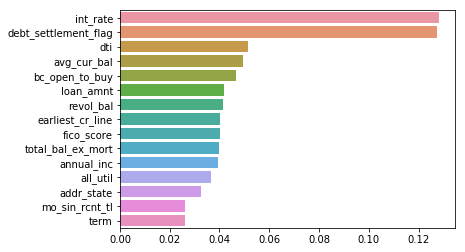

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=loans_1617.drop('loan_status',axis=1).columns).sort_values(ascending=False)
feature_imp_top = feature_imp.head(15)
sns.barplot(x=feature_imp_top, y=feature_imp_top.index)

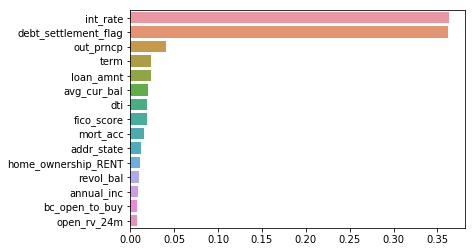

In [0]:
feature_imp = pd.Series(clf2.feature_importances_,index=loans_1617.drop('loan_status',axis=1).columns).sort_values(ascending=False)
feature_imp_top = feature_imp.head(15)
sns.barplot(x=feature_imp_top, y=feature_imp_top.index)

In [0]:
#explain instance with Random Forest
"""Default function : 
explain_instance(data_row,
                predict_fn,
                labels=(1,),
                top_labels=None,
                num_features=10,
                num_samples=5000,
                distance_metric='euclidean',
                model_regressor=None)"""

idx = 10256
exp = explainer.explain_instance(X_test.values[idx], func.predict_proba, num_features=10, top_labels=1)
print('Document id: %d' % idx)
print('Probability(Good Loan) =', func.predict_proba([X_test.values[idx]])[0,1])
print('True class: %s' % class_names[y_test.values[idx]])

Intercept 0.2323418418340173
Prediction_local [0.68222038]
Right: 0.7685079183678399
Document id: 10256
Probability(Good Loan) = 0.7685079183678399
True class: Good loan


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.484e-30): result may not be accurate.
  overwrite_a=True).T


In [0]:
#R^2 of the explanation
exp.score

0.7626450632592053

In [0]:
exp.local_pred

array([0.68222038])

In [0]:
exp.show_in_notebook(show_table=True, show_all=False)

In [0]:
#explain instance with Random Forest
"""Default function : 
explain_instance(data_row,
                predict_fn,
                labels=(1,),
                top_labels=None,
                num_features=10,
                num_samples=5000,
                distance_metric='euclidean',
                model_regressor=None)"""

idx = 68248
exp = explainer.explain_instance(X_test.values[idx], func.predict_proba, num_features=10, top_labels=1)
print('Document id: %d' % idx)
print('Probability(Good Loan) =', func.predict_proba([X_test.values[idx]])[0,1])
print('True class: %s' % class_names[y_test.values[idx]])

Intercept 0.1930331740462381
Prediction_local [0.51368977]
Right: 0.5159235013070995
Document id: 68248
Probability(Good Loan) = 0.5159235013070995
True class: Bad loan


In [0]:
exp.local_pred

array([0.51368977])

In [0]:
#explain instance with Gradient Boost
idx = 10256
exp = explainer.explain_instance(X_test.values[idx], func2.predict_proba, num_features=10, top_labels=1)
print('Document id: %d' % idx)
print('Probability(Good Loan) =', func2.predict_proba([X_test.values[idx]])[0,1])
print('True class: %s' % class_names[y_test.values[idx]])

Intercept 0.061760679229328486
Prediction_local [0.75975563]
Right: 0.7918462671630919
Document id: 10256
Probability(Good Loan) = 0.7918462671630919
True class: Good loan


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56919e-46): result may not be accurate.
  overwrite_a=True).T


In [0]:
exp.show_in_notebook(show_table=True, show_all=False)

In [0]:
#prediction
y_pred=func.predict(X_test)

In [0]:
y_pred2=func2.predict(X_test)

In [0]:
#create a dataframe with only y_test and his prediction
temp = pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred})[['y_test', 'y_pred']]
temp

y_test  y_pred
227346       1       1
68248        1       0
427025       1       1
233427       1       1
135197       0       1
469246       0       0
220755       1       1
119160       1       1
277366       0       1
296213       0       0
461355       1       1
20333        1       1
117065       1       1
402537       1       1
49538        1       1
351161       1       1
289646       1       1
185418       1       0
88847        1       1
362904       1       1
31835        1       1
207210       1       1
354918       1       1
287932       0       0
388706       1       1
208471       0       1
386010       1       1
307629       0       1
382862       1       1
262969       1       1
...        ...     ...
42419        1       1
463699       1       1
315115       1       1
68988        0       0
396296       1       0
214156       1       1
166099       0       0
15374        1       1
179519       0       1
281577       1       1
62790        1       1
290266       1       0
392631       0       1
346996       1       1
458035       0       1
103954       1       1
296716       1       1
131943       1       1
253895       1       1
341136       1       1
129209       1       1
139985       1       1
215555       0       1
270149       0       1
144060       1       0
33134        0       1
367140       1       0
326003       1       1
127966       1       1
455447       1       0

[211278 rows x 2 columns]

In [0]:
#save in another dataframe only rows that are misclassified
misclassify = temp[temp.y_pred != temp.y_test]
misclassify.shape

(50085, 2)

In [0]:
#create a drop list to clean loans dataset
drop_list = [row for row in X_test.index if row not in misclassify.index]
print(drop_list)
print(len(drop_list))

[227346, 427025, 233427, 469246, 220755, 119160, 296213, 461355, 20333, 117065, 402537, 49538, 351161, 289646, 88847, 362904, 31835, 207210, 354918, 287932, 388706, 386010, 382862, 262969, 68702, 466905, 433187, 391531, 155050, 51233, 73093, 100500, 170194, 367397, 250098, 269066, 85125, 415893, 284436, 469071, 303849, 16671, 68073, 255939, 377810, 207810, 99313, 397863, 114768, 83281, 187891, 106442, 329291, 127924, 338647, 456815, 423301, 298685, 431044, 128853, 339455, 117835, 348872, 14792, 295163, 228012, 329089, 101168, 418454, 166012, 158176, 291753, 147438, 419697, 98782, 426529, 167778, 256631, 37505, 17780, 10334, 197683, 377849, 465447, 282960, 187061, 168087, 323502, 4913, 447799, 372911, 361439, 7332, 287836, 166728, 425792, 43108, 282409, 87668, 176488, 192943, 314186, 335828, 20251, 357425, 318630, 282722, 229399, 385992, 281408, 318026, 336686, 312785, 213473, 369092, 301336, 310360, 187119, 269603, 395237, 301589, 265262, 71708, 457005, 411880, 334074, 344831, 433102, 

In [0]:
#filter out every rows correctly classified
misclassloans = X_test.drop(drop_list,axis=0)

In [0]:
#save in another dataframe only rows that are misclassified
correctclassify = temp[temp.y_pred == temp.y_test]
correctclassify.shape

(161193, 2)

In [0]:
#create a drop list to clean loans dataset
drop_list = [row for row in X_test.index if row not in correctclassify.index]
print(drop_list)
print(len(drop_list))

[68248, 135197, 277366, 185418, 208471, 307629, 186860, 262872, 431291, 338040, 372042, 179389, 414527, 348321, 172993, 105206, 43888, 73359, 208746, 264185, 28132, 464835, 419264, 32001, 459489, 264913, 206625, 324628, 76236, 370755, 462863, 363854, 333157, 318223, 31637, 446456, 340173, 186738, 299901, 88328, 130383, 177262, 289530, 41354, 198826, 177828, 179882, 115047, 47951, 241685, 383792, 334371, 420772, 27154, 124949, 397382, 415744, 216299, 77313, 27804, 83534, 440649, 370253, 93180, 453298, 375263, 68033, 309928, 4348, 100973, 275543, 273476, 22020, 394650, 38025, 341005, 115231, 421820, 448363, 125777, 40118, 317532, 348824, 427119, 245728, 95557, 89258, 44600, 436291, 302344, 265962, 325569, 381680, 207192, 204924, 358256, 410113, 161938, 338785, 228996, 216764, 147461, 99218, 46793, 395498, 347357, 288686, 186642, 44853, 308043, 193465, 204883, 285386, 440021, 76150, 303014, 290236, 365855, 79040, 209175, 466607, 164631, 402386, 200684, 207002, 354834, 381672, 63788, 45669

In [0]:
#filter out every rows correctly classified
okclassloans = X_test.drop(drop_list,axis=0)

In [0]:
misclassloans.index

Int64Index([ 68248, 135197, 277366, 185418, 208471, 307629, 186860, 262872,
            431291, 338040,
            ...
            179519, 290266, 392631, 458035, 215555, 270149, 144060,  33134,
            367140, 455447],
           dtype='int64', length=50085)

In [0]:
misclassloans.shape

(50169, 52)

In [0]:
import warnings
from lime import submodular_pick

In [0]:
# SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
sp_obj = submodular_pick.SubmodularPick(explainer, X_test.values, func.predict_proba, num_features=8,num_exps_desired=15)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06578e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26998854659911614
Prediction_local [0.49189731]
Right: 0.5919692314672692


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.92607e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17330225058084053
Prediction_local [0.64873046]
Right: 0.6481865111873547


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.06196e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25321446609743864
Prediction_local [0.5017954]
Right: 0.5833982764545191
Intercept 0.272075992265615
Prediction_local [0.64373827]
Right: 0.6150374060798153


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.63757e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6811881826711494
Prediction_local [0.57060989]
Right: 0.5062283908031244


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.16629e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17225479879752287
Prediction_local [0.63009607]
Right: 0.6296442107925152


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.83985e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16848109113790205
Prediction_local [0.77853754]
Right: 0.9416192874255942


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.53888e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20481460722589534
Prediction_local [0.57993594]
Right: 0.6133878266918057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66319e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3737232281516538
Prediction_local [0.52762498]
Right: 0.542223074420499


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.525e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6710093329165142
Prediction_local [0.56489313]
Right: 0.5870442200543149


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.03657e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2651958554092538
Prediction_local [0.63398843]
Right: 0.6566360221898594
Intercept 0.18750887428965857
Prediction_local [0.67379731]
Right: 0.7665331524271689
Intercept 0.1475026602274026
Prediction_local [0.72212487]
Right: 0.8388811999434519


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65246e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12083573258970953
Prediction_local [0.69968048]
Right: 0.8796917150663381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41146e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18254966857580374
Prediction_local [0.69699937]
Right: 0.8667297598423042


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09628e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8254736816322812
Prediction_local [0.47224613]
Right: 0.5406399669999115


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07489e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6740818292388587
Prediction_local [0.44733814]
Right: 0.556421656419449


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16807e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7656554542009647
Prediction_local [0.53309413]
Right: 0.631853554025729


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85903e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15423057551048136
Prediction_local [0.69894565]
Right: 0.8284884679014262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38634e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26549004249503166
Prediction_local [0.61042053]
Right: 0.6372145559772602


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44179e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6939604725326087
Prediction_local [0.54856898]
Right: 0.613667524162272
Intercept 0.6379742075912431
Prediction_local [0.56795227]
Right: 0.5091076206794057
Intercept 0.19583254693906327
Prediction_local [0.67449281]
Right: 0.7163500787855184


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.67885e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18649345750997925
Prediction_local [0.72659034]
Right: 0.759790328423356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39368e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.197707102102616
Prediction_local [0.72319667]
Right: 0.8296070808332706


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45037e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23012935068227552
Prediction_local [0.65406605]
Right: 0.5544821009281117


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73487e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16249885179491613
Prediction_local [0.72408884]
Right: 0.9418224332129319
Intercept 0.19013431052459784
Prediction_local [0.67219381]
Right: 0.839349751831314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89988e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2369378748075373
Prediction_local [0.60174842]
Right: 0.5867087763615476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42924e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6208188341256009
Prediction_local [0.63576611]
Right: 0.6440443789374146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.21429e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2511000333386864
Prediction_local [0.67816816]
Right: 0.6270533515118686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.06702e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6940576658534039
Prediction_local [0.56271128]
Right: 0.5430906863708908


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16439792397040093
Prediction_local [0.68424683]
Right: 0.8005208236440553


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50994e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17301011857837312
Prediction_local [0.74948529]
Right: 0.8598459483270143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35131e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.655803422419432
Prediction_local [0.60070213]
Right: 0.6484284800512085


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33003e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1697836398823402
Prediction_local [0.72428132]
Right: 0.8865861843560195


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.635e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18058049456862996
Prediction_local [0.70275243]
Right: 0.7929570536882692
Intercept 0.18157562341799327
Prediction_local [0.74198848]
Right: 0.9019088895536391
Intercept 0.17042361441312098
Prediction_local [0.82843159]
Right: 0.9136434038796168
Intercept 0.1300502652626126
Prediction_local [0.62986283]
Right: 0.6331979178457636
Intercept 0.19301997341518184
Prediction_local [0.72933477]
Right: 0.9349676077169065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15463e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1437963768018664
Prediction_local [0.69956521]
Right: 0.8772109674539874
Intercept 0.19660740172331181
Prediction_local [0.50912393]
Right: 0.5886918647852194


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.1798e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3099800089770791
Prediction_local [0.56588537]
Right: 0.7144145188435421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.79593e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3198769436306541
Prediction_local [0.51327571]
Right: 0.6001150251967027


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54441e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6638026123106249
Prediction_local [0.51292202]
Right: 0.5790427389135465


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04795e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1332174646242047
Prediction_local [0.68094004]
Right: 0.7181573027494745
Intercept 0.8343215755662057
Prediction_local [0.41340216]
Right: 0.6028380142524017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.659e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7565275792204804
Prediction_local [0.4476639]
Right: 0.5164427423339997


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86985e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22064505921856387
Prediction_local [0.6007032]
Right: 0.6430486600270817


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15964599892859133
Prediction_local [0.73152068]
Right: 0.7611559233288986


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27888e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7210515493661928
Prediction_local [0.49811987]
Right: 0.5970899509846633
Intercept 0.7864609913357794
Prediction_local [0.49900301]
Right: 0.5337966935146178


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33026e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15726377382026213
Prediction_local [0.70755508]
Right: 0.8224144646807816


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86267e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15046786319343697
Prediction_local [0.60070589]
Right: 0.6704877825365269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35822e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2774249206336666
Prediction_local [0.57971853]
Right: 0.6086566583933619


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.97464e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1741075183833028
Prediction_local [0.61129554]
Right: 0.6944346506690526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40907e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6698321361104287
Prediction_local [0.53481102]
Right: 0.5786647922777083


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.81222e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2520341540647504
Prediction_local [0.89641947]
Right: 0.9450327647928266


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3371e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2574425439480038
Prediction_local [0.46390355]
Right: 0.5846507169265472


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20932e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17135892970615219
Prediction_local [0.72481886]
Right: 0.7349559790602437


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68477e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19766441829909642
Prediction_local [0.73127617]
Right: 0.913334278351449
Intercept 0.6549371048277782
Prediction_local [0.57457854]
Right: 0.5217090429139883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15494e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.691262890418692
Prediction_local [0.62248638]
Right: 0.6199661282199905


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75378e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18843453606385285
Prediction_local [0.67465625]
Right: 0.7819773923804112


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85542e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18563724274743598
Prediction_local [0.62839694]
Right: 0.6302382511733171


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48971e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.33175683677388557
Prediction_local [0.49818914]
Right: 0.5406802196797368


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16144e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1855299227544161
Prediction_local [0.58569213]
Right: 0.834708438649386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39385e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25437644786594416
Prediction_local [0.6732401]
Right: 0.6185432700772142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35311e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15868277003110076
Prediction_local [0.71851189]
Right: 0.7615458181889401


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.6896e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11948226429673037
Prediction_local [0.72119297]
Right: 0.8043330211567357


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17621e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7835985282636596
Prediction_local [0.39386838]
Right: 0.516086312167151


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29308e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15635360728763065
Prediction_local [0.53488405]
Right: 0.5614976586002843


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45525e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2266997394574055
Prediction_local [0.63018615]
Right: 0.7235587109639389
Intercept 0.25623301749391614
Prediction_local [0.72681677]
Right: 0.7536528011684791


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35946e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1898025104383806
Prediction_local [0.56984855]
Right: 0.6618688774383038


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22515e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17027469127719386
Prediction_local [0.6784498]
Right: 0.8150537424800361


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.88449e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3016202755198108
Prediction_local [0.53363139]
Right: 0.5218712167614628


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30676e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2213219248555639
Prediction_local [0.69739533]
Right: 0.8878961521801269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74041e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5828055547926423
Prediction_local [0.60364371]
Right: 0.569972878022513


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92677e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2360503862928992
Prediction_local [0.52014077]
Right: 0.6046564168657598


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61833e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1920654075881661
Prediction_local [0.47281696]
Right: 0.5106767881600729
Intercept 0.1359158635399781
Prediction_local [0.72056296]
Right: 0.7860205919000471
Intercept 0.24440109727346238
Prediction_local [0.60267914]
Right: 0.6841030053785642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36312e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22958602697562386
Prediction_local [0.55623072]
Right: 0.5850296372886495


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68121e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2318496455633428
Prediction_local [0.56348685]
Right: 0.5278599743561603


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87063e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16350437205178597
Prediction_local [0.74175056]
Right: 0.8794352554605179


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10604e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1716307880304172
Prediction_local [1.11854376]
Right: 0.948173276097183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68218e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27556790708863205
Prediction_local [0.56462157]
Right: 0.551421415205774


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.35811e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3332105405094167
Prediction_local [0.64167133]
Right: 0.7510102876677556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.93964e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19372000499692166
Prediction_local [0.69976448]
Right: 0.8014954862846879
Intercept 0.21087338350158052
Prediction_local [0.63277625]
Right: 0.6203492047240338


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90797e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28209084036639764
Prediction_local [0.60008278]
Right: 0.5272137420046519


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43557e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7132664261735046
Prediction_local [0.40478798]
Right: 0.505584933125063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75627e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6897211463802239
Prediction_local [0.57381303]
Right: 0.6833512716682522


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.10675e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1727692038819273
Prediction_local [0.76380079]
Right: 0.7769034932019164


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27894e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23130206083559585
Prediction_local [0.5840528]
Right: 0.5318584292395964


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4109e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2478679375792454
Prediction_local [0.75309765]
Right: 0.8063313123942544


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.99942e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19585086593113576
Prediction_local [0.62896031]
Right: 0.707720633351537


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.93006e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7771560405001954
Prediction_local [0.50302388]
Right: 0.5407683696641885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85484e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2556404280004478
Prediction_local [0.53833082]
Right: 0.5239294922676793


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.67946e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20116805999169707
Prediction_local [0.60085813]
Right: 0.68934924073435


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16101e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13413698515080108
Prediction_local [0.62972741]
Right: 0.6315961818712829


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.31443e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23852223754526913
Prediction_local [0.58347286]
Right: 0.6763020404555482


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80837e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6558124630481977
Prediction_local [0.54110397]
Right: 0.562255162200703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.6643e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7850412069141219
Prediction_local [0.50214104]
Right: 0.5649820630111623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64094e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1514875547272858
Prediction_local [0.6414316]
Right: 0.6518282389843347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14782e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.350594955885968
Prediction_local [0.77317082]
Right: 0.878212760537973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.03491e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7186569244459796
Prediction_local [0.54061642]
Right: 0.5316906968776156


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21894e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14991491027786574
Prediction_local [0.67598185]
Right: 0.7508190034117815


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36006e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13891943055104367
Prediction_local [0.6741646]
Right: 0.6815895080498361
Intercept 0.11493842377882046
Prediction_local [0.71835678]
Right: 0.9253713123551609


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.18538e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6368024252371658
Prediction_local [0.61785619]
Right: 0.7127606040706369


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13105e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23499421441393814
Prediction_local [0.49563773]
Right: 0.5567011136757807


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9648e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7239846494240068
Prediction_local [0.53965211]
Right: 0.6242360224904588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43681e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7671350660205436
Prediction_local [0.47526583]
Right: 0.5054415986622596
Intercept 0.2036908073091932
Prediction_local [0.73204159]
Right: 0.8232055677909104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80217e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18066751688682092
Prediction_local [0.70141019]
Right: 0.8476744076153152


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37182e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7066195370254535
Prediction_local [0.56806406]
Right: 0.57071880630055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14883e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6995416673739752
Prediction_local [0.47989829]
Right: 0.5512369736571929


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46226e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6970998214777295
Prediction_local [0.52134657]
Right: 0.591521948915869


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90699e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7598174982651617
Prediction_local [0.49763879]
Right: 0.5340028787780844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.86562e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24947683084668038
Prediction_local [0.59230946]
Right: 0.7170113847079326


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.04398e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7576771010851837
Prediction_local [0.45056702]
Right: 0.6309589725719811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.29824e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13513530309682387
Prediction_local [0.74189727]
Right: 0.7294728760199777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84778e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15930703484404501
Prediction_local [0.77230741]
Right: 0.7672757795883116


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78785e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.733542161338343
Prediction_local [0.44197919]
Right: 0.5441949256738371


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15785e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14123710014791335
Prediction_local [0.71126892]
Right: 0.7622380162038067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.92707e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2222249020160903
Prediction_local [0.62667934]
Right: 0.5453163962407359


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74226e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20647176448942994
Prediction_local [0.73054551]
Right: 0.8290996861519107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.39771e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18833258197767744
Prediction_local [0.72544943]
Right: 0.8604669991198084


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.21376e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13673810040223844
Prediction_local [0.73065898]
Right: 0.8655874765503218


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34452e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17331756710253615
Prediction_local [0.62563534]
Right: 0.7757255993056501


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37001e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2549831080158397
Prediction_local [0.53074994]
Right: 0.5064042485080539


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69562e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2620429610304732
Prediction_local [0.62608858]
Right: 0.7536774327866833


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35218e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16187950681578894
Prediction_local [0.65499239]
Right: 0.7457402737260854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89344e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18458242566339467
Prediction_local [0.75272808]
Right: 0.9221423901841531


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60557e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7470836093193194
Prediction_local [0.43631121]
Right: 0.5602481919358174


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.89391e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2713275099791878
Prediction_local [0.59556118]
Right: 0.5963114208417837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89419e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26778884650855
Prediction_local [0.59924237]
Right: 0.5216603034185295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07736e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22799883425541073
Prediction_local [0.47333133]
Right: 0.5030717735381743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64676e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22950858551666364
Prediction_local [0.67029763]
Right: 0.8632561942124326


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74179e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.793139865532429
Prediction_local [0.52794268]
Right: 0.7404906785128854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45674e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5903211456940836
Prediction_local [0.55553412]
Right: 0.6045717315080014


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.74164e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7189740774468865
Prediction_local [0.48796784]
Right: 0.6515856008143017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10908e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16645966865012013
Prediction_local [0.58986654]
Right: 0.5842252098484372


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36065e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2030793820896139
Prediction_local [0.67630864]
Right: 0.7437439606309307
Intercept 0.12934591567119186
Prediction_local [0.73069509]
Right: 0.8109497420370257


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44034e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18249662566931873
Prediction_local [0.62153348]
Right: 0.6805259503837425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81577e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6336852437737643
Prediction_local [0.56589533]
Right: 0.5630365498604674


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66195e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11511587282088293
Prediction_local [0.68252524]
Right: 0.8016934926199402


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.12333e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2912979373754026
Prediction_local [0.61192072]
Right: 0.6461496533535857
Intercept 0.23907177273539926
Prediction_local [0.58745728]
Right: 0.6465873882912193


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16324e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16786906981329736
Prediction_local [0.69906979]
Right: 0.6688900594233793


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85165e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6334297115640003
Prediction_local [0.55106312]
Right: 0.5597636350681481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54996e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15379487476060472
Prediction_local [0.73914921]
Right: 0.8560487870639036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11302e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24827419179077626
Prediction_local [0.62354558]
Right: 0.6147706330838144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98952e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3630363281800244
Prediction_local [0.79937324]
Right: 0.8925397334158228


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.99278e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15421130765104796
Prediction_local [0.70501624]
Right: 0.7059361269527388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3449e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23023749592093706
Prediction_local [0.63707156]
Right: 0.6280095534372961


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.79658e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2329620157175643
Prediction_local [0.56276192]
Right: 0.5514971325101752
Intercept 0.22138645243041066
Prediction_local [0.56545349]
Right: 0.6063704050060686
Intercept 0.8167517844841999
Prediction_local [0.46276531]
Right: 0.650613219990297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61642e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6615274112558063
Prediction_local [0.59592566]
Right: 0.7917308417682989


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.6805e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2143716498747374
Prediction_local [0.51067573]
Right: 0.5848116185725889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.19206e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3051768802077749
Prediction_local [0.53024795]
Right: 0.5763464957124986


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28024e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15415328781489152
Prediction_local [0.60348579]
Right: 0.6484558124671842
Intercept 0.2143471079716298
Prediction_local [0.72266621]
Right: 0.8020920831810829


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41385e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22038611790848767
Prediction_local [0.63467414]
Right: 0.6365503289542531


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2355e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23629593009971467
Prediction_local [0.54129375]
Right: 0.6432272062667289


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13032e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27436637827947363
Prediction_local [0.53205601]
Right: 0.5866935911945279
Intercept 0.16333605857681865
Prediction_local [0.75147827]
Right: 0.8852220458013694


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.02842e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2316225600917372
Prediction_local [0.58869722]
Right: 0.546808974622952
Intercept 0.6248938815188166
Prediction_local [0.56620479]
Right: 0.5392079950769129


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83768e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7526444033343931
Prediction_local [0.4657992]
Right: 0.5040623650463484


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19204e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1747479616404673
Prediction_local [0.65832478]
Right: 0.677216321193723


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62386e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22088824720812572
Prediction_local [0.63238255]
Right: 0.5595415526532106


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56842e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19586128518817203
Prediction_local [0.61239314]
Right: 0.5660126388745431
Intercept 0.3139952717016421
Prediction_local [0.55537008]
Right: 0.5343957047949826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.8785e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6801826595010749
Prediction_local [0.5514145]
Right: 0.6773937013166079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51511e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24518362243058395
Prediction_local [0.75239765]
Right: 0.740776574493529
Intercept 0.18748854285559913
Prediction_local [0.74955364]
Right: 0.8701973241590248


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91975e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7416148404309431
Prediction_local [0.46271066]
Right: 0.5907870674664771


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59887e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27548378637646975
Prediction_local [0.62462258]
Right: 0.572960773646734
Intercept 0.22748035174870035
Prediction_local [0.70938287]
Right: 0.7871529022002736


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35635e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7614788744946901
Prediction_local [0.43893336]
Right: 0.6110836075258228


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.6475e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2534632568301458
Prediction_local [0.61846412]
Right: 0.6774494490875531


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79046e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16061099925537514
Prediction_local [0.77465725]
Right: 0.8338027514914255
Intercept 0.36084321875270015
Prediction_local [0.47661176]
Right: 0.5914544680703875
Intercept 0.1962328619433461
Prediction_local [0.70058239]
Right: 0.8715221598733609
Intercept 0.7568159906402939
Prediction_local [0.40161267]
Right: 0.5014894573089719


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05558e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21654729721586424
Prediction_local [0.6569118]
Right: 0.7055917507508158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40371e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14549458284947864
Prediction_local [0.60120261]
Right: 0.7076680187343388
Intercept 0.6216576312311991
Prediction_local [0.5114439]
Right: 0.5465514459561072


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77557e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29859042911817546
Prediction_local [0.55463308]
Right: 0.5818123997981667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3115e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23867986542102249
Prediction_local [0.61031448]
Right: 0.7182138803639739


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14178e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31763574214321333
Prediction_local [0.51944462]
Right: 0.5506437479857336
Intercept 0.24804301544659801
Prediction_local [0.55993214]
Right: 0.5646112323337058


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60514e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16502370965996604
Prediction_local [0.60529562]
Right: 0.6468732744242932


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41363e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18123938285382685
Prediction_local [0.62619698]
Right: 0.7031700445456883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61397e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7718040466697985
Prediction_local [0.49873398]
Right: 0.5174567786236735
Intercept 0.2195061292710051
Prediction_local [0.60828033]
Right: 0.6574336738558287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64763e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2204470738486743
Prediction_local [0.50010904]
Right: 0.5392689802236849


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90522e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22267757774232894
Prediction_local [0.73684133]
Right: 0.8551614841636141


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.6948e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6856592220489361
Prediction_local [0.53558179]
Right: 0.5211729811395474


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.84434e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7618206906054481
Prediction_local [0.37168548]
Right: 0.515965309439713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25495e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18987853403037402
Prediction_local [0.72653773]
Right: 0.8274464828734099


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53374e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.738713047758513
Prediction_local [0.43690695]
Right: 0.5143183428091334
Intercept 0.23230897706149667
Prediction_local [0.66978823]
Right: 0.6038391792076664
Intercept 0.1731432474270772
Prediction_local [0.74965591]
Right: 0.7613196908949823


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42521e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2432948645709288
Prediction_local [0.49994365]
Right: 0.5220504254004106


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06675e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19973808509634244
Prediction_local [0.68124499]
Right: 0.7899945599997673


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70657e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34245993304290867
Prediction_local [0.96113602]
Right: 0.953292405223655


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44758e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.360449756339267
Prediction_local [0.46709651]
Right: 0.5567289943169184
Intercept 0.17385074144152557
Prediction_local [0.69683688]
Right: 0.5518058048432585


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40159e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19259046959054987
Prediction_local [0.72577349]
Right: 0.8864816456400308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10649e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26544617299278045
Prediction_local [0.60069684]
Right: 0.6115896028343342


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3939e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20050240367342492
Prediction_local [0.49790488]
Right: 0.5055355798724809


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45254e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29952328564698716
Prediction_local [0.62836325]
Right: 0.670238395528082


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.95356e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22427000967389926
Prediction_local [0.65941155]
Right: 0.7649777281564163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.243e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22407813667117188
Prediction_local [0.70091605]
Right: 0.7310586847867897
Intercept 0.14776042914053567
Prediction_local [0.67229389]
Right: 0.743556809519953


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5604e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15852210266387212
Prediction_local [0.73027311]
Right: 0.7680163567154453


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37464e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2634696443381327
Prediction_local [0.53337145]
Right: 0.6709419934842715


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38435e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1546056353491655
Prediction_local [0.6881587]
Right: 0.8175325413508867


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41179e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6457353049996374
Prediction_local [0.52501283]
Right: 0.6424073886509671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21983e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2624235577183127
Prediction_local [0.57761207]
Right: 0.5502836913516043


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69643e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17354152040654186
Prediction_local [0.69239405]
Right: 0.7467715635715223
Intercept 0.10875992924363165
Prediction_local [0.74640911]
Right: 0.8985902041441072


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89826e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19322768584383404
Prediction_local [0.75621078]
Right: 0.7797752077288597


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.32996e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13368060453069996
Prediction_local [0.72461487]
Right: 0.7958244270143515


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90838e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27434030249842856
Prediction_local [0.62844083]
Right: 0.6879214282048971
Intercept 0.7004023533041699
Prediction_local [0.53471618]
Right: 0.530527147912564


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39253e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25083528382159126
Prediction_local [0.62791435]
Right: 0.6517872784698732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13516e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3176912351054306
Prediction_local [0.5730872]
Right: 0.5289061437275994


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54196e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.771993042363722
Prediction_local [0.55312293]
Right: 0.6532558078241176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76034e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13804464103279274
Prediction_local [0.75684495]
Right: 0.8764984546640576


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37526e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7634177724434206
Prediction_local [0.46603961]
Right: 0.5089777519446451


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99019e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27060110437378976
Prediction_local [0.69860206]
Right: 0.7568918826214197


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.94803e-44): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06554447041509287
Prediction_local [0.83282586]
Right: 0.7993176481190812


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75816e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2559788747495368
Prediction_local [0.56607676]
Right: 0.6194874248061469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75767e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3029508346691121
Prediction_local [0.58516389]
Right: 0.6488667653485335


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.24368e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6388713194765021
Prediction_local [0.65105903]
Right: 0.8170414153759272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21056e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16681919222620029
Prediction_local [0.78037371]
Right: 0.8052835732714336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59236e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29043078330540756
Prediction_local [0.72567822]
Right: 0.829203488905867


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13223e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.228891046683532
Prediction_local [0.69744378]
Right: 0.9335407372115688


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22493e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6818148145231697
Prediction_local [0.56390679]
Right: 0.5118189964296636


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25278e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23606162190367835
Prediction_local [0.72120401]
Right: 0.8117286689162131


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00701e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2643438863932696
Prediction_local [0.60638881]
Right: 0.6466959260200988


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76236e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2784031933056609
Prediction_local [0.97660629]
Right: 0.9318772166247494


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99281e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21309787446658746
Prediction_local [0.72266041]
Right: 0.8555705325170151


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.364e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19715661602582546
Prediction_local [0.69727507]
Right: 0.7041874719882161


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27806e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23074605329222891
Prediction_local [0.61970975]
Right: 0.6135261307208799
Intercept 0.30429599473638097
Prediction_local [0.56594381]
Right: 0.5836915225786907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70009e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21716288148122204
Prediction_local [0.50668405]
Right: 0.5310598409139086


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90852e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20202439582628828
Prediction_local [0.74992464]
Right: 0.9151821399126762


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37363e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06187376016819579
Prediction_local [0.87242181]
Right: 0.7355452976069885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16485e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16620131279919265
Prediction_local [0.72236025]
Right: 0.7372677042612876


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11733e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7007575404517804
Prediction_local [0.49178092]
Right: 0.5335928517881908


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24872e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20977937220921156
Prediction_local [0.67971113]
Right: 0.6727018193339036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41979e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6628523665872434
Prediction_local [0.5673327]
Right: 0.719020859657048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56093e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2039835862162887
Prediction_local [0.68391488]
Right: 0.7343151351273778
Intercept 0.2376097128913074
Prediction_local [0.52902093]
Right: 0.6486213697883653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.81639e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13008414460553686
Prediction_local [0.65253906]
Right: 0.7366377325585429
Intercept 0.3077029725912847
Prediction_local [0.64897049]
Right: 0.6938917257778081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.15526e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22529210448461956
Prediction_local [0.63807304]
Right: 0.6179947981394963


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44242e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7458778567604123
Prediction_local [0.55081731]
Right: 0.5958340046637884


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.78163e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18468248156148032
Prediction_local [0.744853]
Right: 0.8364133153655909


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72607e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24189223450186748
Prediction_local [0.58959333]
Right: 0.5594488497794575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33072e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8120041808719999
Prediction_local [0.4605068]
Right: 0.5290546762047171


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26624e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2772811301555081
Prediction_local [0.53245371]
Right: 0.5121148341262363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24503e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16311370279676907
Prediction_local [0.69204761]
Right: 0.8235669945865187


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79515e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20514447263593988
Prediction_local [0.63989841]
Right: 0.6965148111542777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24048e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6588598758333586
Prediction_local [0.55341682]
Right: 0.669759387059293


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90495e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29107939703352526
Prediction_local [0.85614977]
Right: 0.9173253482369361
Intercept 0.2706794790482405
Prediction_local [0.68313964]
Right: 0.8343375757946542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.0386e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2198764142704117
Prediction_local [0.75946323]
Right: 0.785725023242263


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23903e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2413555066753415
Prediction_local [0.67703754]
Right: 0.8491175428100287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70293e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3005629362308471
Prediction_local [0.59187043]
Right: 0.5872675963899916


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56312e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6657159882380377
Prediction_local [0.60275918]
Right: 0.6564286038434106


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24941e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7984920558746348
Prediction_local [0.45952755]
Right: 0.6008307398758677


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23911e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1542539850349472
Prediction_local [0.65746395]
Right: 0.7258229044054282


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61476e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1451642979389377
Prediction_local [0.72663367]
Right: 0.8939579769199649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49767e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22290457103974043
Prediction_local [0.75531205]
Right: 0.8183845364466213


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77949e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34573361554487936
Prediction_local [0.54875221]
Right: 0.6833648660678893


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32542e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27319853932045396
Prediction_local [0.72996537]
Right: 0.8877851094327823
Intercept 0.2701964867377029
Prediction_local [0.59416939]
Right: 0.625492742389685


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20354e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13535420911363316
Prediction_local [0.68779459]
Right: 0.6194862735916766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.0985e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17173281141707353
Prediction_local [0.71829843]
Right: 0.8179466541573869
Intercept 0.6060789044354775
Prediction_local [0.54461826]
Right: 0.6360780174297609


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50793e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6832216026186534
Prediction_local [0.62092622]
Right: 0.7481306425497033


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82225e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30129437072891774
Prediction_local [0.67372114]
Right: 0.6360054249838137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29298e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1579563229548776
Prediction_local [0.75349066]
Right: 0.9506373804486132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.5779e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25532493518250116
Prediction_local [0.58971927]
Right: 0.5316439647592769


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.90851e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32528743724566717
Prediction_local [0.49982559]
Right: 0.5780403229003189


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32015e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14841344639880005
Prediction_local [0.64964878]
Right: 0.7049135696281962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.93124e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1629882502358071
Prediction_local [0.75555285]
Right: 0.8823854849447741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44385e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2967679406385014
Prediction_local [0.52057252]
Right: 0.5983041567095146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83617e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09891484622066044
Prediction_local [0.65406008]
Right: 0.6908658377372575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.12147e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19223966678554033
Prediction_local [0.69313756]
Right: 0.7009731708280384


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21806e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.764916423901602
Prediction_local [0.52048251]
Right: 0.5900052255406459
Intercept 0.23525038526251074
Prediction_local [0.62981516]
Right: 0.6659435439598872


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60382e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31770738934647813
Prediction_local [0.49164644]
Right: 0.6028582462586496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65533e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.699962046148686
Prediction_local [0.52862101]
Right: 0.6503269507854429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77268e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7471458108468805
Prediction_local [0.52223176]
Right: 0.5926750431503587


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.02042e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.136658647718364
Prediction_local [0.75079565]
Right: 0.828306683591476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50279e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0523501689094481
Prediction_local [0.72473747]
Right: 0.858158004787965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37294e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2883434785662503
Prediction_local [0.64555945]
Right: 0.6639727814569533


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19342e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07726623990558906
Prediction_local [0.74336593]
Right: 0.8669807396458057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57655e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18603672110615183
Prediction_local [0.74403833]
Right: 0.8771981388230761


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.7426e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20382092917836003
Prediction_local [0.70478707]
Right: 0.8255073333768078


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77634e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15974241176927217
Prediction_local [0.62643232]
Right: 0.6657596308496528


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39847e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7380080113110186
Prediction_local [0.50135437]
Right: 0.5033457941992162


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52992e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20978998323713877
Prediction_local [0.56156495]
Right: 0.5712411448810272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45645e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2204012609680563
Prediction_local [0.56602186]
Right: 0.6419427802202523


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1883e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17790221226525654
Prediction_local [0.72775183]
Right: 0.9051159135428948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.03567e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1296950850075177
Prediction_local [0.70200179]
Right: 0.7294055081063471


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32121e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24941385468018085
Prediction_local [0.67860632]
Right: 0.8121808874859079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6361e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13209680780720362
Prediction_local [0.75686855]
Right: 0.8341097643613327


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.84112e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6471714560541384
Prediction_local [0.60197102]
Right: 0.6299477713593241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88559e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15091971252208947
Prediction_local [0.69435431]
Right: 0.8251874835812252


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.01858e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7315337043592703
Prediction_local [0.57345422]
Right: 0.5985647948314199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40103e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6700074600872621
Prediction_local [0.55363591]
Right: 0.5119924274586867


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51871e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2875427228603453
Prediction_local [0.6158111]
Right: 0.6259876530577949


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40218e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.269127589128054
Prediction_local [0.58624817]
Right: 0.5752233933764787


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68064e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.253419166326039
Prediction_local [0.62402822]
Right: 0.7192879096293885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36233e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7047813028081724
Prediction_local [0.56708009]
Right: 0.5853910338044104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44124e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2499544601526626
Prediction_local [0.58258452]
Right: 0.5436678631085572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8596e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6701397373144662
Prediction_local [0.59473512]
Right: 0.6359383436742191


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84192e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13499943714469115
Prediction_local [0.65514377]
Right: 0.7876401534685997


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76884e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6810624254472044
Prediction_local [0.52209694]
Right: 0.5893385572545292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49888e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.233861928661529
Prediction_local [0.50578016]
Right: 0.5644459261781125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32863e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25483197220302417
Prediction_local [0.59853995]
Right: 0.5587719346488991


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85635e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18448659931456812
Prediction_local [0.6163702]
Right: 0.5743731948176845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50131e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20587178162511055
Prediction_local [0.72009937]
Right: 0.7509205325521222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45837e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15214628193180585
Prediction_local [0.76913862]
Right: 0.8810866566426477


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62381e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19243911996470886
Prediction_local [0.72660297]
Right: 0.9712989271418558


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.22443e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20639262450407153
Prediction_local [0.54056073]
Right: 0.6292949136406665


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.0072e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7427584358413484
Prediction_local [0.45989718]
Right: 0.5258790401627781


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8688e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15035876251573982
Prediction_local [0.65616619]
Right: 0.6535794342392243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16022e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22415808575552082
Prediction_local [0.61827252]
Right: 0.7097394085820363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61948e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7939390620792599
Prediction_local [0.46176136]
Right: 0.521964222020778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37653e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6880492043665732
Prediction_local [0.56786254]
Right: 0.651726067997625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44574e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3120604969141969
Prediction_local [0.69887362]
Right: 0.6891815708061969


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62681e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2104702446717192
Prediction_local [0.72213764]
Right: 0.8840004489096367


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17305e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19298974205089803
Prediction_local [0.71677008]
Right: 0.611487365672418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91911e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18716350267092868
Prediction_local [0.72775509]
Right: 0.8921410858829852


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28612e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2700415608252534
Prediction_local [0.55563657]
Right: 0.5769793851687129


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56468e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2324642824385616
Prediction_local [0.49610116]
Right: 0.5342192815890607


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48847e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.62316804140037
Prediction_local [0.5477759]
Right: 0.6089150059577965
Intercept 0.24069380535871504
Prediction_local [0.58917403]
Right: 0.6563205327963335


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.63877e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20714352873331948
Prediction_local [0.69873422]
Right: 0.839278276568449


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06911e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27558017183286326
Prediction_local [0.53721021]
Right: 0.5043681847762093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14525e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1500652401152539
Prediction_local [0.7529104]
Right: 0.8364387081886145


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90888e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3126293894417993
Prediction_local [0.82544708]
Right: 0.9087351242647103


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.7413e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23042381289252484
Prediction_local [0.59235853]
Right: 0.5886516437035059


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2269e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21549588061255098
Prediction_local [0.60101326]
Right: 0.5776220672849409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.27971e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2192046404022605
Prediction_local [0.53273422]
Right: 0.7286065627991748


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.73216e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13454395646458273
Prediction_local [0.66149646]
Right: 0.6356485911999136


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03659e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2263474142565991
Prediction_local [0.58838434]
Right: 0.672071376287003


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.91144e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7062948949253838
Prediction_local [0.60331285]
Right: 0.556167355038952


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.72912e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17965659417209345
Prediction_local [0.60577897]
Right: 0.5884649161992886


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82392e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25483464556612906
Prediction_local [0.6985607]
Right: 0.7457123139044467


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3266e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7310712927151213
Prediction_local [0.44297609]
Right: 0.5274449779582427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71233e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27155500323949305
Prediction_local [0.60394094]
Right: 0.5256611937986633
Intercept 0.12419629402469878
Prediction_local [0.7732518]
Right: 0.8493506614144082


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16378e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1711135491087465
Prediction_local [0.67776014]
Right: 0.7014657386877946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68836e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23980904658768815
Prediction_local [0.69700601]
Right: 0.6991281868337259


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.88117e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11614718274796798
Prediction_local [0.69546674]
Right: 0.7439039877718927


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36625e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2053393639965902
Prediction_local [0.62879341]
Right: 0.5883564470925456


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83544e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8049403170120338
Prediction_local [0.46044454]
Right: 0.528839694582135


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.88548e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1462775495402348
Prediction_local [0.75403414]
Right: 0.7882558896372484


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90753e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28025337340140516
Prediction_local [0.58579228]
Right: 0.7111386041965873


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.60119e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7777064526859503
Prediction_local [0.48659297]
Right: 0.5138503576897787


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70467e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12139436370247148
Prediction_local [0.74244564]
Right: 0.8904911451798544


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46691e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5992003699034713
Prediction_local [0.5438232]
Right: 0.5931548743368232


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99693e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26867789321539925
Prediction_local [0.93919234]
Right: 0.9481750946833665


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.47878e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23032490264369965
Prediction_local [0.62302385]
Right: 0.6912589632486414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24532e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7077764940462974
Prediction_local [0.50032666]
Right: 0.5000338172049756


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65528e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22130661432124082
Prediction_local [0.69998649]
Right: 0.764243257592547


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53497e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6997080758370768
Prediction_local [0.47781599]
Right: 0.5014485392519648


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39554e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2553313667652
Prediction_local [0.68254805]
Right: 0.74321785955468
Intercept 0.17980153531968412
Prediction_local [0.60225877]
Right: 0.669218651824612


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1612e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22462514452801396
Prediction_local [0.64858414]
Right: 0.7672461095990566
Intercept 0.20589468916029768
Prediction_local [0.68587116]
Right: 0.6990286827556845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2659e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21500124926904945
Prediction_local [0.61737611]
Right: 0.5605745347594664


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.55007e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14888236690738238
Prediction_local [0.68951597]
Right: 0.8648625410978248


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39888e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18551144624942467
Prediction_local [0.61638018]
Right: 0.6587799346205959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3746e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25143914930051536
Prediction_local [0.48798732]
Right: 0.5568753618754747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98096e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6339151002330454
Prediction_local [0.60207312]
Right: 0.6877482897208913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28846e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6846020346994066
Prediction_local [0.56571387]
Right: 0.6605211984762208


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69968e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26329885428461347
Prediction_local [0.67094927]
Right: 0.7773655095734813


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.70023e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16038566965716716
Prediction_local [0.7010296]
Right: 0.7950056580070145


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18732e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16174020302442532
Prediction_local [0.77650339]
Right: 0.848373855681848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51428e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2179571235832659
Prediction_local [0.6019565]
Right: 0.5956044454765422
Intercept 0.21870242566580939
Prediction_local [0.63684364]
Right: 0.5935587525876379


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50359e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09526267780633885
Prediction_local [0.72987509]
Right: 0.8369256876112187


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40472e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8079604914253978
Prediction_local [0.56945367]
Right: 0.6177482521241651


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21957e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6743425156999234
Prediction_local [0.53576443]
Right: 0.6424519461737025


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14184e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27882012466481865
Prediction_local [0.59526222]
Right: 0.7565710122556963


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.03906e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31953955027731284
Prediction_local [0.58126666]
Right: 0.6514136008350018


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62219e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18787084535741982
Prediction_local [0.71524156]
Right: 0.7649109605028532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68849e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24471940450630075
Prediction_local [0.69143747]
Right: 0.730911052968111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.25052e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13902150883574554
Prediction_local [0.62509123]
Right: 0.6845266222532573


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40857e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23116666479920095
Prediction_local [0.54269878]
Right: 0.5893844087076164
Intercept 0.17373463308196335
Prediction_local [0.72366234]
Right: 0.7121241496357119


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93976e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25636028948823353
Prediction_local [0.50548013]
Right: 0.5961475753448517


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16476e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.589076259743937
Prediction_local [0.53054352]
Right: 0.5935426454272875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.63824e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21149236602966343
Prediction_local [0.66271719]
Right: 0.6504029037756861


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20338e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.37826153930967
Prediction_local [0.60136773]
Right: 0.655541938935301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16683e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8141008930830946
Prediction_local [0.44934627]
Right: 0.5580726838391081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9694e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17488196672483663
Prediction_local [0.5712085]
Right: 0.7931298448791284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.67398e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3173737816241879
Prediction_local [0.46287839]
Right: 0.5302759184470802


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71833e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28077536019750404
Prediction_local [0.51738725]
Right: 0.5860165215940372


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42235e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15764827258528652
Prediction_local [1.05509237]
Right: 0.9179631585519747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26622e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8051663865817451
Prediction_local [0.51366542]
Right: 0.5615381459195949
Intercept 0.24221172057321277
Prediction_local [0.67122845]
Right: 0.6310096557524294


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.9895e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18606416942006054
Prediction_local [0.6020616]
Right: 0.6094547042249325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.79339e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24764412138194253
Prediction_local [0.65486041]
Right: 0.6416799941259892


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0103e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19742254364931822
Prediction_local [0.62860662]
Right: 0.5785220422284838


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79582e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7595391316249893
Prediction_local [0.52039412]
Right: 0.6431810387904738


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87747e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6681089885882959
Prediction_local [0.59251111]
Right: 0.7448868713320596


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85366e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23007100573699785
Prediction_local [0.53703503]
Right: 0.5612008197190919


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46809e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2212856765030659
Prediction_local [0.53503963]
Right: 0.5980135653791979


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.954e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6763209237921434
Prediction_local [0.54599192]
Right: 0.5725273580754604


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15892e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6373639690541916
Prediction_local [0.60042259]
Right: 0.7052813043247071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17505e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18653687955982245
Prediction_local [0.7299114]
Right: 0.6898902762291754


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24193e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3373485655702829
Prediction_local [0.82269015]
Right: 0.908626947696284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95613e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17930299837359953
Prediction_local [0.66244455]
Right: 0.6694148497572262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27493e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7277194064853272
Prediction_local [0.49276163]
Right: 0.5599037214989138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29805e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2157293911932644
Prediction_local [0.74985564]
Right: 0.9530278872281984


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.02276e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15720716493856007
Prediction_local [0.7580488]
Right: 0.9500098999723413


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28506e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16775236659451925
Prediction_local [0.69247245]
Right: 0.9451126771343787


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16722e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.760799239266648
Prediction_local [0.48479878]
Right: 0.5409979817682947


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05734e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23458320215345435
Prediction_local [0.69043007]
Right: 0.769809940311702
Intercept 0.6864025589347569
Prediction_local [0.5112816]
Right: 0.5308478708612614
Intercept 0.140739813307516
Prediction_local [0.75320817]
Right: 0.7967142148371262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81091e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20226358620191565
Prediction_local [0.61570121]
Right: 0.578436550124256


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41473e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14805360218007685
Prediction_local [0.74712347]
Right: 0.8041443035520658


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.47149e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.217298333688622
Prediction_local [0.6994452]
Right: 0.8058403944206063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43535e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7321351088132431
Prediction_local [0.4841591]
Right: 0.5579207789175362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91712e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2539856488886863
Prediction_local [0.65609746]
Right: 0.6875617620075338


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.09353e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18780251944408183
Prediction_local [0.561197]
Right: 0.6004704275194743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04043e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.37011534768967763
Prediction_local [0.39738284]
Right: 0.5224026796470159
Intercept 0.18080145558969696
Prediction_local [0.66987574]
Right: 0.5357594373490246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35987e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28832871280766753
Prediction_local [0.5061564]
Right: 0.6038022812217995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42023e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19187401755101163
Prediction_local [0.62647629]
Right: 0.6309073359436365
Intercept 0.16213834057695425
Prediction_local [0.62193144]
Right: 0.6373907762015409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.0472e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.660144110347544
Prediction_local [0.60230555]
Right: 0.7111369598444969


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5979e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6347671339980343
Prediction_local [0.57222642]
Right: 0.6604624853849915


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42382e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2291151636287589
Prediction_local [0.75506185]
Right: 0.8013602234946522


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.22686e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13351070040028323
Prediction_local [0.70124578]
Right: 0.8660954356365648


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.73041e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2674236448689531
Prediction_local [0.56077666]
Right: 0.5599970046041494


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5949e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1970673736128296
Prediction_local [0.58636553]
Right: 0.5154576252306928
Intercept 0.20928811630263705
Prediction_local [0.62808524]
Right: 0.642036255167071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39627e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20810246887662603
Prediction_local [0.72541101]
Right: 0.632443071283908


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28641e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19736797473064743
Prediction_local [0.68743286]
Right: 0.8245629503042899
Intercept 0.3387517442050289
Prediction_local [0.53729882]
Right: 0.5229487644289557


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94254e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1433512345916611
Prediction_local [0.55942936]
Right: 0.5591922005969542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.59096e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7834364719822733
Prediction_local [0.44513888]
Right: 0.5685283169509024
Intercept 0.127799224738943
Prediction_local [0.70905449]
Right: 0.8454290442630863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.1249e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20394092617365372
Prediction_local [0.65423321]
Right: 0.5967942780399443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66736e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2556195003203386
Prediction_local [0.72125621]
Right: 0.826877254618074


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41783e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14890168461058945
Prediction_local [0.75657528]
Right: 0.8864503985339985


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10794e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2402142329852321
Prediction_local [0.53280898]
Right: 0.6226765426121388
Intercept 0.07968712959086016
Prediction_local [0.73152828]
Right: 0.876780178720825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44685e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7790309540495898
Prediction_local [0.46316559]
Right: 0.5343710549259388
Intercept 0.15002821155140528
Prediction_local [0.6504252]
Right: 0.6550495381036546


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4188e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6887537756451083
Prediction_local [0.51348701]
Right: 0.6877737075360092


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85928e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3343545922088932
Prediction_local [0.86826989]
Right: 0.9400820454216832


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29145e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18187598355475953
Prediction_local [0.65366406]
Right: 0.7436209245459549


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.86224e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.251190231210789
Prediction_local [0.69499819]
Right: 0.7734014812636452


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.49307e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6744966748166343
Prediction_local [0.53614104]
Right: 0.5277959085006122


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13039e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2301577687065205
Prediction_local [0.59482299]
Right: 0.6618524086562537


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36756e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22857945129792978
Prediction_local [0.57556948]
Right: 0.6222303952529762
Intercept 0.17502710293868512
Prediction_local [0.59406886]
Right: 0.6488059783781126


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84685e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2807949115789464
Prediction_local [0.66918462]
Right: 0.7629053140344191
Intercept 0.704694954728045
Prediction_local [0.52811034]
Right: 0.6115319126056058


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17374e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6602098790582686
Prediction_local [0.53663894]
Right: 0.5505327298033762
Intercept 0.25678554314532553
Prediction_local [0.51744393]
Right: 0.5480838440506834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.09326e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1264401018194013
Prediction_local [0.69731747]
Right: 0.5569367367698421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50965e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8449683996542741
Prediction_local [0.45901411]
Right: 0.5195722360307921
Intercept 0.1677881705006588
Prediction_local [0.67366399]
Right: 0.6569597035962809


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.73063e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22885639080647918
Prediction_local [0.75268083]
Right: 0.8388968424585211


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67219e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.127535402864702
Prediction_local [0.72810637]
Right: 0.6884829267528108
Intercept 0.21777368305685707
Prediction_local [0.73973119]
Right: 0.8693968399037728
Intercept 0.19224794072568574
Prediction_local [0.5366144]
Right: 0.5608813243966275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44308e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6379330305287478
Prediction_local [0.52659939]
Right: 0.521638577034738


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78855e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14634793405145413
Prediction_local [0.69921053]
Right: 0.8609846380357844
Intercept -0.010726321130664851
Prediction_local [0.78481133]
Right: 0.8043770590248839


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.75752e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14905876697702547
Prediction_local [0.72772867]
Right: 0.9280375145412831


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87068e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23383779866787452
Prediction_local [0.6305759]
Right: 0.5861458475480931


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.59776e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7279026940798532
Prediction_local [0.53523911]
Right: 0.507584066665808


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77471e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26139109550396733
Prediction_local [0.64222388]
Right: 0.6333866506443919


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4509e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.676564228778055
Prediction_local [0.59221154]
Right: 0.5241730306976329


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54895e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.266725704242989
Prediction_local [0.5651321]
Right: 0.5857608993953667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90908e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1607524047576671
Prediction_local [0.73777668]
Right: 0.9164378990790891


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01979e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1890658935960623
Prediction_local [0.6548339]
Right: 0.664073066367099
Intercept 0.1920455683457235
Prediction_local [0.77880051]
Right: 0.8876481824266139


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84688e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2010508812318878
Prediction_local [0.68643555]
Right: 0.6002444365494132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44407e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2194310449401891
Prediction_local [0.61348422]
Right: 0.5726942385749333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74364e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3083207521043221
Prediction_local [0.62273499]
Right: 0.6225121280793724


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81808e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12316179957676382
Prediction_local [0.74892539]
Right: 0.8307044968821399


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24204e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21901889868000068
Prediction_local [0.62694391]
Right: 0.6759444284919709


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.72369e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5824779810123715
Prediction_local [0.60354286]
Right: 0.6880365074917278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.61486e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24213482438079598
Prediction_local [0.60071941]
Right: 0.6213199219545202


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45987e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27847052884839557
Prediction_local [0.56945369]
Right: 0.6254655687775077


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67589e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20378560778573274
Prediction_local [0.61878551]
Right: 0.626035063120406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44009e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3754674170688328
Prediction_local [0.59067629]
Right: 0.5893501656443562


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83305e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13987783337327087
Prediction_local [0.75483924]
Right: 0.9595111679015088


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.00005e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21253477989756736
Prediction_local [0.67135888]
Right: 0.7302195399438567


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93129e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21478400814042536
Prediction_local [0.56624068]
Right: 0.7311851121397553


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28008e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3680963138849944
Prediction_local [0.43364721]
Right: 0.5331528399945524


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.03294e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2572269609762297
Prediction_local [0.66936277]
Right: 0.6675825491015638


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1352e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11571684534630855
Prediction_local [0.68515684]
Right: 0.7655082015684365


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.81793e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.291870523479033
Prediction_local [0.60291254]
Right: 0.5166240805917935


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64544e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7469331767514684
Prediction_local [0.51810966]
Right: 0.6073966989422526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39944e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.697374705023466
Prediction_local [0.57031677]
Right: 0.6401294393171868


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3881e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.159081782666727
Prediction_local [0.65353884]
Right: 0.7325826086727255


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48698e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21592854567214187
Prediction_local [0.65298892]
Right: 0.6614376985877461


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60871e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1276924023318013
Prediction_local [0.59982796]
Right: 0.5532298860551245


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39853e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18313257743397987
Prediction_local [0.72444034]
Right: 0.7626122067265775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50789e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2895986380660637
Prediction_local [0.57895644]
Right: 0.7110660481369889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43136e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17306801499962987
Prediction_local [0.52796596]
Right: 0.5249096532791588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69272e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.132638564328538
Prediction_local [0.70023302]
Right: 0.7566239830155415
Intercept 0.1705402459073883
Prediction_local [0.7240339]
Right: 0.8943370250807631


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2645e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18770513218748597
Prediction_local [0.72532224]
Right: 0.8714183057720681


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0984e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2967943983232609
Prediction_local [0.49561839]
Right: 0.5461832748787414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23176e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19199504537602707
Prediction_local [0.64106485]
Right: 0.5265147665256561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53667e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13934730978280407
Prediction_local [0.74741679]
Right: 0.808081322284204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38605e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30873553125492836
Prediction_local [0.55961644]
Right: 0.5277619991597037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46545e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7469166685839627
Prediction_local [0.46205668]
Right: 0.5201607705769529


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12089e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6779726550824403
Prediction_local [0.59659087]
Right: 0.6108555038020362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90915e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27583230553764504
Prediction_local [0.50327783]
Right: 0.5382474725906085


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38425e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16252792288017825
Prediction_local [0.7236457]
Right: 0.7182445122271409
Intercept 0.2082731487740031
Prediction_local [0.62199785]
Right: 0.6610240392604314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.01271e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11985371400553185
Prediction_local [0.62782044]
Right: 0.625510614233563


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87289e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7328907577189647
Prediction_local [0.49997273]
Right: 0.5495931177357969


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76481e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.40336911004183895
Prediction_local [0.87681128]
Right: 0.8671792824646671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18074e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1817004943399671
Prediction_local [0.62848584]
Right: 0.5609455769495099


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42113e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22555427611726908
Prediction_local [0.66715195]
Right: 0.849384530619424


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21749e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25703818336006934
Prediction_local [0.51705678]
Right: 0.6049574101419619
Intercept 0.334163094368014
Prediction_local [0.42761336]
Right: 0.534174790108016


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41053e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28499024730254435
Prediction_local [0.48550423]
Right: 0.622373256447154


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89976e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6881287848702489
Prediction_local [0.57618014]
Right: 0.5893053729004449


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.57006e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.297180737540986
Prediction_local [0.62857221]
Right: 0.6217584719577853


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1325e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1671608459369197
Prediction_local [0.7258321]
Right: 0.857064879640374


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7868e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12761710040113255
Prediction_local [0.74715836]
Right: 0.8469697798739066


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41539e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25568719006725976
Prediction_local [0.55997438]
Right: 0.5147108166831043
Intercept 0.2356529888488243
Prediction_local [0.72356854]
Right: 0.7439649500851516


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.02088e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2019141038819413
Prediction_local [0.70607818]
Right: 0.7481303038454844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35682e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20913760481696764
Prediction_local [0.56115111]
Right: 0.6182368380131659


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44416e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19792775752377645
Prediction_local [0.74675826]
Right: 0.7930636459540739


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28896e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16659051069475023
Prediction_local [0.72662671]
Right: 0.897749111973127


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.18162e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15373340086197734
Prediction_local [0.61073363]
Right: 0.6765720660243605
Intercept 0.2579374290585838
Prediction_local [0.83384583]
Right: 0.9270426478084179


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.63662e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24632140956409948
Prediction_local [0.591137]
Right: 0.78305290008195
Intercept 0.1702400382803157
Prediction_local [0.72431033]
Right: 0.6385420155089189
Intercept 0.7161397116354804
Prediction_local [0.47110422]
Right: 0.5886816812639478


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87205e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21848677835396074
Prediction_local [0.55530296]
Right: 0.7385326293148353


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84227e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6700304313727172
Prediction_local [0.5480483]
Right: 0.6055488138051424
Intercept 0.1320497762119438
Prediction_local [0.61302021]
Right: 0.6705412551556189


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.29003e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6754685622827131
Prediction_local [0.59927929]
Right: 0.670171840690246
Intercept 0.2507129948558245
Prediction_local [0.67881372]
Right: 0.7830370873599845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22834e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3521468154048735
Prediction_local [0.60099434]
Right: 0.5341024419976474


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68688e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7153318020018287
Prediction_local [0.56189346]
Right: 0.5694945803667102


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.99296e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24035116873715145
Prediction_local [0.57804954]
Right: 0.5072566838379359


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62711e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6512141419436739
Prediction_local [0.58695633]
Right: 0.6737524131952718


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24842e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1876132414155628
Prediction_local [0.59922054]
Right: 0.7162728615599738


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14143e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06943566725223116
Prediction_local [0.77420759]
Right: 0.788836780298057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03955e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1469696025619749
Prediction_local [0.75120948]
Right: 0.8763540253729636


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13317e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1453182794200369
Prediction_local [0.74595949]
Right: 0.8102307967749925
Intercept 0.18687623261007397
Prediction_local [0.69870915]
Right: 0.8311780433466528


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.74899e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2912903753715762
Prediction_local [0.56105169]
Right: 0.5181743136364086


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.89628e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3191350228320896
Prediction_local [0.59153629]
Right: 0.5678936792465766
Intercept 0.24143261298329932
Prediction_local [0.56237848]
Right: 0.6449349524529576


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.69517e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18000267396564135
Prediction_local [0.68033176]
Right: 0.726484852513627


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16105e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24287999845525
Prediction_local [0.65588697]
Right: 0.6548358884337199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.71917e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23248976588431985
Prediction_local [0.65430735]
Right: 0.6578655267094731


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.22229e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11997366961217448
Prediction_local [0.67003695]
Right: 0.8951708505189342


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.00987e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11623804752979883
Prediction_local [1.09288071]
Right: 0.9777570331661373


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41413e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3938645215112013
Prediction_local [0.52659693]
Right: 0.5599176586374789


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41022e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2295262569528324
Prediction_local [0.65033903]
Right: 0.6666686998744847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10085e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34566355706121565
Prediction_local [0.48776813]
Right: 0.6574777262500063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36856e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7291259283385212
Prediction_local [0.48188713]
Right: 0.5021294519812518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7994e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2382624692085925
Prediction_local [0.678478]
Right: 0.7511845937285304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.92985e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7895825466118009
Prediction_local [0.52099721]
Right: 0.5850892367582129


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39406e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13737680176289763
Prediction_local [0.66622315]
Right: 0.7004883318148639


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.21854e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6417281356946481
Prediction_local [0.62488332]
Right: 0.7826002219763362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08185e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7605039227288265
Prediction_local [0.49907705]
Right: 0.5369909613965382


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.18319e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28763258412088766
Prediction_local [0.5361204]
Right: 0.6471854976797983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.71402e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28819713833364413
Prediction_local [0.51843439]
Right: 0.5679159966412352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.74997e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6358538687669555
Prediction_local [0.53771014]
Right: 0.6288733898233135


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3678e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6860752226581641
Prediction_local [0.50279143]
Right: 0.548108405556311


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3949e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24599886356203765
Prediction_local [0.62770043]
Right: 0.6237702107083524


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.31664e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1587805748030186
Prediction_local [0.6368878]
Right: 0.6481912483026303


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44848e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17065721911198994
Prediction_local [0.57915722]
Right: 0.5418099744205804


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71653e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7214239586423816
Prediction_local [0.56159499]
Right: 0.6014915478647801
Intercept 0.17500588332972306
Prediction_local [0.70428759]
Right: 0.7501578882431097


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04482e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17874720346044531
Prediction_local [0.68461932]
Right: 0.8378957880616453


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.328e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2413193316125598
Prediction_local [0.65674969]
Right: 0.6804552456634981


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.91648e-44): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18597072062886433
Prediction_local [1.05193411]
Right: 0.9466060356293575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08894e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7089491208817831
Prediction_local [0.57465534]
Right: 0.5500606786491052


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.1291e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10508457083963713
Prediction_local [0.70212973]
Right: 0.601316351171027


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.75176e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16159702714811863
Prediction_local [0.77830573]
Right: 0.950926613719116


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01484e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26549899775585406
Prediction_local [0.47192215]
Right: 0.5025427942175836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97289e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28851369732250526
Prediction_local [0.82993541]
Right: 0.8964462591718582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.75206e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11632063337529613
Prediction_local [0.66640836]
Right: 0.7063802805521072


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24531e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26554251136882706
Prediction_local [0.55523028]
Right: 0.7628210098434148


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18041e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23207801321729093
Prediction_local [0.68362286]
Right: 0.6342046697063924
Intercept 0.1824380241010295
Prediction_local [0.68087159]
Right: 0.7261200286939665
Intercept 0.1789477625627116
Prediction_local [0.69411833]
Right: 0.8607280294031654


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98873e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26288987212068393
Prediction_local [0.63055191]
Right: 0.6790034738129244
Intercept 0.23574760324193378
Prediction_local [0.55622362]
Right: 0.5726568182001621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8702e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2175819166581815
Prediction_local [0.5373393]
Right: 0.6079664075408547


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92071e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18274655570045178
Prediction_local [0.62654692]
Right: 0.6585289850316624


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20789e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6966000945359698
Prediction_local [0.56491169]
Right: 0.5332467949939127
Intercept 0.30876868888971354
Prediction_local [0.75781358]
Right: 0.8445748962997901


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72587e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2487139520430129
Prediction_local [0.55301682]
Right: 0.6267952454546173


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94817e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3248645887547053
Prediction_local [0.59919942]
Right: 0.6550826885553004


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.26224e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16798399814516157
Prediction_local [0.62408336]
Right: 0.5980524742360349


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07398e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1964091004895046
Prediction_local [0.66684244]
Right: 0.7229732047671414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.75419e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7675507799886669
Prediction_local [0.5223817]
Right: 0.6254699671107641


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0103e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17511871907888632
Prediction_local [0.70037241]
Right: 0.6807235828393651


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18024e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2001560080738165
Prediction_local [0.62768942]
Right: 0.5954031723338741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22417e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26379822143852794
Prediction_local [0.58176215]
Right: 0.591381188049835
Intercept 0.6705176485648131
Prediction_local [0.58206954]
Right: 0.6115574218064977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.93948e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23373823080286515
Prediction_local [0.65472913]
Right: 0.6628928053832454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38079e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1360122625539042
Prediction_local [0.74983277]
Right: 0.8805997280744583


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25205e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30004530684093056
Prediction_local [0.65766972]
Right: 0.7529568140219984


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04244e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6972914238967908
Prediction_local [0.536381]
Right: 0.500738676444268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27686e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20436925436096026
Prediction_local [0.65367706]
Right: 0.7466814006641381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91272e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7090236774741219
Prediction_local [0.51517225]
Right: 0.5861063132087619


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.78685e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10681919294748349
Prediction_local [0.6750065]
Right: 0.7584384813497312


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27103e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2582321021868517
Prediction_local [0.58790515]
Right: 0.5731505717269695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.67796e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.36331279137097694
Prediction_local [0.76368626]
Right: 0.8846932556098471


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38672e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6154353668715283
Prediction_local [0.62798778]
Right: 0.7044881244381906


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4266e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6270718358317566
Prediction_local [0.62676502]
Right: 0.718426699744097


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99432e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22565449082077854
Prediction_local [0.61155804]
Right: 0.645854072978102


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60856e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6890687864804742
Prediction_local [0.60772196]
Right: 0.6412186679527621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20287e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.353856786066863
Prediction_local [0.63208552]
Right: 0.5688289457145117


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45946e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12985882333941356
Prediction_local [0.65635187]
Right: 0.7789284576546176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67046e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6326968416631408
Prediction_local [0.65235125]
Right: 0.729182329065278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66751e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16510654584227835
Prediction_local [0.75553371]
Right: 0.8840642884665246
Intercept 0.33773810607233046
Prediction_local [0.59186845]
Right: 0.6930607270488998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43692e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.323376669091324
Prediction_local [0.65584578]
Right: 0.7206967642171078


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.00559e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.712809582032
Prediction_local [0.52345333]
Right: 0.5457374530124163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54816e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09256693917084047
Prediction_local [0.72520819]
Right: 0.8041886274348764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45192e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7443423455960021
Prediction_local [0.49320367]
Right: 0.5125220179151936


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68701e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18035396675978582
Prediction_local [0.62895074]
Right: 0.5926262887577938


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27784e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2053734687324505
Prediction_local [0.56840127]
Right: 0.6497908937231037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48248e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8628864704231756
Prediction_local [0.43720173]
Right: 0.5177387112130772


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.2444e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17534664485729234
Prediction_local [0.6168521]
Right: 0.5415250273853686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93547e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5945669985649279
Prediction_local [0.62869775]
Right: 0.6232478440157532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.74281e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7199853348408529
Prediction_local [0.57422482]
Right: 0.5124218808478856


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72591e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6308702008966671
Prediction_local [0.61252518]
Right: 0.6233186480233484
Intercept 0.1953498710200834
Prediction_local [0.69571252]
Right: 0.7600124535256417


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26326e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1652924349476842
Prediction_local [0.71042345]
Right: 0.7339835773132313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36521e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.702409950496437
Prediction_local [0.49925324]
Right: 0.6278441424503663


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.4676e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20338585809729065
Prediction_local [0.60901577]
Right: 0.6604159616912649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12446e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6857757226955418
Prediction_local [0.60195176]
Right: 0.5874871916898183
Intercept 0.6272727180180748
Prediction_local [0.62584278]
Right: 0.709807104853414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59151e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2229797444613545
Prediction_local [0.70103133]
Right: 0.8268747072961924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65691e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.615564138291354
Prediction_local [0.60139145]
Right: 0.6528325224470416


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15987e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13582076835987894
Prediction_local [0.75125113]
Right: 0.8705270769344894
Intercept 0.1820093965516747
Prediction_local [0.69249925]
Right: 0.6996714456081701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.70336e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18462985045940394
Prediction_local [0.63229376]
Right: 0.7044144111518067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77721e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20769215940312474
Prediction_local [0.67526405]
Right: 0.6198932443314907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13924e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34207919852699714
Prediction_local [0.51371449]
Right: 0.5974281966769585


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25589e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2625813057732685
Prediction_local [0.49662541]
Right: 0.5509166064206762


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3567e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21421071071805786
Prediction_local [0.59070715]
Right: 0.5897490466529763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.54708e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29414316949219765
Prediction_local [0.63049736]
Right: 0.6374968700677599


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27586e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24312283511819222
Prediction_local [0.64708866]
Right: 0.8061730436454744


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78418e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15833236753962293
Prediction_local [0.67913774]
Right: 0.6842906451912305


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68313e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7292731576547355
Prediction_local [0.55050082]
Right: 0.6724497160446511


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28496e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.820978457843401
Prediction_local [0.52246277]
Right: 0.5845216125110178


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31491e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2889707540728237
Prediction_local [0.70577455]
Right: 0.6767443132111404


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99532e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.252091221781648
Prediction_local [0.66973184]
Right: 0.6781476846134019
Intercept 0.6257756476223298
Prediction_local [0.59735775]
Right: 0.68923649229236


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.59138e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19438336413538876
Prediction_local [0.62178983]
Right: 0.6721874092241191


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19268e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21968939755919203
Prediction_local [0.62710374]
Right: 0.622593781856588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80706e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30694912056838
Prediction_local [0.54435548]
Right: 0.5884523209731015


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2482e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21344903264649223
Prediction_local [0.72540878]
Right: 0.9074055675370541


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.73465e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27964537752968316
Prediction_local [0.65832125]
Right: 0.644343218138273


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63565e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3102427442885907
Prediction_local [0.615267]
Right: 0.693965037849549


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82194e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7355924950208985
Prediction_local [0.53989435]
Right: 0.6723084465170035


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.40766e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22481438689943128
Prediction_local [0.52854111]
Right: 0.521910069728096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66156e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18221889496320925
Prediction_local [0.66951842]
Right: 0.7487058918616573


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46571e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1838542528384387
Prediction_local [0.49251495]
Right: 0.5734047792976543


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.49486e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28164460807460223
Prediction_local [0.56745107]
Right: 0.5761865575831319


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68298e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.689474618942619
Prediction_local [0.46258404]
Right: 0.5605068655641298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69231e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20181913523782413
Prediction_local [0.65796444]
Right: 0.702586663636745
Intercept 0.2705895706842669
Prediction_local [0.52157033]
Right: 0.5063709495169144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00394e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7216170421760714
Prediction_local [0.52770449]
Right: 0.6085785963172403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85495e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09699901353950713
Prediction_local [0.70073584]
Right: 0.6605539536310391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.369e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2810776607843676
Prediction_local [0.62728021]
Right: 0.641650911960811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3105e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2444790908671916
Prediction_local [0.65358166]
Right: 0.6618701599772838
Intercept 0.2846206354858699
Prediction_local [0.59068557]
Right: 0.6675520240353727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.18076e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26221635054959164
Prediction_local [0.56127393]
Right: 0.5741830958287983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.63968e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2903919498458242
Prediction_local [0.65072285]
Right: 0.5702205607872386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75828e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18196812386979916
Prediction_local [0.53319715]
Right: 0.5349191126473707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57096e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2053827908718306
Prediction_local [0.6266485]
Right: 0.5969141798204725


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46163e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22505011649771178
Prediction_local [0.65477547]
Right: 0.6843266849301632


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87216e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23317698583855528
Prediction_local [0.58847558]
Right: 0.70532528554308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10929e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6598258899197725
Prediction_local [0.61856364]
Right: 0.7309001766836627
Intercept 0.12321358151058032
Prediction_local [0.65223715]
Right: 0.7987537552936428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13694e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7230614209865394
Prediction_local [0.53352379]
Right: 0.5444943871671044


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37071e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14324910045774236
Prediction_local [0.75501416]
Right: 0.8871977821568735


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53678e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20316297941905825
Prediction_local [0.67474978]
Right: 0.7808434590273235


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8597e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1998212652196431
Prediction_local [0.61008711]
Right: 0.5936552552761235


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.7639e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28653442798732465
Prediction_local [0.47335415]
Right: 0.5808781774457343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.71518e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.37837756784923077
Prediction_local [0.47089752]
Right: 0.5806952206854159


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23392e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.704706087376102
Prediction_local [0.56293159]
Right: 0.5942810964384401


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27689e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6519146874069137
Prediction_local [0.59483547]
Right: 0.5123977772775391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73201e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1829539322656225
Prediction_local [0.6276393]
Right: 0.6426695894301045


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.11996e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3140661631353011
Prediction_local [0.89385603]
Right: 0.9440683392295048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.87432e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7418186894166696
Prediction_local [0.52287258]
Right: 0.5609221128740605


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.7659e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3026249218467818
Prediction_local [0.60283902]
Right: 0.5452122668619854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21578e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22496264341467137
Prediction_local [0.55802802]
Right: 0.5768518223449454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39382e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32296883882180666
Prediction_local [0.63161981]
Right: 0.7535573929620276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22479e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7619796650444071
Prediction_local [0.44926322]
Right: 0.5424362343532237


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24026e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.672820880701272
Prediction_local [0.6122837]
Right: 0.7281607064913309


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17932e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.210490985779123
Prediction_local [0.75049634]
Right: 0.8036431493751547
Intercept 0.19823345048840552
Prediction_local [0.59173575]
Right: 0.5896048221513348


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83906e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7385304246329941
Prediction_local [0.53207153]
Right: 0.6226772035492358
Intercept 0.22783212060622005
Prediction_local [0.6538578]
Right: 0.6933476166104282
Intercept 0.2588587765172481
Prediction_local [0.65417646]
Right: 0.7662090582403507


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51311e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3091295624010676
Prediction_local [0.58804995]
Right: 0.5848974983239367


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56775e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1825820486689717
Prediction_local [0.64582198]
Right: 0.6988385155897755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42417e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14415399501601522
Prediction_local [0.75420379]
Right: 0.932791178639484
Intercept 0.2701580463089005
Prediction_local [0.65863739]
Right: 0.785481374683055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.01978e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6791347777690424
Prediction_local [0.61725555]
Right: 0.6596319911962132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.28144e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28882525429267003
Prediction_local [0.65720098]
Right: 0.6705376286702578


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48374e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1792557106998076
Prediction_local [0.61804234]
Right: 0.5386564031447161


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90319e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23123053524441178
Prediction_local [0.7484765]
Right: 0.741597940395832


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15074e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8167218844587519
Prediction_local [0.43586338]
Right: 0.5169626397677309


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56622e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24893284503218155
Prediction_local [0.62653771]
Right: 0.7932684332492542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42961e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1922353263109739
Prediction_local [0.66237385]
Right: 0.7933700420998531


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6052e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11816000467444987
Prediction_local [0.65405868]
Right: 0.6670444427728293


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24313e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22366061988428737
Prediction_local [0.59036854]
Right: 0.5477925731848671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57355e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2323986861546214
Prediction_local [0.60303311]
Right: 0.6161826450737018


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23399e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23072696128011028
Prediction_local [0.56513319]
Right: 0.5037697388447042


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64631e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22008249528310125
Prediction_local [0.63199807]
Right: 0.7133523134685276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48029e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3362633537812939
Prediction_local [0.51809332]
Right: 0.5682799191509939


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49095e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2569437012831092
Prediction_local [0.57536316]
Right: 0.6021302695830802


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45461e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2308177241164624
Prediction_local [0.69949352]
Right: 0.6805343618072348
Intercept 0.16565156872505826
Prediction_local [0.65011928]
Right: 0.5837753161856591


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35462e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.04619480230334039
Prediction_local [0.83099416]
Right: 0.8238089183522815


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14234e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06258296625739601
Prediction_local [0.75764489]
Right: 0.8800781028993389


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1132e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2745339704288293
Prediction_local [0.55873622]
Right: 0.6198097110411286


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20219e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1838170344304345
Prediction_local [0.72594736]
Right: 0.7754445457635428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22747e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10585310490964661
Prediction_local [0.65121393]
Right: 0.5834813343665709


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15471e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15711805273699558
Prediction_local [0.65924041]
Right: 0.7758029457862234


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29556e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2112853838444133
Prediction_local [0.56450601]
Right: 0.6268694518456296


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00451e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22900124887485124
Prediction_local [0.69306756]
Right: 0.8504850202621018


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.55972e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17440479343142984
Prediction_local [0.6991475]
Right: 0.6220282052861639


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21138e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25901891432526614
Prediction_local [0.62475712]
Right: 0.5605330392538093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23727e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6648508327211036
Prediction_local [0.59965239]
Right: 0.7863590836236586


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.64577e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2992692916697878
Prediction_local [0.65678548]
Right: 0.7219580557415496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02142e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13850920917732956
Prediction_local [0.72456055]
Right: 0.819066000634718
Intercept 0.6960071245480066
Prediction_local [0.50875188]
Right: 0.5182315745878633


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.75229e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3761298020324365
Prediction_local [0.4940995]
Right: 0.5031694634797728


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3158e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7159192765193351
Prediction_local [0.43345006]
Right: 0.5007419154945016


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.89716e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21238558913200728
Prediction_local [0.65947385]
Right: 0.6201291823119894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24392e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2710204800699943
Prediction_local [0.62758277]
Right: 0.7166506541034565


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39072e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21484148315300533
Prediction_local [0.50477665]
Right: 0.5897166756250237


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9242e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27651950472904274
Prediction_local [0.55866007]
Right: 0.6670715752663565
Intercept 0.7649656203878421
Prediction_local [0.53747101]
Right: 0.5910717476620618


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.44769e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6218562503920192
Prediction_local [0.56967275]
Right: 0.5557679525601231


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11786e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3015716784560155
Prediction_local [0.62576761]
Right: 0.7875456565005561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51252e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2025506172280187
Prediction_local [0.63364763]
Right: 0.8275263459569758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69887e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23489179491897877
Prediction_local [0.58664586]
Right: 0.6135862249211858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41411e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.665779933614527
Prediction_local [0.50554959]
Right: 0.623145085870473


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69239e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17633148232790463
Prediction_local [0.63158138]
Right: 0.6839370642906727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.8072e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14376691376233053
Prediction_local [0.75062027]
Right: 0.9801166454106184


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26845e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26258307230343036
Prediction_local [0.58176205]
Right: 0.5330692316431839


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28781e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.677427475627912
Prediction_local [0.54399347]
Right: 0.5625512391707536


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46697e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7313915341351716
Prediction_local [0.38139101]
Right: 0.5202039881396204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.96922e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7832795956626546
Prediction_local [0.50018283]
Right: 0.505056305445518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25803e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19652685965523847
Prediction_local [0.65578013]
Right: 0.6217652684194273


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38264e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31054414059268837
Prediction_local [0.58495805]
Right: 0.53535393421926


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25452e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1767960609216273
Prediction_local [0.59024744]
Right: 0.6459753799151925


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84955e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6089905513383019
Prediction_local [0.55612867]
Right: 0.5013558052615834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07294e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7076366259154356
Prediction_local [0.52879494]
Right: 0.5461555014619819


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36513e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1757718121547872
Prediction_local [0.69483173]
Right: 0.6045626467514483


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68792e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21469626506643869
Prediction_local [0.60599407]
Right: 0.6569252237082175
Intercept 0.3357298599966602
Prediction_local [0.48480203]
Right: 0.5658348593879459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.87009e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2957529902969469
Prediction_local [0.5635449]
Right: 0.7353473915565971


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37647e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2068705469524239
Prediction_local [0.50018107]
Right: 0.5449293434079316
Intercept 0.6770596072790137
Prediction_local [0.62858696]
Right: 0.7823269680931122
Intercept 0.23631355973257478
Prediction_local [0.56229789]
Right: 0.5292054458118356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29013e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.265256616488535
Prediction_local [0.50583219]
Right: 0.6110329757286848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71998e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2064083316955181
Prediction_local [0.75103339]
Right: 0.6578807229168057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69437e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19265621303492697
Prediction_local [0.57284252]
Right: 0.6901929527368391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90297e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15396593983616663
Prediction_local [0.75123446]
Right: 0.9301797193110906


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22399e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.833988630874595
Prediction_local [0.4389134]
Right: 0.5026338532443395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44845e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6818240052164928
Prediction_local [0.54356397]
Right: 0.5895832491025456


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.71514e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16898120564091224
Prediction_local [0.74499982]
Right: 0.9258957024343214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5595e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.4129076462176411
Prediction_local [0.50012929]
Right: 0.603479735221476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.379e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6743916849470766
Prediction_local [0.59682441]
Right: 0.5025405711235678


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44496e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19425644439903073
Prediction_local [0.53319168]
Right: 0.5469892009610533


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.21946e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15169294146552198
Prediction_local [0.69641339]
Right: 0.8315648938927036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54798e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6091938749204155
Prediction_local [0.61639029]
Right: 0.6682496870388852


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16417e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2133738838060164
Prediction_local [0.68091066]
Right: 0.7228816748679546
Intercept 0.17225882038185408
Prediction_local [0.75391497]
Right: 0.8335406548013882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67967e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19937764601855046
Prediction_local [0.75459859]
Right: 0.9209507034181678


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66951e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3236075533819587
Prediction_local [0.58478217]
Right: 0.787859932163757


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07328e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11081784326452099
Prediction_local [0.68358885]
Right: 0.6438192602863946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.97616e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26617576241037755
Prediction_local [0.68637795]
Right: 0.7154907511943075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47883e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2905524266075
Prediction_local [0.56596015]
Right: 0.5057281195286962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72561e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19811654288331693
Prediction_local [0.55936497]
Right: 0.505897052448897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21843e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6644980128397713
Prediction_local [0.54739187]
Right: 0.5887199552685183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00924e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.266107092303525
Prediction_local [0.56187352]
Right: 0.5233977478779043


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27381e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5917661766375001
Prediction_local [0.62134837]
Right: 0.6793648562302431


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33889e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14020517420058404
Prediction_local [0.72260941]
Right: 0.7068225960179081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05749e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2611707052547761
Prediction_local [0.62470242]
Right: 0.757491880185698
Intercept 0.27096754377930654
Prediction_local [0.88008709]
Right: 0.8955397172540649
Intercept 0.22381816571985574
Prediction_local [0.53646545]
Right: 0.5497527288578973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.90453e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31515387361407987
Prediction_local [0.63756079]
Right: 0.7074371663083929


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41128e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28891634742519184
Prediction_local [0.62979504]
Right: 0.6564118578931751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92866e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22686475980703863
Prediction_local [0.60456683]
Right: 0.6015931900300945


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.20581e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5987256317727867
Prediction_local [0.59439054]
Right: 0.6759296028152998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.07239e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6909251539187999
Prediction_local [0.52444708]
Right: 0.5432494942283648
Intercept 0.32710945053136653
Prediction_local [0.48503333]
Right: 0.6336713585111711


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65143e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.260037031805124
Prediction_local [0.61654376]
Right: 0.5362707180255535


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24998e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2646290265602109
Prediction_local [0.54800419]
Right: 0.5743001855888749


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00426e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30070522469195915
Prediction_local [0.63044991]
Right: 0.5419805048771815


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.2432e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17181883792456243
Prediction_local [0.62011644]
Right: 0.6748092451949688


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37115e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1957730471605288
Prediction_local [0.61263795]
Right: 0.5810418646232547


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89242e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17805400627499196
Prediction_local [0.69581961]
Right: 0.769434388829204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84877e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1605811370460844
Prediction_local [0.63332903]
Right: 0.6651881181498053


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.62672e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.231622023144206
Prediction_local [0.56616067]
Right: 0.6105566837477827


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.73104e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.351007707269591
Prediction_local [0.84742349]
Right: 0.9238665365338419
Intercept 0.17978266189695857
Prediction_local [0.7464363]
Right: 0.8098545542548474


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9485e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7153047769483666
Prediction_local [0.43799424]
Right: 0.5686630857636527


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15099e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18731888778052902
Prediction_local [0.70009571]
Right: 0.8126341679928182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02569e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14075714424402125
Prediction_local [0.68043254]
Right: 0.7461549912329225
Intercept 0.1811276041732509
Prediction_local [0.69573142]
Right: 0.6618339166007533
Intercept 0.2798446123189325
Prediction_local [0.63096946]
Right: 0.7458777329756345


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28712e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2591242377635664
Prediction_local [1.00136807]
Right: 0.94237789753139


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45529e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26149995067911075
Prediction_local [0.56409173]
Right: 0.5440737740317854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5815e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2156219164518826
Prediction_local [0.65179586]
Right: 0.7605759719700602


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43114e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23409667400743273
Prediction_local [0.72394179]
Right: 0.7405399003696762


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88129e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6829020201716397
Prediction_local [0.53626029]
Right: 0.6185103763451416


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51277e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21257402917677015
Prediction_local [0.67824884]
Right: 0.5370018680473244


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83544e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32967567544932724
Prediction_local [0.52081346]
Right: 0.6428844664877894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53763e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1781584312846794
Prediction_local [0.74951181]
Right: 0.8326908745735595
Intercept 0.6370200413462365
Prediction_local [0.59712598]
Right: 0.673381563107403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21413e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24222654466534876
Prediction_local [0.7241171]
Right: 0.8788650746278518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52005e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2011090747117264
Prediction_local [0.73458828]
Right: 0.8047313612746398


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84349e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24287641628405648
Prediction_local [0.47440909]
Right: 0.5061669375899706


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94994e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2164441057359463
Prediction_local [1.020198]
Right: 0.9325698406985174


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51658e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1696092195318546
Prediction_local [0.54107413]
Right: 0.6166072059351096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14884e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2890992425531681
Prediction_local [0.6235481]
Right: 0.6265082817421759


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36265e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6969288947477565
Prediction_local [0.57107237]
Right: 0.7130421883346112


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67838e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19119291901460628
Prediction_local [0.67235688]
Right: 0.6595019147424828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48777e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2706310154295637
Prediction_local [0.62678959]
Right: 0.6594801728065967


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35882e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21147888922664687
Prediction_local [0.70160391]
Right: 0.7786418935461623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13119e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1612846409010213
Prediction_local [0.75403788]
Right: 0.7898081672644168


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.81558e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24995026799333203
Prediction_local [0.63588573]
Right: 0.7495369241374894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.02565e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32891158569788614
Prediction_local [0.63010157]
Right: 0.5496969563465831


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39857e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27012313967950263
Prediction_local [0.49934388]
Right: 0.5190836059501148
Intercept 0.13164484293914203
Prediction_local [0.76508134]
Right: 0.7515749011668822


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17368e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18086938887527232
Prediction_local [0.55225495]
Right: 0.5148321941932751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.80342e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26773637955779384
Prediction_local [0.62998644]
Right: 0.5938335067239131


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58717e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18113783475370138
Prediction_local [0.63180592]
Right: 0.5969652056595279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15124e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6587511407272605
Prediction_local [0.53835496]
Right: 0.6302560321084948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88922e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20278908849127875
Prediction_local [0.55291651]
Right: 0.5029130370391921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72334e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7514050968179178
Prediction_local [0.55033071]
Right: 0.5907375249710907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24733e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25828458554261324
Prediction_local [0.62979607]
Right: 0.6498037718163038


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98174e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1797952509749528
Prediction_local [0.77683308]
Right: 0.8922946711815343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67897e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1829490260799283
Prediction_local [0.745938]
Right: 0.8391398057434946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11465e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25502898864230755
Prediction_local [0.61317361]
Right: 0.5901204765378796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24554e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29821114961681366
Prediction_local [0.55244932]
Right: 0.6171165420312283


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20819e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18400394743419507
Prediction_local [0.62849334]
Right: 0.5796411762809006
Intercept 0.21232574922508307
Prediction_local [0.72453995]
Right: 0.8507713441250511


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82138e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7555526614529486
Prediction_local [0.52503679]
Right: 0.5879196334964055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.46167e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6311342792019978
Prediction_local [0.61335589]
Right: 0.7446473094828424
Intercept 0.6444952462197927
Prediction_local [0.53625616]
Right: 0.6214888854244967


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85928e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6089500773740667
Prediction_local [0.5744749]
Right: 0.6228790191462948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04379e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31205753341885933
Prediction_local [0.59917713]
Right: 0.6370945632354752
Intercept 0.18155373907622058
Prediction_local [0.69318694]
Right: 0.7208688757674142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80521e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1951463910620247
Prediction_local [0.70460446]
Right: 0.8289192807163935


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35471e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2232186833182238
Prediction_local [0.6202288]
Right: 0.5750641201230247


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66243e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26104802014408623
Prediction_local [0.53748769]
Right: 0.5190803328568383
Intercept 0.7660697763470246
Prediction_local [0.43507353]
Right: 0.5843527377791945


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38721e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16526922359016644
Prediction_local [0.72606156]
Right: 0.7881883214924552
Intercept 0.6138329514691652
Prediction_local [0.62252323]
Right: 0.5712359848633933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.9138e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16538428900009366
Prediction_local [0.63139579]
Right: 0.5774367270508534


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56422e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16399159521907603
Prediction_local [0.6261688]
Right: 0.699542183798725


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02368e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21402786106341043
Prediction_local [0.46674572]
Right: 0.5365256792458798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81315e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1330983068107368
Prediction_local [0.5916183]
Right: 0.5324721938674835


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69996e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.737541511984839
Prediction_local [0.43612979]
Right: 0.5298690961994809


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39761e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27582313653613344
Prediction_local [0.55052066]
Right: 0.5238582573361107
Intercept 0.15631727645792687
Prediction_local [0.71688085]
Right: 0.8770754347767563
Intercept 0.722968100643411
Prediction_local [0.49980013]
Right: 0.522053897829592


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83571e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22489989053142861
Prediction_local [0.74444972]
Right: 0.86635468437138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00082e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17266680046340527
Prediction_local [0.75616762]
Right: 0.8510427903418634


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16456e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14344144767506828
Prediction_local [0.70078568]
Right: 0.8574143821784704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86036e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21968095499698365
Prediction_local [0.53861974]
Right: 0.5402001117339135


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42491e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19566734989126439
Prediction_local [0.56381478]
Right: 0.5291164009755096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.095e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.746883720997857
Prediction_local [0.49743057]
Right: 0.6193594419528983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.07746e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11611202450944358
Prediction_local [0.75055829]
Right: 0.8832734066977243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82314e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2568515176226989
Prediction_local [0.62310111]
Right: 0.702421679734293
Intercept 0.3279138229418745
Prediction_local [0.55283269]
Right: 0.5803964894722075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2789e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3359502321561493
Prediction_local [0.91985819]
Right: 0.9508271858591613


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4381e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2901980840519116
Prediction_local [0.6202036]
Right: 0.8248189417028243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35356e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7013563419375765
Prediction_local [0.52894209]
Right: 0.5352132852138155
Intercept 0.1714440722894009
Prediction_local [0.74472019]
Right: 0.6768739074857899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58838e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21001247422913982
Prediction_local [0.5630419]
Right: 0.5872819021320355
Intercept 0.19753763356607523
Prediction_local [0.67030161]
Right: 0.5511707582913008
Intercept 0.688861823340932
Prediction_local [0.45072382]
Right: 0.5218606740997388
Intercept 0.16896503996017315
Prediction_local [0.74916747]
Right: 0.7895623881647831


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61887e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3724357229011743
Prediction_local [0.43579113]
Right: 0.5083435374243974


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40624e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2379403592245159
Prediction_local [0.7546985]
Right: 0.7853247588285756


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.58089e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2789336631395821
Prediction_local [0.61618288]
Right: 0.6308114916233651
Intercept 0.18649731947233839
Prediction_local [0.56338566]
Right: 0.5511470235246096
Intercept 0.19341520986615907
Prediction_local [0.67096234]
Right: 0.8704916842024822


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.80534e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20418085974407968
Prediction_local [0.67858641]
Right: 0.7718653323151776


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65493e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2841434398726631
Prediction_local [0.50275968]
Right: 0.5224096144107002


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77278e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2339058616669586
Prediction_local [0.60264064]
Right: 0.687671910937095


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56179e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.668330088558212
Prediction_local [0.60089844]
Right: 0.5426514767805029


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21079e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.35494832413123667
Prediction_local [0.51721666]
Right: 0.6249569094622847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.68515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1940186015961965
Prediction_local [0.61740031]
Right: 0.6741966495445503


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.09346e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16982409043972724
Prediction_local [0.72708597]
Right: 0.9014744282955104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38289e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22231404316441977
Prediction_local [0.56017432]
Right: 0.6030975389382798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.74225e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2022324838063796
Prediction_local [0.69578975]
Right: 0.905218125966514


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.2971e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23360323475394723
Prediction_local [0.75144639]
Right: 0.8939557817471844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35461e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22090134552193819
Prediction_local [0.70420562]
Right: 0.8185306073018226
Intercept 0.18109952215475572
Prediction_local [0.72197613]
Right: 0.7929312353673876


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94821e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7037314021044491
Prediction_local [0.52947222]
Right: 0.7359566117943162


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97406e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7147955304154882
Prediction_local [0.47087004]
Right: 0.5375755903895918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05605e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22074549966723894
Prediction_local [0.68248388]
Right: 0.6364564689475917


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14168e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19521911095113592
Prediction_local [0.72711316]
Right: 0.9460387231138462


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14424e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21026813422347684
Prediction_local [0.67857348]
Right: 0.72583022729747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62494e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30862499473486577
Prediction_local [0.5562244]
Right: 0.701128990064813


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.46053e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3226837322992826
Prediction_local [0.62712694]
Right: 0.6261284526392037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25509e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22233608875844452
Prediction_local [0.60137822]
Right: 0.5485548648752272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1203e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3933197585564032
Prediction_local [0.46326291]
Right: 0.6359630386127361


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78784e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7022314264487228
Prediction_local [0.57444927]
Right: 0.6077739056333001
Intercept 0.11721517901830097
Prediction_local [0.65397305]
Right: 0.7521795293809501


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.37975e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2472343392359222
Prediction_local [0.54019329]
Right: 0.5122636679102279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.7727e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15034190932389435
Prediction_local [0.6332821]
Right: 0.700881067926374


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76897e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.33582505593824724
Prediction_local [0.84790752]
Right: 0.9413849276905583


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65022e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2003820953200759
Prediction_local [0.631064]
Right: 0.7464601647536223


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38018e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17943492512980486
Prediction_local [0.65595081]
Right: 0.605593947618216
Intercept 0.19018685588524503
Prediction_local [0.77666602]
Right: 0.8491720848647811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66179e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25173255559376556
Prediction_local [0.54139522]
Right: 0.5222374421864924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72314e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25402797966794805
Prediction_local [0.48775612]
Right: 0.6726443619194248


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.47066e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7040554379433661
Prediction_local [0.56345615]
Right: 0.539097545889536


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28629e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25328505471199786
Prediction_local [0.69985216]
Right: 0.8706856337675332
Intercept 0.7201017012682113
Prediction_local [0.53646685]
Right: 0.6379899385944479


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33763e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22848116533605872
Prediction_local [0.6706006]
Right: 0.862476014900318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11208e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26245106557213155
Prediction_local [0.72314445]
Right: 0.8013226981504391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53826e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13836744390579575
Prediction_local [0.63936508]
Right: 0.7142318600910653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.58913e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22445019049192416
Prediction_local [0.95396646]
Right: 0.9250615962402423


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00826e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15668150991833368
Prediction_local [0.70415243]
Right: 0.6787745037518803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.91812e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21877914226201517
Prediction_local [0.57670745]
Right: 0.5605275440125089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.23037e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2581120570708678
Prediction_local [0.55371329]
Right: 0.637051257072618


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37589e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3214394374926205
Prediction_local [0.54317081]
Right: 0.6465512316969557


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.54046e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.642034337082376
Prediction_local [0.5700809]
Right: 0.6476248873466837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.60582e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7834786505569875
Prediction_local [0.4792113]
Right: 0.5389313682857358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0967e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17947381161593012
Prediction_local [0.61413068]
Right: 0.6676038152162406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72908e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3925175556705205
Prediction_local [0.48823895]
Right: 0.5602740222207835


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.5558e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3137273244605224
Prediction_local [0.73350166]
Right: 0.8855962919002798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06058e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16003227512241114
Prediction_local [0.69756351]
Right: 0.7199480350903498
Intercept 0.19461956597726943
Prediction_local [0.72794953]
Right: 0.7115906525987454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42168e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28205805416351215
Prediction_local [0.48633756]
Right: 0.5490258343028348


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02745e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3580206868738539
Prediction_local [0.4636888]
Right: 0.5297857922657938


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82534e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15951826485751142
Prediction_local [0.58728977]
Right: 0.5614735685847432
Intercept 0.1765068208765716
Prediction_local [0.75795394]
Right: 0.8980174703577025


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85636e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8338745261167164
Prediction_local [0.46131941]
Right: 0.5494207264269311


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63708e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18189560553067358
Prediction_local [0.6415135]
Right: 0.6448114426088744
Intercept 0.10999722548909197
Prediction_local [0.61894724]
Right: 0.6070358281425002


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.54383e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29783047453926875
Prediction_local [0.59760369]
Right: 0.5175658046336816


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1021e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.778927144100229
Prediction_local [0.50015645]
Right: 0.5252308537821603


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23385e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17873421556853408
Prediction_local [0.65394003]
Right: 0.710006917980262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77295e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6741925716039794
Prediction_local [0.59522167]
Right: 0.5428436745618811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20442e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1361452248674641
Prediction_local [0.67822441]
Right: 0.6391725163238146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.26093e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18755403016336825
Prediction_local [0.71996279]
Right: 0.7722698244766047


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71281e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1502852720087015
Prediction_local [0.67912378]
Right: 0.7784661040165538


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.94141e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6758655773131321
Prediction_local [0.46853128]
Right: 0.5591929859919704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34156e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09749632687808946
Prediction_local [0.68651773]
Right: 0.6862737794567966
Intercept 0.16899179457307179
Prediction_local [0.65463949]
Right: 0.7181899560569589
Intercept 0.16173866290687988
Prediction_local [0.72716571]
Right: 0.7541074684246913
Intercept 0.21475703129539725
Prediction_local [0.62811761]
Right: 0.6487121275858861


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.04933e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17916146772234354
Prediction_local [0.72102219]
Right: 0.7907110933810056


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41095e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.684241185104223
Prediction_local [0.50051838]
Right: 0.5735734196554046


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10907e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6736139580916707
Prediction_local [0.5275768]
Right: 0.6597523525011509


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5485e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25563339097467785
Prediction_local [0.54341137]
Right: 0.5226431667180275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45636e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17043997559974483
Prediction_local [0.74766554]
Right: 0.808556205079828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35581e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11868559985170152
Prediction_local [0.95897815]
Right: 0.9210534040639016


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.32393e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7527948753123157
Prediction_local [0.47280972]
Right: 0.5006099519815863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43231e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2833567829302532
Prediction_local [0.48769937]
Right: 0.5216402709241561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14207e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6631369258869342
Prediction_local [0.52950841]
Right: 0.6346944434348388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27266e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22674466943943772
Prediction_local [0.6034656]
Right: 0.6056476858001151
Intercept 0.3366441141308203
Prediction_local [0.4661509]
Right: 0.5154396084797745


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51536e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2894270683610623
Prediction_local [0.60341012]
Right: 0.5397054686594425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96913e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.206751436813972
Prediction_local [0.65020751]
Right: 0.6398974267747747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90074e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17848183655456135
Prediction_local [0.68531011]
Right: 0.8393731008496921


In [0]:
self.sp_explanations = [self.explanations[i] for i in V]
[exp.as_html
for exp in sp_obj.sp_explanations]


[<bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4ea4f940>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4ef5c3c8>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4e95e710>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4ec05588>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4ef705f8>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4eac9438>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4e948748>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4eb8e278>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4e980710>>,
 <bound method Explanation.as_html of <lime.explanation.Explanation object at 0x7f0c4e898208>>,
 <bound method Explanation.as_html of <l

In [0]:
V = [exp for exp in sp_obj.V]
V

[748, 87, 873, 535, 67, 698, 878, 607, 862, 991, 894, 170, 193, 972, 156]

In [0]:
for exp in sp_obj.sp_explanations:
    exp.show_in_notebook(show_table=True, show_all=False)
    print("\nExplaination precision : ", exp.score )
    print("\nPrediction of the explanation model on the original instance : ",exp.local_pred)
    print("\n")
                        

In [0]:
[exp.show_in_notebook(show_table=True, show_all=False)
 for exp in sp_obj.sp_explanations]

[exp.score
for exp in sp_obj.sp_explanations]


In [0]:
# SP-LIME over only misclassified instances
"""default object : 
    SubmodularPick(
                 explainer,
                 data,
                 predict_fn,
                 method='sample',
                 sample_size=1000,
                 num_exps_desired=5,
                 num_features=10
                  )"""
sp_obj_miss = submodular_pick.SubmodularPick(explainer, misclassloans.values[5000:6001], func.predict_proba, num_features=7,num_exps_desired=15)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.2297e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13208334194043964
Prediction_local [0.63461965]
Right: 0.7237477531501197
Intercept 0.673424885679661
Prediction_local [0.58423007]
Right: 0.6691250355011685


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.79521e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7173395326471446
Prediction_local [0.45596253]
Right: 0.5294226214884064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6986e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2575935889931657
Prediction_local [0.53168798]
Right: 0.5895380801945032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28399e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7611537181440129
Prediction_local [0.44474669]
Right: 0.6385777756662754


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24944e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7364750634689594
Prediction_local [0.50885546]
Right: 0.5207737273437272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47188e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12046074359508863
Prediction_local [0.72833305]
Right: 0.6464874828662343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.83851e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8011630081934907
Prediction_local [0.43608368]
Right: 0.5168406171971148


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.63805e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20995165488100614
Prediction_local [0.56281413]
Right: 0.5781498107684729


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25478e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6277312824983506
Prediction_local [0.53268628]
Right: 0.5137572371071453


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36136e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.777749524575774
Prediction_local [0.48816417]
Right: 0.5899333137548569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40192e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2531412651081482
Prediction_local [0.53625292]
Right: 0.5026652666161661


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15293e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21256153396770883
Prediction_local [0.69898391]
Right: 0.9003858689645982


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56073e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8111252686768151
Prediction_local [0.39685186]
Right: 0.5230312855451922


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10477e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2408914258813767
Prediction_local [0.59126525]
Right: 0.5179636885392683


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99415e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16470985583679926
Prediction_local [0.59166341]
Right: 0.5679071989750681


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83924e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7294321367004399
Prediction_local [0.4687274]
Right: 0.5857710229938778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79032e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2683166142417735
Prediction_local [0.4872592]
Right: 0.5126098647961956


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15228e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7338979744521728
Prediction_local [0.53851031]
Right: 0.5710979697452172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.06391e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32008572183636885
Prediction_local [0.51307949]
Right: 0.6482711298117247


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42586e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7294256974852265
Prediction_local [0.50029266]
Right: 0.5741695261686379


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99083e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7444690717630641
Prediction_local [0.40299761]
Right: 0.5489927197057122


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45234e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21333607717414288
Prediction_local [0.58553622]
Right: 0.6027183483087146
Intercept 0.7709628914057887
Prediction_local [0.46345106]
Right: 0.5081977034002992


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75085e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.571787210809409
Prediction_local [0.51205981]
Right: 0.5038543029487376


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34358e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.674352990217395
Prediction_local [0.47865595]
Right: 0.5351371413887026


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00733e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7444286334441885
Prediction_local [0.54853597]
Right: 0.6290583486079364


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70413e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19081329424135496
Prediction_local [0.50404176]
Right: 0.5476459823526088
Intercept 0.28677460727121334
Prediction_local [0.54078055]
Right: 0.580443277492843


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.632e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7697400527852487
Prediction_local [0.43627471]
Right: 0.5531340556316839


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.46646e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1276247564290383
Prediction_local [0.6792338]
Right: 0.6753390105316146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46082e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6725576931885513
Prediction_local [0.49559815]
Right: 0.5241354866222258


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.58141e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7059664470456697
Prediction_local [0.46861093]
Right: 0.5268885358438954


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65982e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.176456137589783
Prediction_local [0.70544966]
Right: 0.7051870948004606


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.73341e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7095423580949696
Prediction_local [0.55316524]
Right: 0.6761285029079754


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53524e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22623438134404478
Prediction_local [0.61604927]
Right: 0.6473634711275983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.9458e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7772604117529505
Prediction_local [0.49421146]
Right: 0.5071010103129572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76723e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2439237778590364
Prediction_local [0.67356556]
Right: 0.7493222281668649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10618e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6942315169143178
Prediction_local [0.57160675]
Right: 0.7160675672136868


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99266e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7290116807325915
Prediction_local [0.4857823]
Right: 0.5505250003901823


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85839e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1969858168709105
Prediction_local [0.70880047]
Right: 0.7937527114485452


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0742e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7393497435691833
Prediction_local [0.47061414]
Right: 0.7261318215530195


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60133e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.640417132588321
Prediction_local [0.54787711]
Right: 0.5695997196459848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.84921e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7517811471080662
Prediction_local [0.4942867]
Right: 0.5197904042556794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86693e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20271941326175635
Prediction_local [0.67328919]
Right: 0.7817728131315037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09799e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6394293152025188
Prediction_local [0.60772855]
Right: 0.7637966547301778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7151e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8307103953729802
Prediction_local [0.49475044]
Right: 0.6302029750390712


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.46105e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7415194224672886
Prediction_local [0.51422976]
Right: 0.5553958987972225


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40826e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2528254478238928
Prediction_local [0.61415739]
Right: 0.7174056290801064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.55527e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1704745798564551
Prediction_local [0.5603587]
Right: 0.6409934801215974


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.87969e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6987476030330326
Prediction_local [0.59516368]
Right: 0.5987003962891165


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32612e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6634838162081707
Prediction_local [0.61710667]
Right: 0.6140372253029682


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84965e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6828317496415983
Prediction_local [0.60088452]
Right: 0.68786041536123
Intercept 0.19415671978040633
Prediction_local [0.66091055]
Right: 0.6479212603197542
Intercept 0.12669456192112816
Prediction_local [0.63234059]
Right: 0.7349034955558514


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.91918e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7411634407078356
Prediction_local [0.52574808]
Right: 0.7269101491070653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.84616e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6987798125801171
Prediction_local [0.59923902]
Right: 0.5615280094430488


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39674e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7886139707219848
Prediction_local [0.43735097]
Right: 0.5324702704015013


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91024e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09453006227061472
Prediction_local [0.67923973]
Right: 0.6589268823568356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62005e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8102500699147632
Prediction_local [0.46989227]
Right: 0.5239200037565683


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50928e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20436615994358892
Prediction_local [0.72632869]
Right: 0.7962311623570903


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31365e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.710066895460338
Prediction_local [0.50952477]
Right: 0.5449302183022481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23107e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7923188558481737
Prediction_local [0.52453707]
Right: 0.5823522621820068
Intercept 0.646295684231097
Prediction_local [0.5371663]
Right: 0.5100837921372864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95356e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7628298410315755
Prediction_local [0.49275939]
Right: 0.5415879389293301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.24779e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7146712814674592
Prediction_local [0.46636924]
Right: 0.5166849998786008


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70592e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1536688057822831
Prediction_local [0.72699365]
Right: 0.7381991981551633


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.43694e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8260023502124008
Prediction_local [0.43615382]
Right: 0.5271936146557962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.32835e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.708189588403693
Prediction_local [0.57145592]
Right: 0.8335400189750674
Intercept 0.19583159141675976
Prediction_local [0.6557806]
Right: 0.5938367057146029


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88706e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2244579254283423
Prediction_local [0.72809159]
Right: 0.7239321747861314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53503e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16508552001536647
Prediction_local [0.66430534]
Right: 0.7446681199541707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.41867e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6459068805721975
Prediction_local [0.54588622]
Right: 0.5733812952771912
Intercept 0.75327516182692
Prediction_local [0.43846283]
Right: 0.5382633063786028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53085e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.844813860820044
Prediction_local [0.43506126]
Right: 0.5293541984080129


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40137e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18730450530813814
Prediction_local [0.7333182]
Right: 0.9161481118904375


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20843e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19764787360295832
Prediction_local [0.68035538]
Right: 0.8778334732568601


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.67006e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1305394471948607
Prediction_local [0.50327885]
Right: 0.5254484635398395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.80273e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7273208265251001
Prediction_local [0.59836528]
Right: 0.73517855607977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22736e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7557927372960356
Prediction_local [0.46878623]
Right: 0.5255153220741543


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.58196e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7509411923375742
Prediction_local [0.57471875]
Right: 0.5052717547596997
Intercept 0.2435464306962687
Prediction_local [0.70446769]
Right: 0.8018361493391231


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2697e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.663316199403261
Prediction_local [0.54570978]
Right: 0.600976358919314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82687e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1555627702186153
Prediction_local [0.63094932]
Right: 0.5541926463892701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84659e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.668591784859725
Prediction_local [0.63246263]
Right: 0.7084096996203806


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8409e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1886900351612904
Prediction_local [0.5331969]
Right: 0.5409280898463856


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0839e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6242880532533719
Prediction_local [0.59641249]
Right: 0.7122721077802789


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39901e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17564172966434954
Prediction_local [0.70195623]
Right: 0.6821849292136801


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41948e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2808285571784826
Prediction_local [0.45981179]
Right: 0.5284396374696634


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23603e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7246283046145706
Prediction_local [0.58527308]
Right: 0.6208166173870956


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71311e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7772225776906154
Prediction_local [0.52157194]
Right: 0.6073745612932693
Intercept 0.7084673412609399
Prediction_local [0.58338192]
Right: 0.7256456664412352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68565e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23742349345208802
Prediction_local [0.55579466]
Right: 0.7170421232434795


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15677e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5831320459257474
Prediction_local [0.57226144]
Right: 0.6110344663979338


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11241e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7412038462093409
Prediction_local [0.52677805]
Right: 0.5654722171728592


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37319e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7979975863638582
Prediction_local [0.52998226]
Right: 0.6102277935839763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41122e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23601438365744581
Prediction_local [0.60456247]
Right: 0.5629867871354101
Intercept 0.215350015709994
Prediction_local [0.6310081]
Right: 0.7254509741140643


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41438e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7316472029390524
Prediction_local [0.59883578]
Right: 0.6215398333120941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40444e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7721093793991309
Prediction_local [0.49027192]
Right: 0.5416576117459317


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.48616e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2760995162098
Prediction_local [0.58915895]
Right: 0.5247495583456113
Intercept 0.2377397196623683
Prediction_local [0.63170189]
Right: 0.5721660637274402


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57605e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7440949634740366
Prediction_local [0.46549495]
Right: 0.5828864031640125
Intercept 0.6700766109690411
Prediction_local [0.60152279]
Right: 0.5574937868001889
Intercept 0.6508397541271668
Prediction_local [0.57202896]
Right: 0.528032705594333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1573e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7092429387278232
Prediction_local [0.57484085]
Right: 0.5535833527700603


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.4786e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20891874124597754
Prediction_local [0.56553032]
Right: 0.5393748620770226


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.31177e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2087094042945264
Prediction_local [0.72566693]
Right: 0.7028858468530593


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59891e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7049587761426983
Prediction_local [0.57818681]
Right: 0.5788260979230905


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87695e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1578404775918414
Prediction_local [0.59519757]
Right: 0.6316867569590371
Intercept 0.21186850946662006
Prediction_local [0.58930397]
Right: 0.5843813201938416


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71266e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7939685197030317
Prediction_local [0.46770042]
Right: 0.521323831280269
Intercept 0.7207010310564398
Prediction_local [0.49403849]
Right: 0.6304603590574902


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14795e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8493978187073428
Prediction_local [0.43530894]
Right: 0.5273697655023983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79784e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2398371846337825
Prediction_local [0.52322122]
Right: 0.5041094695834197


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04865e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2590498338565889
Prediction_local [0.60923293]
Right: 0.6148397543468748


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.46695e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7480509358822184
Prediction_local [0.40922044]
Right: 0.5268050931093267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45498e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7090287476417277
Prediction_local [0.44537019]
Right: 0.5064946383133385


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.03082e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2946991302521145
Prediction_local [0.49730038]
Right: 0.6195236475808623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93013e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12131399482892058
Prediction_local [0.59480693]
Right: 0.5877932787917951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.6479e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7993860250773839
Prediction_local [0.5222056]
Right: 0.5998263152935932


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.72682e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6368286434162248
Prediction_local [0.57143002]
Right: 0.5569310731733755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.258e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7111156166649171
Prediction_local [0.51193445]
Right: 0.5312866257367402


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24164e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7822221943377203
Prediction_local [0.48010533]
Right: 0.5544256498092358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.79265e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22293717381228562
Prediction_local [0.65573723]
Right: 0.5947551493745984
Intercept 0.6895720263967009
Prediction_local [0.57697645]
Right: 0.7705639054206941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38423e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2070044549161058
Prediction_local [0.70277552]
Right: 0.7067578490567341


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41657e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1525999014482992
Prediction_local [0.63088737]
Right: 0.673108163422746


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65277e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7108759749737588
Prediction_local [0.51753416]
Right: 0.5167529047852406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38661e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22909509671611727
Prediction_local [0.65843495]
Right: 0.7810788954759056


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.25212e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7947221073667108
Prediction_local [0.43534834]
Right: 0.5131322366647249


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11475e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12673050111241263
Prediction_local [0.63198788]
Right: 0.6368785042622059


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24958e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20678380215478043
Prediction_local [0.60585804]
Right: 0.6440370715286248
Intercept 0.7336022465494838
Prediction_local [0.59475867]
Right: 0.7137577256419029
Intercept 0.1280919860342301
Prediction_local [0.63478423]
Right: 0.6242027001942471
Intercept 0.6802765425208245
Prediction_local [0.60003156]
Right: 0.517584643237458


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13459e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23205137673223897
Prediction_local [0.58856472]
Right: 0.5793970738424732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41706e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2975082020725352
Prediction_local [0.60244313]
Right: 0.8000180367283356
Intercept 0.17665026783326038
Prediction_local [0.6583084]
Right: 0.7544512635955839


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36964e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.720710412679498
Prediction_local [0.6004781]
Right: 0.74304556058111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09157e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18014663836018058
Prediction_local [0.66462357]
Right: 0.6663473425616842
Intercept 0.6258744196881749
Prediction_local [0.57470334]
Right: 0.6205272858080009
Intercept 0.6927181292808233
Prediction_local [0.49287426]
Right: 0.5665621380809372
Intercept 0.7569718577194171
Prediction_local [0.5193191]
Right: 0.6531140386866794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37582e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7955642636926945
Prediction_local [0.36596032]
Right: 0.5184162887397142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82496e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19601663890208887
Prediction_local [0.5031996]
Right: 0.6819883300864794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01819e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7972474533207204
Prediction_local [0.36779906]
Right: 0.5039566040689125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4122e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18782079842520472
Prediction_local [0.54005015]
Right: 0.5772665855123963


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87744e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17700471723489047
Prediction_local [0.62899626]
Right: 0.5892156197936543


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.54231e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7477393059109624
Prediction_local [0.51071598]
Right: 0.5405263623529017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51146e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.35286308671786637
Prediction_local [0.39533427]
Right: 0.5186121983210756


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51673e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7118129537127538
Prediction_local [0.46145908]
Right: 0.5375885751221828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42485e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12725881057302557
Prediction_local [0.73417999]
Right: 0.8845311434210327
Intercept 0.7717227063558615
Prediction_local [0.46557412]
Right: 0.5586808394732423


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38469e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.690954693943392
Prediction_local [0.59052658]
Right: 0.5874598275022892


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.142e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6921513677535082
Prediction_local [0.49757503]
Right: 0.5459472304942621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3592e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7212444207203484
Prediction_local [0.52323427]
Right: 0.6720760462226323


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00173e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12158104274044218
Prediction_local [0.6337042]
Right: 0.5947838809373721


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1763e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19813274241411655
Prediction_local [0.55432682]
Right: 0.5313256467462211


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25559e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19548680628521714
Prediction_local [0.60858968]
Right: 0.6303827580202175


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23575e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19261393010843847
Prediction_local [0.65382995]
Right: 0.6631557404523497


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.92351e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6958283562630786
Prediction_local [0.60051556]
Right: 0.6732167992837783


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.76785e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2243892637452541
Prediction_local [0.65338377]
Right: 0.7760904795696919


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19799e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11914863457738695
Prediction_local [0.60665812]
Right: 0.5825338450366505
Intercept 0.7864923612624324
Prediction_local [0.44304763]
Right: 0.5398337975444212


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29192e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2586520098793358
Prediction_local [0.60899501]
Right: 0.5252924652133912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.98718e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.743956905313037
Prediction_local [0.4573577]
Right: 0.5516877921296532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51092e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15548357654750233
Prediction_local [0.59237356]
Right: 0.5708901374360927
Intercept 0.7016632612435274
Prediction_local [0.56009664]
Right: 0.5442781465151336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47744e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13015470903760995
Prediction_local [0.72872923]
Right: 0.7231769033262849
Intercept 0.11601820979449812
Prediction_local [0.70290248]
Right: 0.7137223861680485


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09792e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2696160073017459
Prediction_local [0.60434729]
Right: 0.5671762755628597


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2169e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2783146994685064
Prediction_local [0.57975703]
Right: 0.5886448698963206


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05423e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6772872960401107
Prediction_local [0.49894437]
Right: 0.5396821005501005


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38337e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24007010768468745
Prediction_local [0.5645653]
Right: 0.5025908381014632
Intercept 0.19045342913194868
Prediction_local [0.66073208]
Right: 0.6738442971505522


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19086e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2438295562113731
Prediction_local [0.53016846]
Right: 0.6150686290767964


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1034e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3494407921548329
Prediction_local [0.4864437]
Right: 0.5120843872704292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37027e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6214602523979584
Prediction_local [0.5429576]
Right: 0.6062591039214292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.55189e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8175334026427967
Prediction_local [0.3709033]
Right: 0.537323095091222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07898e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6166233198886015
Prediction_local [0.60119914]
Right: 0.5834071814665023
Intercept 0.7873183473666896
Prediction_local [0.36208046]
Right: 0.5688763388409204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24227e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8001963471600195
Prediction_local [0.47578696]
Right: 0.5051830249169379


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.03404e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12149157467572153
Prediction_local [0.72871346]
Right: 0.6516635771477688


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24547e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7223050706968006
Prediction_local [0.51897225]
Right: 0.5800363611571355


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21226e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12231173757525787
Prediction_local [0.72558715]
Right: 0.6394401845008845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0697e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8437629935910718
Prediction_local [0.49255468]
Right: 0.5211022891898334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1564e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21370286516978448
Prediction_local [0.50297541]
Right: 0.6281912113604092


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38613e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15112647283768554
Prediction_local [0.70524372]
Right: 0.8934406100853591
Intercept 0.2919046640784598
Prediction_local [0.46386086]
Right: 0.5712756551036349


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37403e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17514563886664197
Prediction_local [0.70147283]
Right: 0.6286157495540767


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.05064e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30970875532236253
Prediction_local [0.42521949]
Right: 0.5235985987580805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97175e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21971002951097385
Prediction_local [0.55896971]
Right: 0.5205433154564267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.06215e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7529045379904391
Prediction_local [0.4601814]
Right: 0.5133888550719653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.712e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15897821098671816
Prediction_local [0.59141711]
Right: 0.5007423157639247


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.74555e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7138674085663037
Prediction_local [0.60228717]
Right: 0.5749496542682303
Intercept 0.16543058841784536
Prediction_local [0.73286936]
Right: 0.8976186316393734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97574e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.732538907118081
Prediction_local [0.54281703]
Right: 0.5429299195346301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6113e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29401760247112646
Prediction_local [0.557439]
Right: 0.5182915718029529


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22432e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18112371409789957
Prediction_local [0.56554701]
Right: 0.5501297519901521


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38065e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.764717136798061
Prediction_local [0.49787595]
Right: 0.5638703527052364


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34468e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1811177358894392
Prediction_local [0.5364832]
Right: 0.6015948010725628


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71198e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2082301490076588
Prediction_local [0.53171315]
Right: 0.5657663717220195


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05657e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7221505325798678
Prediction_local [0.53522391]
Right: 0.5274082441553596


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08803e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23191440625906606
Prediction_local [0.62942756]
Right: 0.5458353045494947


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07728e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16964328965574837
Prediction_local [0.69372874]
Right: 0.6806541314383988


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.03138e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22012153825559821
Prediction_local [0.58976318]
Right: 0.5181313586307524


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39227e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12581568920605396
Prediction_local [0.75914573]
Right: 0.7973786323076107
Intercept 0.1718488982840975
Prediction_local [0.70175821]
Right: 0.7651517601648237


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64446e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2116661514516407
Prediction_local [0.61660335]
Right: 0.5760703922459582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.47628e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7211343784295123
Prediction_local [0.51651376]
Right: 0.6354009772205726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95305e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7462467113660558
Prediction_local [0.50958909]
Right: 0.6066828869523545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00786e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7564174894173035
Prediction_local [0.52080069]
Right: 0.5078896500501847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57536e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6939053482103102
Prediction_local [0.4955997]
Right: 0.5895660922798912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08752e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.790133525727096
Prediction_local [0.51690525]
Right: 0.5238622530762369


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13208e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7336573360235981
Prediction_local [0.57304875]
Right: 0.6075717887386088


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48474e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7054491628736088
Prediction_local [0.55473974]
Right: 0.5465900413303298
Intercept 0.23007705266227596
Prediction_local [0.53381278]
Right: 0.6914759378683627


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40964e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7670317983891213
Prediction_local [0.49187963]
Right: 0.5696757609788238


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11072e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8170709310255525
Prediction_local [0.51142571]
Right: 0.5849811286088658


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.85815e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21872994111787025
Prediction_local [0.63111185]
Right: 0.7117289623599062


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.58364e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07965003690570066
Prediction_local [0.56775617]
Right: 0.5447819284759526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39006e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2838759673743473
Prediction_local [0.53687361]
Right: 0.585386237697274


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86115e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7229478793676427
Prediction_local [0.57108503]
Right: 0.6334284199094098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3274e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.38259946187778454
Prediction_local [0.4283027]
Right: 0.5397288742942431


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46979e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6538634446941347
Prediction_local [0.58817936]
Right: 0.5587787654237072


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54319e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7130478915855053
Prediction_local [0.52446815]
Right: 0.504890840617934
Intercept 0.6739157747372202
Prediction_local [0.54550767]
Right: 0.6665163546723006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94143e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8543894921177837
Prediction_local [0.49575908]
Right: 0.6758731070259081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22847e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16264039519375167
Prediction_local [0.67185081]
Right: 0.7138707008125265


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16223e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24955923132973934
Prediction_local [0.60987113]
Right: 0.6442268020304569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84076e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.858259451047344
Prediction_local [0.43461032]
Right: 0.5591556143696124


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22838e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.721096915727214
Prediction_local [0.57131569]
Right: 0.5575740594909352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51743e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13248551712207185
Prediction_local [0.70217782]
Right: 0.7085889239250119


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48463e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2960003316571436
Prediction_local [0.56362062]
Right: 0.6774165533216261
Intercept 0.648112134594524
Prediction_local [0.5713121]
Right: 0.5455025004997375


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23679e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6655535335275367
Prediction_local [0.56870146]
Right: 0.5564431505200353


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.98451e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6487531775310147
Prediction_local [0.5348494]
Right: 0.5927124515782354
Intercept 0.7077716318817655
Prediction_local [0.48062701]
Right: 0.5532131652732023


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7236e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.649231971927643
Prediction_local [0.60783574]
Right: 0.7458624480925299


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90615e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6345043184551871
Prediction_local [0.54192099]
Right: 0.6447525942114062


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2286e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3760245410896018
Prediction_local [0.4001275]
Right: 0.5667423403982749


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6904e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2445118775648787
Prediction_local [0.65174931]
Right: 0.6494944191607481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.60584e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24046595720226588
Prediction_local [0.53508226]
Right: 0.5234553256727419


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.80652e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7941852674521417
Prediction_local [0.52647523]
Right: 0.5231279816563696


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16988e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6512742477484292
Prediction_local [0.50976596]
Right: 0.5062762983139707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64305e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18929581367731824
Prediction_local [0.6369861]
Right: 0.7413145356016294


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.69679e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8575476821884228
Prediction_local [0.39896037]
Right: 0.5187638201148225


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.98248e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6350787892028591
Prediction_local [0.60236148]
Right: 0.5266530038552877


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31507e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14413339735458558
Prediction_local [0.65456317]
Right: 0.6462221690287241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38281e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7790078350340355
Prediction_local [0.49518266]
Right: 0.7549820733429243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2532e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8240574930925527
Prediction_local [0.41654768]
Right: 0.5027915782000707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65064e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22963838801815478
Prediction_local [0.66095773]
Right: 0.6094493443691831


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78175e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2207544110195926
Prediction_local [0.55410164]
Right: 0.5374345018272183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27459e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2462710944893724
Prediction_local [0.50265597]
Right: 0.6420803871189402


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.17009e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2146301139303255
Prediction_local [0.47568773]
Right: 0.5025039067725985


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.91993e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2716304787753653
Prediction_local [0.58953773]
Right: 0.7501507702944896


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47516e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.664101456161468
Prediction_local [0.51043377]
Right: 0.5897453169398436


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13599e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6954526113384003
Prediction_local [0.56917451]
Right: 0.6102811064522982


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66573e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7915166643944355
Prediction_local [0.41006025]
Right: 0.5248076880837819


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.74073e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7732179843023563
Prediction_local [0.43446026]
Right: 0.5072636772190573


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24499e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2407276020778209
Prediction_local [0.58788221]
Right: 0.5145581708369107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78556e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21501155443075626
Prediction_local [0.6557534]
Right: 0.6220542862082892


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45026e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8475580377918288
Prediction_local [0.49500329]
Right: 0.5212240793198262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.09821e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23853244914765737
Prediction_local [0.5903982]
Right: 0.6070178420527966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27775e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6416364609120512
Prediction_local [0.61786314]
Right: 0.6110947342077175


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44815e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7006240282030756
Prediction_local [0.51356876]
Right: 0.595419590133105


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36174e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7874096504533595
Prediction_local [0.43506328]
Right: 0.5642754847807321
Intercept 0.1262826728031743
Prediction_local [0.63187269]
Right: 0.6823122808327049


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41611e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8423804046195933
Prediction_local [0.46218255]
Right: 0.6079109932564206


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41112e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7669073086316167
Prediction_local [0.52523019]
Right: 0.5177213142696201


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.40993e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29373265772723134
Prediction_local [0.59808211]
Right: 0.8039873306312951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71559e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6757209075348577
Prediction_local [0.60511358]
Right: 0.6956591789130465


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.28634e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8254992666081821
Prediction_local [0.47116602]
Right: 0.5226842197023329


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37116e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1111045291941345
Prediction_local [0.63373019]
Right: 0.7240398040228768


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39878e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24703277883242292
Prediction_local [0.4567986]
Right: 0.5850898822822941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40753e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6354467682680562
Prediction_local [0.54787665]
Right: 0.5815973414528596
Intercept 0.24919184603589917
Prediction_local [0.69966176]
Right: 0.7148410658628523


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.91803e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.763697531046825
Prediction_local [0.4090054]
Right: 0.575980536861108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8971e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.770566543052195
Prediction_local [0.43613601]
Right: 0.5260288216090924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55053e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15615800546908548
Prediction_local [0.72392217]
Right: 0.8133234528207123


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.62606e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19524055668409107
Prediction_local [0.53668058]
Right: 0.6347124497527104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24615e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7561417944346527
Prediction_local [0.44730607]
Right: 0.552038781548448
Intercept 0.19623365082709177
Prediction_local [0.53604208]
Right: 0.5693970698330859


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6721145925552228
Prediction_local [0.50843735]
Right: 0.5984958915712616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13879e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6461230561592304
Prediction_local [0.60317589]
Right: 0.7229868352132531


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84687e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1981817732324388
Prediction_local [0.6334803]
Right: 0.6832149752410492


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.96979e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8568805345468933
Prediction_local [0.46336041]
Right: 0.5172053853974653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71175e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6894507658042704
Prediction_local [0.47326128]
Right: 0.5254893703683812
Intercept 0.19450964088984823
Prediction_local [0.60191408]
Right: 0.6610931148313586


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67478e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7377850798180616
Prediction_local [0.47144143]
Right: 0.6104831414056135


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70721e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6036893781023736
Prediction_local [0.50733476]
Right: 0.5286108840610333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35413e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2348245205339879
Prediction_local [0.49330329]
Right: 0.5967930378250578
Intercept 0.2913116776629987
Prediction_local [0.65756554]
Right: 0.7188630381369506


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.02451e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19091482242539165
Prediction_local [0.67513439]
Right: 0.6993631159275452
Intercept 0.23761267268397251
Prediction_local [0.56408913]
Right: 0.5162678942176829


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50461e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8458294536800472
Prediction_local [0.43447041]
Right: 0.6046158478673341


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46217e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18812994357330043
Prediction_local [0.68016909]
Right: 0.6739160400370234


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.25578e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8383670509572227
Prediction_local [0.41229903]
Right: 0.5522539428810781


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3625e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18318385382207758
Prediction_local [0.58143729]
Right: 0.5554755863038784


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41547e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2701554661457457
Prediction_local [0.58944505]
Right: 0.5181668409499117


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44092e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7097268549139092
Prediction_local [0.59551387]
Right: 0.6309703741467001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2242e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20099447191419334
Prediction_local [0.57299016]
Right: 0.5735009403923086


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3936e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7814665717922799
Prediction_local [0.56979633]
Right: 0.5309740050038342


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91386e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2370754873845513
Prediction_local [0.58978614]
Right: 0.5927335059802608


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.59776e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7376929100028959
Prediction_local [0.54288275]
Right: 0.6256827872305765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41027e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6391921834690675
Prediction_local [0.53809878]
Right: 0.6382027017502131


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60378e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16551293775959447
Prediction_local [0.68037623]
Right: 0.6462414726771912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.13934e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6782788674502667
Prediction_local [0.54219015]
Right: 0.6004874538131668
Intercept 0.1457605634101215
Prediction_local [0.53969454]
Right: 0.5562712744496114


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20823e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1249402031412633
Prediction_local [0.70766958]
Right: 0.793915159895483


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48602e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1357498686291469
Prediction_local [0.65982875]
Right: 0.6508973366862669


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77992e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2820953041989616
Prediction_local [0.48881591]
Right: 0.5851618825341399


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47571e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17685213389271148
Prediction_local [0.70922594]
Right: 0.7937133963029284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82703e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5945900138295939
Prediction_local [0.5116415]
Right: 0.543217467131663
Intercept 0.187800130307529
Prediction_local [0.65970621]
Right: 0.716057346497913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.94395e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15200758645765405
Prediction_local [0.65751947]
Right: 0.5839608037537374


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33028e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3496684782230191
Prediction_local [0.5543605]
Right: 0.6054749462803352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60177e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7865254998258828
Prediction_local [0.4052271]
Right: 0.5368235999774944
Intercept 0.27977545855687275
Prediction_local [0.53705808]
Right: 0.6550926865513315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.07233e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2149922468180075
Prediction_local [0.68952799]
Right: 0.7165655578950718


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70675e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26112350445764654
Prediction_local [0.48770251]
Right: 0.5102152039754432


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1002e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29327526428728345
Prediction_local [0.56461249]
Right: 0.5276649593446442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16624e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1355635568940915
Prediction_local [0.66082]
Right: 0.7492511767781703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4625e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8344694288391976
Prediction_local [0.49496319]
Right: 0.5232183586291976


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31058e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7213555740524167
Prediction_local [0.49717039]
Right: 0.5240444974674429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.55598e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22472661650631653
Prediction_local [0.67427017]
Right: 0.8013028191445207


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.8834e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7758246102915864
Prediction_local [0.47812561]
Right: 0.5145920490276359


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81358e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1261806493252497
Prediction_local [0.63035908]
Right: 0.532764585376156


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68615e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6249377914175016
Prediction_local [0.60205406]
Right: 0.7625958832121941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.08767e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.174644141552867
Prediction_local [0.60213814]
Right: 0.5604616310847514


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48965e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6479620695183582
Prediction_local [0.442826]
Right: 0.508050514518395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48379e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7331578661587889
Prediction_local [0.49638815]
Right: 0.5614726832599299


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71231e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7990565511435594
Prediction_local [0.46401791]
Right: 0.6275463229617639


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.69278e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10309395873367333
Prediction_local [0.56729352]
Right: 0.556864696277674


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41068e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6841070719964936
Prediction_local [0.5784018]
Right: 0.6943550626362248


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08311e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.33929231777273117
Prediction_local [0.56639798]
Right: 0.5989049494859686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27633e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7664837132853024
Prediction_local [0.46930256]
Right: 0.5333323163698281
Intercept 0.8269600535534146
Prediction_local [0.49692939]
Right: 0.5622050962702351


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4617e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.61364886255144
Prediction_local [0.59868659]
Right: 0.579095703625941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35305e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16174568826806268
Prediction_local [0.68720866]
Right: 0.6743885199397335


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.74138e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.763240142439815
Prediction_local [0.52225579]
Right: 0.5007110470158146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2245e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21316503711112017
Prediction_local [0.65813939]
Right: 0.6157162931584108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00661e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17356158560239582
Prediction_local [0.73390892]
Right: 0.7766001770162005


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70721e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6967530820530465
Prediction_local [0.4683958]
Right: 0.5194816157602787


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38651e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16420110009752398
Prediction_local [0.70084316]
Right: 0.7405899717748342


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52255e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.679496676410372
Prediction_local [0.60465117]
Right: 0.5281565746934701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.15606e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3008427538923276
Prediction_local [0.53739416]
Right: 0.5610879791406347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08992e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8432829092171759
Prediction_local [0.44038048]
Right: 0.6468839121931468


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34443e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.247330632039799
Prediction_local [0.50548757]
Right: 0.5167815295334257


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23727e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7395013935071141
Prediction_local [0.59777767]
Right: 0.7158541294484883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56853e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6189766894462378
Prediction_local [0.59928763]
Right: 0.6266950277720842
Intercept 0.19665514759102176
Prediction_local [0.65767545]
Right: 0.5799293856970794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34269e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.695236426955596
Prediction_local [0.52150282]
Right: 0.5533577578305406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.81184e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.617800515738368
Prediction_local [0.60077452]
Right: 0.5284806363018368


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5518e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7547491408674747
Prediction_local [0.5070037]
Right: 0.5458655256527986


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93235e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7941023404966812
Prediction_local [0.5239326]
Right: 0.5155529511617882
Intercept 0.24218348689320485
Prediction_local [0.52200889]
Right: 0.628210233017517
Intercept 0.24592751900766546
Prediction_local [0.50449226]
Right: 0.6018117552019205


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.53519e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16029908531296916
Prediction_local [0.75297896]
Right: 0.7440958568818611


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91504e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7436743796304692
Prediction_local [0.43535765]
Right: 0.548303562626609


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72876e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16994164891191932
Prediction_local [0.53675411]
Right: 0.6019521895989821


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60109e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29076034203026835
Prediction_local [0.48280217]
Right: 0.5047622593005823


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47703e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1852514807375918
Prediction_local [0.68460391]
Right: 0.6544478771787513


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46747e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16872644786188157
Prediction_local [0.69753659]
Right: 0.7810172102063185


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66788e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7094014618726321
Prediction_local [0.49783695]
Right: 0.70237790668732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65243e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7123627364245062
Prediction_local [0.50784643]
Right: 0.5434327500032089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15772e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22295911335548063
Prediction_local [0.70323679]
Right: 0.7686476819219926


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.6594e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7903840221689401
Prediction_local [0.46595124]
Right: 0.5894233155976506


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.79347e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6888769886049793
Prediction_local [0.59984989]
Right: 0.5694987690154442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.8276e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7066038075723189
Prediction_local [0.47902581]
Right: 0.5369137387555286


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32815e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8543014837203351
Prediction_local [0.43976393]
Right: 0.5014980444650322


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69118e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23954232385694796
Prediction_local [0.60243592]
Right: 0.5355162619664854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44738e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28627750822478104
Prediction_local [0.57047789]
Right: 0.5354747779986421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11367e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20441618088402647
Prediction_local [0.66273751]
Right: 0.7250471127464951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.31349e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7694829354326251
Prediction_local [0.49606625]
Right: 0.5650775289734606
Intercept 0.7100332635981403
Prediction_local [0.54978132]
Right: 0.7178140849562908
Intercept 0.09052457278324871
Prediction_local [0.69785685]
Right: 0.7155801076327793


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.03046e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5802916012037068
Prediction_local [0.50947252]
Right: 0.522039185650227


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83964e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7317112804620225
Prediction_local [0.59335338]
Right: 0.6056858639457061


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23554e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14019110701720972
Prediction_local [0.66499976]
Right: 0.6371305717850728


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07177e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7754412837086478
Prediction_local [0.39681294]
Right: 0.504278700721559


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38241e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7336131267390235
Prediction_local [0.52698396]
Right: 0.5797913493047373


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00139e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22456293820425566
Prediction_local [0.56155322]
Right: 0.5064981369681955


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24034e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.205389630214578
Prediction_local [0.51560903]
Right: 0.5371026005800776


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51414e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1625156700249355
Prediction_local [0.59203792]
Right: 0.6364616995427864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55637e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7258312849722905
Prediction_local [0.49501105]
Right: 0.6353677283082276
Intercept 0.6733672949571363
Prediction_local [0.60208901]
Right: 0.6135053426392671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36114e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7804287646011363
Prediction_local [0.52051784]
Right: 0.6365992436412372


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.51734e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6645893606080088
Prediction_local [0.57031131]
Right: 0.5634113881137582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38608e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11378761412895666
Prediction_local [0.7306689]
Right: 0.7597214269157875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7738e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2575097772754106
Prediction_local [0.59209694]
Right: 0.6045795348587961


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.60856e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7439021235177183
Prediction_local [0.55889757]
Right: 0.5851978832384311


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62531e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7697351637675605
Prediction_local [0.4422786]
Right: 0.508457463651836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.72635e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7514331366908105
Prediction_local [0.54721927]
Right: 0.6148147090125935


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94276e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0966489657564889
Prediction_local [0.63274851]
Right: 0.7107304785674713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24826e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26215447186241037
Prediction_local [0.58855255]
Right: 0.6067616620783429
Intercept 0.6680856560450711
Prediction_local [0.59699909]
Right: 0.5716730463017171


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72924e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6557350031089568
Prediction_local [0.61287277]
Right: 0.6273386534809327


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.19844e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7448466497033729
Prediction_local [0.54256494]
Right: 0.5032558834554139


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.09242e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6569908285660777
Prediction_local [0.5751558]
Right: 0.6895449572467558


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86255e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30060873714043945
Prediction_local [0.48834902]
Right: 0.5990656821624093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.65948e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6139297696101663
Prediction_local [0.60531826]
Right: 0.5813481875992111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74435e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22050281675398653
Prediction_local [0.59059095]
Right: 0.7458679641679885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.35815e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13786351272869757
Prediction_local [0.53140896]
Right: 0.5549571468048512


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28757e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7884652539827092
Prediction_local [0.52419271]
Right: 0.5524266410724026


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49267e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17978639906330685
Prediction_local [0.70454018]
Right: 0.6895138729734444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22183e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7238822570143406
Prediction_local [0.59755919]
Right: 0.6618740735509597


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39396e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.653914556903798
Prediction_local [0.54539038]
Right: 0.5107622829487087


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33347e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6953829891364457
Prediction_local [0.50883066]
Right: 0.5439404729659271


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74187e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09714337268226847
Prediction_local [0.65759802]
Right: 0.7474669936523167


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40929e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18744462963069614
Prediction_local [0.56454729]
Right: 0.565675236407079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86198e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2060079568351973
Prediction_local [0.63156057]
Right: 0.7028488230269272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.80483e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6878470213233058
Prediction_local [0.5060135]
Right: 0.5889398062875661


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52712e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17275274237204663
Prediction_local [0.70253996]
Right: 0.7163577786553842


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33791e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.66409591303975
Prediction_local [0.51485728]
Right: 0.5421464821785914


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00316e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.711753704413205
Prediction_local [0.51803783]
Right: 0.502140290864635


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.86905e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6126141521293249
Prediction_local [0.59809473]
Right: 0.6458718048922587


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00718e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1319677841948046
Prediction_local [0.7049806]
Right: 0.7589576805865343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64129e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8066610450102636
Prediction_local [0.46709771]
Right: 0.5201624254349696
Intercept 0.7899991514819645
Prediction_local [0.49676806]
Right: 0.5250188899776268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20668e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1588743163392916
Prediction_local [0.70454198]
Right: 0.6883145029683176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01314e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7521819329880479
Prediction_local [0.46429686]
Right: 0.5292662991646477


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.39503e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7490026431158486
Prediction_local [0.49434336]
Right: 0.5760310496128809


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05561e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6640564980834083
Prediction_local [0.61134961]
Right: 0.6775154412437469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64291e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.054587739346662834
Prediction_local [0.6340731]
Right: 0.8370472360131815


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10527e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7287422443935769
Prediction_local [0.54069579]
Right: 0.51212988158318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22197e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2752495790272856
Prediction_local [0.54590804]
Right: 0.5027766256325108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35093e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11603174253883847
Prediction_local [0.72993259]
Right: 0.6822161628509695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18967e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7655859311165898
Prediction_local [0.52048245]
Right: 0.5594720652734351


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.54449e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7286771365783412
Prediction_local [0.54504244]
Right: 0.6401142337220891


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14393e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23745050550551683
Prediction_local [0.56508268]
Right: 0.5475763560408585


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41124e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7712007763089743
Prediction_local [0.43862206]
Right: 0.5154852882850723


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90549e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7959616762905347
Prediction_local [0.43498877]
Right: 0.5385864586241694


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67011e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7805545355542098
Prediction_local [0.43297966]
Right: 0.5658760477354163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40322e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6085410944861074
Prediction_local [0.57398544]
Right: 0.6685101723249676


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95731e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06742245230432986
Prediction_local [0.70264955]
Right: 0.8178222346495059


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57224e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1908049367333416
Prediction_local [0.67193451]
Right: 0.7277397027785858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.03331e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7214543090302953
Prediction_local [0.51356551]
Right: 0.5957152661953521


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.51016e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7474115270003663
Prediction_local [0.41098486]
Right: 0.5211757695877085


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.56303e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16351294824005036
Prediction_local [0.70545312]
Right: 0.8059263696511215


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96033e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7121151997668189
Prediction_local [0.51903563]
Right: 0.6130213799015718


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38786e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6578955692674268
Prediction_local [0.47398815]
Right: 0.564152597542321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15382e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6484209049153559
Prediction_local [0.53940736]
Right: 0.5873548401813244
Intercept 0.6178723393380713
Prediction_local [0.50714542]
Right: 0.6680995994021431


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70839e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10881153897706347
Prediction_local [0.70373375]
Right: 0.6952775563681977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7081e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28578497070254966
Prediction_local [0.55299967]
Right: 0.5800571835803242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70227e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24793036754002645
Prediction_local [0.58547474]
Right: 0.5076870237733717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42506e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7054286478079818
Prediction_local [0.50939553]
Right: 0.5279543533957276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07809e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19744335840090732
Prediction_local [0.64596853]
Right: 0.7056477731028198
Intercept 0.24173925675619395
Prediction_local [0.6305992]
Right: 0.6620531615483028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26633e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1274193394891071
Prediction_local [0.73078893]
Right: 0.7535068328919003


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88799e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5978692179877161
Prediction_local [0.61946999]
Right: 0.6292206486553369


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11021e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17129441907488346
Prediction_local [0.56114482]
Right: 0.5268162659748825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97689e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15459033684824203
Prediction_local [0.60407315]
Right: 0.6293541258810207


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60483e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26790760870336805
Prediction_local [0.53321065]
Right: 0.5111490695627795


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27478e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26503584998718466
Prediction_local [0.53246347]
Right: 0.5244166624048833


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17414e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6979081602749374
Prediction_local [0.58372599]
Right: 0.6402939139995177


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7026e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2990446665611119
Prediction_local [0.489195]
Right: 0.5354834880422175


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90434e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2646835829574624
Prediction_local [0.47685301]
Right: 0.5227262662613535


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4043e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6941396712377661
Prediction_local [0.52503604]
Right: 0.5882047993046376


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.74492e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2677848651426688
Prediction_local [0.58040078]
Right: 0.5619190996045752


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12137e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3106415049005912
Prediction_local [0.5832768]
Right: 0.5877774192387564


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2703e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8127172164313106
Prediction_local [0.43152129]
Right: 0.5135998734591439


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21397e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22319607459088647
Prediction_local [0.59346411]
Right: 0.5758495347848166


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.53341e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13587691167005095
Prediction_local [0.56173191]
Right: 0.5177378082554417


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.62068e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8186508951777637
Prediction_local [0.40510138]
Right: 0.5052096494937386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23348e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.36427317112588364
Prediction_local [0.53098302]
Right: 0.5948575024414081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26473e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8084419605753446
Prediction_local [0.4959605]
Right: 0.5675524417562817
Intercept 0.7127264784731782
Prediction_local [0.41002072]
Right: 0.6501151937347326
Intercept 0.2669152771810147
Prediction_local [0.52696148]
Right: 0.6018700369065703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16432e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7964414475582726
Prediction_local [0.45908031]
Right: 0.5155305000237973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.15142e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2667601750009742
Prediction_local [0.49081415]
Right: 0.517403173787109


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38945e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7334585751081223
Prediction_local [0.46185198]
Right: 0.5813203371214635


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.0485e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20232980398491734
Prediction_local [0.56734885]
Right: 0.6883165877860268
Intercept 0.697853847006038
Prediction_local [0.54499911]
Right: 0.642705858407433


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42453e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26620720357971916
Prediction_local [0.63001683]
Right: 0.6566230046281525


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80851e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7165583309206892
Prediction_local [0.51023547]
Right: 0.6448614173867747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23452e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6705697265236442
Prediction_local [0.57039016]
Right: 0.5478292046312664


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12672e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6501850067287528
Prediction_local [0.60283103]
Right: 0.657055611926031
Intercept 0.6898991404394516
Prediction_local [0.56937435]
Right: 0.6493457265388313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0454e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.669044142339971
Prediction_local [0.61663659]
Right: 0.7959843180457414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00834e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22458811240821897
Prediction_local [0.60005803]
Right: 0.505974525589666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00895e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7437455851127188
Prediction_local [0.57575939]
Right: 0.5712647554621149


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23827e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12318986606578514
Prediction_local [0.66022858]
Right: 0.7342984069558419


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19322e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1576017718214427
Prediction_local [0.60447957]
Right: 0.689004062953774
Intercept 0.7070307344301385
Prediction_local [0.54175011]
Right: 0.6658704406064644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.98878e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.618508740752302
Prediction_local [0.60639289]
Right: 0.7744832451197017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64615e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1276211231953165
Prediction_local [0.56258016]
Right: 0.5065902104120312
Intercept 0.8224225929383071
Prediction_local [0.4368601]
Right: 0.575544334361073


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35685e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18161552008043336
Prediction_local [0.70089852]
Right: 0.7062122760311125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.63588e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24529013631704227
Prediction_local [0.56783984]
Right: 0.5316977188302583


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15818e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.262325439309292
Prediction_local [0.63527109]
Right: 0.7997932174711798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20758e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6822867775562265
Prediction_local [0.567481]
Right: 0.6281649083962569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.01939e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2432256242223546
Prediction_local [0.55803793]
Right: 0.6648906856954914


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.33534e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16920195831984142
Prediction_local [0.55272771]
Right: 0.5396903354899686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.58767e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7275803705341409
Prediction_local [0.59896737]
Right: 0.6002289857893734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67312e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17091346182798622
Prediction_local [0.57346365]
Right: 0.6274916028960528


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.68731e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6732080315753446
Prediction_local [0.60472486]
Right: 0.6159060956437747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82595e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8086498975229321
Prediction_local [0.4948488]
Right: 0.593279290545481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43277e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18658932922345156
Prediction_local [0.56391]
Right: 0.5030566391591951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44464e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.683520971384348
Prediction_local [0.60265205]
Right: 0.5354325680010551


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51571e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.817701767479466
Prediction_local [0.4416662]
Right: 0.5191368953573161


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27398e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7409314280300934
Prediction_local [0.53779956]
Right: 0.6656471928111347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7464e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.292043849272083
Prediction_local [0.45381311]
Right: 0.5974819640394766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.38945e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3400599274646409
Prediction_local [0.55877508]
Right: 0.7265464595171883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6573e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31792789287077444
Prediction_local [0.52602385]
Right: 0.7816678274488897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29513e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7613357732312385
Prediction_local [0.4837059]
Right: 0.5294544167689321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53345e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24257199276248692
Prediction_local [0.59861946]
Right: 0.6989173315914077
Intercept 0.6847658121498953
Prediction_local [0.53977342]
Right: 0.5005489699348064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15079e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22981741724150645
Prediction_local [0.45406984]
Right: 0.5464914406568395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.72114e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1696246016394799
Prediction_local [0.67748835]
Right: 0.7198366736451959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84215e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15817883772401792
Prediction_local [0.61536387]
Right: 0.6928988512193973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56619e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1243679896983243
Prediction_local [0.72600937]
Right: 0.7710632406311572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.79829e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6927773347458124
Prediction_local [0.49563955]
Right: 0.5077714876648729


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66915e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7566555462201645
Prediction_local [0.49232609]
Right: 0.526488679093724


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34335e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14738395080069
Prediction_local [0.63604169]
Right: 0.683903499894026
Intercept 0.6824049268047601
Prediction_local [0.60296366]
Right: 0.6185102515510744
Intercept 0.20465372956190708
Prediction_local [0.53473116]
Right: 0.5242206773222633


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.79178e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16481514119735968
Prediction_local [0.75827812]
Right: 0.7760236673565121
Intercept 0.20616174137154725
Prediction_local [0.58939367]
Right: 0.58574574631513


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27727e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7549656000536653
Prediction_local [0.4970859]
Right: 0.5330185825339231


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35277e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20313845477529702
Prediction_local [0.60242471]
Right: 0.5549394970730036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04432e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3187590329444423
Prediction_local [0.5265599]
Right: 0.5243844921682677


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01541e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18366107088241956
Prediction_local [0.65653945]
Right: 0.7471093025324653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84278e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2035065987318262
Prediction_local [0.65320434]
Right: 0.679521274521762
Intercept 0.17322434831897887
Prediction_local [0.56325951]
Right: 0.5396827408465059


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32087e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12179793456829291
Prediction_local [0.65638584]
Right: 0.6002100409323222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15417e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16654905819034865
Prediction_local [0.59038266]
Right: 0.6530700059879601


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2618e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7622261512591735
Prediction_local [0.46668264]
Right: 0.5221576097040125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.25538e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1287646834495958
Prediction_local [0.67255747]
Right: 0.7657012946512307


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90175e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3150439641888465
Prediction_local [0.63259762]
Right: 0.7485613204175899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49044e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8013966581122816
Prediction_local [0.4327502]
Right: 0.5230115064539101


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97385e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.849153940104319
Prediction_local [0.49446337]
Right: 0.5182956001796877


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.73058e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12522842120436728
Prediction_local [0.7221706]
Right: 0.8429042186981137
Intercept 0.1781071445282137
Prediction_local [0.70217629]
Right: 0.8558314565380956


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13514e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2202396048386262
Prediction_local [0.65248624]
Right: 0.6392782296365717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39609e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8328670495221153
Prediction_local [0.43989668]
Right: 0.641480956944481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.29719e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.159770228541179
Prediction_local [0.74769174]
Right: 0.7864435023849565


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74238e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12424686808922747
Prediction_local [0.72720561]
Right: 0.7889834479753607


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1686e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6994529908041609
Prediction_local [0.50678645]
Right: 0.6674382657511816


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.70909e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07914403515315654
Prediction_local [0.63109502]
Right: 0.669302088233126


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.52432e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8777485072474488
Prediction_local [0.4339831]
Right: 0.5354911842102374
Intercept 0.7956091534551327
Prediction_local [0.46275115]
Right: 0.5100533444333741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68908e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15610833847057104
Prediction_local [0.70424641]
Right: 0.6737409448528855


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.93209e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21063877330648434
Prediction_local [0.67490641]
Right: 0.8263188542179785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65023e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1685399998237741
Prediction_local [0.72720436]
Right: 0.8076717838674463


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89335e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8149208884199842
Prediction_local [0.43505953]
Right: 0.5846826515610799


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08885e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7084360121595745
Prediction_local [0.54165498]
Right: 0.5268759365579858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.94112e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21456964449955696
Prediction_local [0.70447816]
Right: 0.8595528534395865


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27383e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20485007454100423
Prediction_local [0.6766253]
Right: 0.7250320613365875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41052e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7633964965065507
Prediction_local [0.4715786]
Right: 0.5087380364588315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.01262e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8162985913586056
Prediction_local [0.57209082]
Right: 0.6184948992266763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2817e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7527816096718378
Prediction_local [0.49695092]
Right: 0.586218655576017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71538e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7123387581161044
Prediction_local [0.57382897]
Right: 0.5972089176897434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27674e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.246020808000586
Prediction_local [0.58045426]
Right: 0.5806927652601581


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08474e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19434255791616495
Prediction_local [0.53296999]
Right: 0.5914686505873991


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29873e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17013007963827131
Prediction_local [0.63321741]
Right: 0.5036830114200338


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23303e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6587567623578477
Prediction_local [0.51207884]
Right: 0.5498571121130411


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40437e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6506222029361007
Prediction_local [0.54436159]
Right: 0.6327922668999031


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44583e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6988674764979785
Prediction_local [0.57145224]
Right: 0.5150278702137108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25889e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16510174388348464
Prediction_local [0.63168931]
Right: 0.6499217351844687


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08614e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13145002968167374
Prediction_local [0.72657856]
Right: 0.8693884524393611


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40235e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6683447381139673
Prediction_local [0.57378376]
Right: 0.5116026473709121


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63867e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7848231689321304
Prediction_local [0.49607325]
Right: 0.6075316070412738


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29046e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5937408898082632
Prediction_local [0.56610008]
Right: 0.5835837078771786


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44693e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20191628574094805
Prediction_local [0.53065071]
Right: 0.5032171636517191


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24933e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15700795853840582
Prediction_local [0.6573013]
Right: 0.6220423312833926


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2209e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14463461560019525
Prediction_local [0.72794213]
Right: 0.7097990505345865


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36629e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6936992925536976
Prediction_local [0.59820099]
Right: 0.544244571504898
Intercept 0.17297182296896785
Prediction_local [0.58701535]
Right: 0.5098876298664748


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6757e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.807239024899232
Prediction_local [0.49625683]
Right: 0.5422601254750269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01484e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2061308760114411
Prediction_local [0.61916436]
Right: 0.6279989804376211
Intercept 0.7678752965454287
Prediction_local [0.43853974]
Right: 0.504679921163357


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86267e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6819123123753024
Prediction_local [0.55059442]
Right: 0.6675690856023132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91826e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1820687350503189
Prediction_local [0.55620733]
Right: 0.5264025406042622


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17671e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2214607513956422
Prediction_local [0.63466598]
Right: 0.6393229550710142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27699e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7441721281451241
Prediction_local [0.46998876]
Right: 0.5635716927827594


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4239e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2120109248277547
Prediction_local [0.59222598]
Right: 0.50382179670505


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90704e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7684248535362693
Prediction_local [0.48442129]
Right: 0.5722101981834582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10024e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6818582307883198
Prediction_local [0.62217079]
Right: 0.7506459629916253
Intercept 0.7659794729992639
Prediction_local [0.42699535]
Right: 0.513487544731614
Intercept 0.6526414203662405
Prediction_local [0.56946708]
Right: 0.5663055331643432


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20266e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8002061667144615
Prediction_local [0.36964366]
Right: 0.5272433188873932


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11093e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17029824231974788
Prediction_local [0.60652188]
Right: 0.6475764693861606


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.89136e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2673821346148455
Prediction_local [0.50638755]
Right: 0.596024761613321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84291e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16397522693420935
Prediction_local [0.70103131]
Right: 0.6568089549350244


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.10179e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7214252526527933
Prediction_local [0.52196517]
Right: 0.5200296231717774


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72649e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7093419463800434
Prediction_local [0.51755872]
Right: 0.532524919381286


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41839e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7743868054618761
Prediction_local [0.49466266]
Right: 0.5652551214753152


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.95449e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1942341567358543
Prediction_local [0.66006894]
Right: 0.668421030578381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04738e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.739259853579421
Prediction_local [0.56940358]
Right: 0.6105378272217763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86311e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14638196341633702
Prediction_local [0.56518639]
Right: 0.5429976849233104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60178e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13074878699765446
Prediction_local [0.72772644]
Right: 0.7360280013963032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27406e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6642574213316
Prediction_local [0.53626153]
Right: 0.5238358063646933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45157e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.727075338176995
Prediction_local [0.59983907]
Right: 0.5076493321492848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84188e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7081751459630254
Prediction_local [0.50661186]
Right: 0.5200498115601229


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02813e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7972806796479174
Prediction_local [0.5229169]
Right: 0.5161414061311005


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71004e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6162891822042346
Prediction_local [0.60069297]
Right: 0.7499703041014216


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7215e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19887265697662504
Prediction_local [0.65563001]
Right: 0.6585603877298805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.98332e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2455728600016867
Prediction_local [0.5643009]
Right: 0.5888214034377651


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.75915e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7338309546085411
Prediction_local [0.54677075]
Right: 0.6405677303946707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42358e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7899886630442128
Prediction_local [0.44756938]
Right: 0.5957127171767328


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.30067e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2224791580527491
Prediction_local [0.47887233]
Right: 0.5017920193436722


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.20852e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6373562223452707
Prediction_local [0.57084742]
Right: 0.6747710486248764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68912e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7830935177859037
Prediction_local [0.38586991]
Right: 0.5012268119959516


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89653e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7849269741840565
Prediction_local [0.51749363]
Right: 0.5531027480396482


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20828e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16207557729066396
Prediction_local [0.68847777]
Right: 0.7297374063695686
Intercept 0.3346580739163959
Prediction_local [0.49564683]
Right: 0.5969411601389438


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.24609e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22485061414599294
Prediction_local [0.59718892]
Right: 0.5486601834638772
Intercept 0.7684158214528352
Prediction_local [0.46679317]
Right: 0.5372130325107248


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25431e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7912496093381509
Prediction_local [0.43918633]
Right: 0.5617299741589274
Intercept 0.14540566137032268
Prediction_local [0.63311146]
Right: 0.5922010684670377


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10523e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7219154475233848
Prediction_local [0.46324865]
Right: 0.5755858605601933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35419e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7215896288779645
Prediction_local [0.5258318]
Right: 0.5555666124020007


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21357e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7536548521523514
Prediction_local [0.52973145]
Right: 0.6409892764310547


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78255e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8029437148564045
Prediction_local [0.49497328]
Right: 0.6663195011621209


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41843e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18372455147883093
Prediction_local [0.69864269]
Right: 0.8337707578122654


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24628e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15782614340753104
Prediction_local [0.7557371]
Right: 0.850278689700054
Intercept 0.1471629361178381
Prediction_local [0.72821793]
Right: 0.5807803747946574


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38922e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19024662761641392
Prediction_local [0.63342738]
Right: 0.6216103980577954


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.98586e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22294572322555206
Prediction_local [0.47600395]
Right: 0.5564776207225237


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83999e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6874830752117217
Prediction_local [0.59766881]
Right: 0.6502621687907881
Intercept 0.6621075908742596
Prediction_local [0.59515841]
Right: 0.7170217052709101


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13166e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7068064573756447
Prediction_local [0.59818793]
Right: 0.5829048670896896


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97728e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7416018890071499
Prediction_local [0.43397716]
Right: 0.6275903599981835


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87342e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15185726284078865
Prediction_local [0.60572988]
Right: 0.5892579173013216
Intercept 0.17285053018176338
Prediction_local [0.73014889]
Right: 0.7418597851336876


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14741e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10999118428036503
Prediction_local [0.70476376]
Right: 0.6004912371627867
Intercept 0.7316606201305347
Prediction_local [0.57580971]
Right: 0.6924256214812478
Intercept 0.29303479050149916
Prediction_local [0.63370892]
Right: 0.672869651165418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.72967e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7386563631844036
Prediction_local [0.46400434]
Right: 0.5012308224979326


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.78108e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8296026057764361
Prediction_local [0.49596284]
Right: 0.5231094267588985


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79432e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8302583505420758
Prediction_local [0.49274577]
Right: 0.5352597785445243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86768e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6383929589989188
Prediction_local [0.60007326]
Right: 0.6455018324038426


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.63751e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6889821419176323
Prediction_local [0.62901179]
Right: 0.7253738829461356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98331e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7934270122427836
Prediction_local [0.47811547]
Right: 0.5639291243922044


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.75981e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.818113955263243
Prediction_local [0.50916174]
Right: 0.5326089862088241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90394e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8184210615125853
Prediction_local [0.3998281]
Right: 0.5631546766599098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20083e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9221553534693963
Prediction_local [0.36928525]
Right: 0.5486723226937329


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21916e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.679787977676188
Prediction_local [0.6245481]
Right: 0.7334611970394596


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.11964e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6417938043538733
Prediction_local [0.62864766]
Right: 0.5853898317460476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19993e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24158858139536799
Prediction_local [0.59029811]
Right: 0.579899853615181


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.2124e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6379639932798151
Prediction_local [0.53836618]
Right: 0.5744533142433922


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.81364e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7975271576824289
Prediction_local [0.5206979]
Right: 0.5701595105993704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.76496e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.309607048879779
Prediction_local [0.56541424]
Right: 0.5506299418090681


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03414e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6786153263843075
Prediction_local [0.60252086]
Right: 0.787629858531443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96765e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2318256193557972
Prediction_local [0.67240157]
Right: 0.7806813819836883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31397e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2609441828045198
Prediction_local [0.60188883]
Right: 0.6827591343995785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70755e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2797648249824273
Prediction_local [0.45127865]
Right: 0.5073552486869444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71366e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1353136585793458
Prediction_local [0.63615541]
Right: 0.8227282564593829


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40234e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7195372591314759
Prediction_local [0.47503374]
Right: 0.5377648468590122


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77949e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7806960120635953
Prediction_local [0.49099588]
Right: 0.5481762836285128


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24873e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1466970064529311
Prediction_local [0.75428109]
Right: 0.8280016335865387
Intercept 0.8033973137611904
Prediction_local [0.43589839]
Right: 0.5641460506126648


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5324e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6790194904508267
Prediction_local [0.56929821]
Right: 0.6621716004977267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85972e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16872546991770498
Prediction_local [0.70058749]
Right: 0.7769320893275828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90761e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3558381750899364
Prediction_local [0.48957657]
Right: 0.5522644766290201
Intercept 0.2885690915600992
Prediction_local [0.56131387]
Right: 0.5613913859763229


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39353e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7338747908546428
Prediction_local [0.51352431]
Right: 0.5529030670739356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67014e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7542376920464338
Prediction_local [0.49040315]
Right: 0.5239235399777388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27788e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20769468239421224
Prediction_local [0.57551171]
Right: 0.616540468026704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.01219e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7295125079573973
Prediction_local [0.52182659]
Right: 0.5724106334728593


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.84427e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8730041394149131
Prediction_local [0.36660861]
Right: 0.513045848840939


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78392e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14490439206009853
Prediction_local [0.59330648]
Right: 0.529684678296463


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27579e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7794753262876108
Prediction_local [0.43552865]
Right: 0.5867697741377412


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.09565e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1548450918418771
Prediction_local [0.66040975]
Right: 0.5091057171257075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26513e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7924488790852491
Prediction_local [0.4619985]
Right: 0.519710499918055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29048e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7048139174227441
Prediction_local [0.45964573]
Right: 0.5326138549196111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76479e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2532630614773998
Prediction_local [0.60157199]
Right: 0.7590462665047493
Intercept 0.7379817854216604
Prediction_local [0.59966256]
Right: 0.6962117492357845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50476e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15662242597735082
Prediction_local [0.59241761]
Right: 0.5610480397028392


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19322e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7417390636881998
Prediction_local [0.46873349]
Right: 0.5824103924164646


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.99453e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20244340091972496
Prediction_local [0.56474216]
Right: 0.5359933650371764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88056e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7150234879696216
Prediction_local [0.52854856]
Right: 0.6006045278561047
Intercept 0.20906060710532048
Prediction_local [0.58957871]
Right: 0.6289666092259666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77114e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8153113283540505
Prediction_local [0.46661285]
Right: 0.5333221292698114


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3065036741487792
Prediction_local [0.56803204]
Right: 0.565918836097519


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39161e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18801015790419467
Prediction_local [0.5550089]
Right: 0.770822088277263


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5777e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7461605174336474
Prediction_local [0.53981089]
Right: 0.6237146073522649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00403e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8572971004776746
Prediction_local [0.43702622]
Right: 0.5090014238996998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68779e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1941928577455742
Prediction_local [0.70197142]
Right: 0.8506441974024583


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90752e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.72288369968657
Prediction_local [0.60158547]
Right: 0.6900557797287098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58246e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08380000740099286
Prediction_local [0.70236435]
Right: 0.6848079666927899
Intercept 0.16697799951844638
Prediction_local [0.61901529]
Right: 0.6455419299531928


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51966e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7812815619209583
Prediction_local [0.52489755]
Right: 0.6070990383991848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.81249e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18583056376398172
Prediction_local [0.72772855]
Right: 0.8274529242463404


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86917e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12988637331340586
Prediction_local [0.73233664]
Right: 0.8770504451114174


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24271e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6292001904879693
Prediction_local [0.5666309]
Right: 0.5934391369504864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57458e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7917592082085487
Prediction_local [0.52232158]
Right: 0.5189948167404201


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43047e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.672948334872174
Prediction_local [0.5438178]
Right: 0.5455405239671363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67813e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10952461613645353
Prediction_local [0.67214783]
Right: 0.6603117158147728


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01029e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16879345553447767
Prediction_local [0.73594824]
Right: 0.780386475641047


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45932e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7017761618129565
Prediction_local [0.58055231]
Right: 0.801257991925874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77162e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07688595195925002
Prediction_local [0.70278232]
Right: 0.706241735427684


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23484e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7546104793857848
Prediction_local [0.54970431]
Right: 0.5181807156007268
Intercept 0.24801938424179854
Prediction_local [0.51945863]
Right: 0.5279565782751333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.02338e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3600213861163257
Prediction_local [0.51617192]
Right: 0.5960998226157528


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47457e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26839724671895326
Prediction_local [0.70368878]
Right: 0.865651971167321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.416e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7550093713498891
Prediction_local [0.46269677]
Right: 0.5293784810245679


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.62151e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7563381319762708
Prediction_local [0.54958235]
Right: 0.6547548414514708
Intercept 0.6885259507896782
Prediction_local [0.59559038]
Right: 0.7138456499142469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37578e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11949148774350499
Prediction_local [0.65840582]
Right: 0.7197560951490266
Intercept 0.6946472581903971
Prediction_local [0.49616313]
Right: 0.6207328778790887


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10731e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7383772869864766
Prediction_local [0.53240897]
Right: 0.5776114231828847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.62824e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17797394030257935
Prediction_local [0.60636619]
Right: 0.6582777666885185


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13182e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6638850088971247
Prediction_local [0.51075205]
Right: 0.6990949387613082


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41011e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7335999686269519
Prediction_local [0.60132108]
Right: 0.6457647308849792


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71785e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24332036056945777
Prediction_local [0.65793341]
Right: 0.6208101510556695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24321e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.912445903507969
Prediction_local [0.43738876]
Right: 0.5094282679708109


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.48199e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31162026747856275
Prediction_local [0.48921487]
Right: 0.5858329837023072


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.01204e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24074392274886774
Prediction_local [0.60765685]
Right: 0.6943026690745268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95631e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8117665841609707
Prediction_local [0.45960972]
Right: 0.5291103451986734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76821e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7128612922281635
Prediction_local [0.59773235]
Right: 0.5686981299363565


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.58454e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12365058771294929
Prediction_local [0.66183399]
Right: 0.7682879766491059


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9304e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7320231432539807
Prediction_local [0.49633834]
Right: 0.558398827317853


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37293e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8477863879146437
Prediction_local [0.43685628]
Right: 0.5498186936927907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.75912e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6801012887547164
Prediction_local [0.5713895]
Right: 0.6062293561738071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43889e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6709191792782807
Prediction_local [0.52248542]
Right: 0.5637784903219333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05314e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7477228180967264
Prediction_local [0.47042433]
Right: 0.5959801282906472


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61059e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6547558130054401
Prediction_local [0.57457007]
Right: 0.584861769118874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.0335e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6543716665870206
Prediction_local [0.56744371]
Right: 0.5512710429696019


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49514e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7838730352359564
Prediction_local [0.52072062]
Right: 0.6134066484316198


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.23764e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.715844231399402
Prediction_local [0.51127291]
Right: 0.5299185775270832


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36733e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7747709288707161
Prediction_local [0.4748433]
Right: 0.5175082472281864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5466e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7159618305526574
Prediction_local [0.59411617]
Right: 0.5740217132322266


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40385e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1462946552614251
Prediction_local [0.70240811]
Right: 0.8186564746866692
Intercept 0.1744281730895006
Prediction_local [0.70176757]
Right: 0.6364157334869036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.0686e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.736509025836096
Prediction_local [0.59938617]
Right: 0.5815776840900978


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72825e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6550535456504952
Prediction_local [0.54169119]
Right: 0.5320084766772819


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93009e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23689892143919644
Prediction_local [0.5325011]
Right: 0.5271393301107176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2118e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.164188360099499
Prediction_local [0.53313201]
Right: 0.5692580392674472
Intercept 0.1637934449762341
Prediction_local [0.56529553]
Right: 0.6426896899703614


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57068e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32626836810191845
Prediction_local [0.49131267]
Right: 0.5245159570966683


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70768e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6936768842685802
Prediction_local [0.47753027]
Right: 0.508359182885489


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.18913e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13455033511681486
Prediction_local [0.73075804]
Right: 0.8549410191448092


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.80937e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6547019277920475
Prediction_local [0.57189698]
Right: 0.5327802734351679


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22266e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8353332982764192
Prediction_local [0.41036961]
Right: 0.5423696633675495


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.66311e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16156336268233917
Prediction_local [0.70477239]
Right: 0.8686527560982107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19753e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2531680133471872
Prediction_local [0.46568036]
Right: 0.530200315990673


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3478e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7819326804392457
Prediction_local [0.40972759]
Right: 0.5783362466273345
Intercept 0.17726882037095604
Prediction_local [0.67891531]
Right: 0.7782935409929834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1331e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09908403092197698
Prediction_local [0.70489805]
Right: 0.7777536103494711


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.6474e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11403256633795
Prediction_local [0.6737685]
Right: 0.7322321000148625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19109e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7484303088630271
Prediction_local [0.6091567]
Right: 0.744144074578052


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61862e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7801137883780278
Prediction_local [0.4325266]
Right: 0.5906382033555433


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.42323e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21547207315462524
Prediction_local [0.562604]
Right: 0.5948410963652152


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16257e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31325381737689395
Prediction_local [0.51639477]
Right: 0.5364694238767299


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.65331e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1519696966339526
Prediction_local [0.73165488]
Right: 0.8254957504194406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52676e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2705411353079455
Prediction_local [0.56424089]
Right: 0.5012825936812338


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41991e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8500233058557571
Prediction_local [0.46185014]
Right: 0.6000664459937568


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.55208e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14333944807333687
Prediction_local [0.57358007]
Right: 0.5969223144543097


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83762e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6643824524398378
Prediction_local [0.61138391]
Right: 0.7127464779091401
Intercept 0.09389668558323938
Prediction_local [0.63271671]
Right: 0.7622363633104186


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.71583e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24132469820389435
Prediction_local [0.62615073]
Right: 0.6587202663344347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.59501e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7416736713893087
Prediction_local [0.57215864]
Right: 0.6582677178306946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01515e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3605597615525368
Prediction_local [0.40267644]
Right: 0.5038962458348394


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14191e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13016152624802757
Prediction_local [0.68563012]
Right: 0.6500015716228067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.46602e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7665088863975233
Prediction_local [0.53808361]
Right: 0.5662417672596982


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56107e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18442278910780147
Prediction_local [0.68464045]
Right: 0.7338722249180227


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71879e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8520023307748149
Prediction_local [0.50700071]
Right: 0.5818431120577275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63466e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6858341829800062
Prediction_local [0.5579718]
Right: 0.7064335268963169


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47968e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7857046298497955
Prediction_local [0.49030568]
Right: 0.6874197394986163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93726e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7154698784124458
Prediction_local [0.4931517]
Right: 0.5172321986197561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13318e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6594721549985949
Prediction_local [0.56914439]
Right: 0.6441435645695895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95192e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20040131880849998
Prediction_local [0.5750363]
Right: 0.6021001105279598


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.96903e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5721090169168062
Prediction_local [0.53363132]
Right: 0.7422301479811914


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93078e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1983061002359851
Prediction_local [0.61694482]
Right: 0.5949741362266903


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17234e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1790722761354121
Prediction_local [0.53956476]
Right: 0.5109510768282551


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33178e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6934671895489197
Prediction_local [0.50882474]
Right: 0.5216011802526346


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68738e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20819276306542261
Prediction_local [0.5428604]
Right: 0.5623102164585663


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.5184e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6982183486920323
Prediction_local [0.59895136]
Right: 0.634002473186669
Intercept 0.7585534706058799
Prediction_local [0.50573935]
Right: 0.6731831243589735


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45869e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7108414135666147
Prediction_local [0.52178833]
Right: 0.6312693346749414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.03638e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16229274847579622
Prediction_local [0.65492746]
Right: 0.6415580800548836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66966e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7181495682589262
Prediction_local [0.49843708]
Right: 0.7187889594948309
Intercept 0.15008238922450845
Prediction_local [0.63553872]
Right: 0.6264605711566245


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39728e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7297488112997523
Prediction_local [0.46731458]
Right: 0.5333206069144156
Intercept 0.6715162826521013
Prediction_local [0.58772948]
Right: 0.5133369447606295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57998e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1273036048588297
Prediction_local [0.65607939]
Right: 0.6689618095122252


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38258e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6895837988756748
Prediction_local [0.5709827]
Right: 0.5828899813157671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15273e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23351974805447623
Prediction_local [0.59357514]
Right: 0.5469020525244827
Intercept 0.7190023139780064
Prediction_local [0.49739464]
Right: 0.5727474142556264


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16013e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.33848407471325104
Prediction_local [0.58990608]
Right: 0.5591727186963498


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.18674e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.798300110436027
Prediction_local [0.37171249]
Right: 0.5081863935937111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65589e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7769163088345286
Prediction_local [0.44470105]
Right: 0.5383686984106497


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38042e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2566181639347631
Prediction_local [0.54097265]
Right: 0.5084945959967719


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9911e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7826240292073707
Prediction_local [0.44946768]
Right: 0.5048491860049349


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.39291e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22082222996361212
Prediction_local [0.51907535]
Right: 0.6023241348747012


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34045e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7728498782246119
Prediction_local [0.47282702]
Right: 0.5343892353171885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38504e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.204452723680638
Prediction_local [0.60927603]
Right: 0.5700087238639976


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41856e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14645464772427064
Prediction_local [0.52943015]
Right: 0.5428031265971793


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.58829e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19668249002100813
Prediction_local [0.53583397]
Right: 0.5242318898829929


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44468e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24328838491552635
Prediction_local [0.50385664]
Right: 0.6025744107180873
Intercept 0.771675185730907
Prediction_local [0.46283791]
Right: 0.5956160084867643


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.0208e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6258015099714896
Prediction_local [0.55471702]
Right: 0.5014261038978792


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34632e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14509356469608287
Prediction_local [0.58958026]
Right: 0.6174174253998577


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8692e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13751099971888003
Prediction_local [0.50268012]
Right: 0.5288289573722735


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47803e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2793643285866639
Prediction_local [0.46291143]
Right: 0.5861400952439887


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.89823e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6772779377316326
Prediction_local [0.62640085]
Right: 0.68024856930057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.9237e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7016863215739284
Prediction_local [0.51066118]
Right: 0.5580195548556457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18691e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.670248190299265
Prediction_local [0.5421017]
Right: 0.6994420739960897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79811e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17550259854592565
Prediction_local [0.60251642]
Right: 0.6389205226101485


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.8678e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1377540421026227
Prediction_local [0.65467494]
Right: 0.5964836989368622


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.72951e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7024897436996346
Prediction_local [0.60382357]
Right: 0.7362039236719167


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62072e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3103982577697925
Prediction_local [0.63088461]
Right: 0.5255584705345874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99014e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3232287271833997
Prediction_local [0.56382945]
Right: 0.5088798858662957


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2384e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.218438380842935
Prediction_local [0.56527807]
Right: 0.5440645653166668


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.12948e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1605218704455184
Prediction_local [0.56507473]
Right: 0.5143904957333381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11963e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26264519170141404
Prediction_local [0.58230626]
Right: 0.6631807579914368


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.40796e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1940160316270747
Prediction_local [0.6352986]
Right: 0.5898466022966006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95408e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2361010425561303
Prediction_local [0.53076849]
Right: 0.5069948345022367


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.13124e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7684895878969458
Prediction_local [0.42809606]
Right: 0.5153169825882702


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37292e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21561418774856683
Prediction_local [0.73235006]
Right: 0.7307850423449304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93906e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7938091774771121
Prediction_local [0.43955271]
Right: 0.5288085185606114


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37133e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14313897648712492
Prediction_local [0.53474307]
Right: 0.5080363805967001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.78266e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7004005035910935
Prediction_local [0.53297807]
Right: 0.5553846413554099


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.49115e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34880465537346894
Prediction_local [0.47422221]
Right: 0.6186379878164567


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.16522e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29405594307552135
Prediction_local [0.49082991]
Right: 0.6329584836002805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61037e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12147063916436329
Prediction_local [0.53833312]
Right: 0.6228772779138074


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38974e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25215638185549966
Prediction_local [0.59749424]
Right: 0.6334214185948602


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02962e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7368922563774893
Prediction_local [0.51545474]
Right: 0.5092474235220044


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50762e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7296085936369852
Prediction_local [0.4680472]
Right: 0.6035310987187887


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26619e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.797408537883076
Prediction_local [0.40007512]
Right: 0.5237216575096103


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65268e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7206693756644116
Prediction_local [0.44172922]
Right: 0.5155420908634258


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.94259e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21606771048991624
Prediction_local [0.53035102]
Right: 0.5495261886440104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18824e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7681781246030299
Prediction_local [0.53828425]
Right: 0.618949978849066


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.15951e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8055707273821224
Prediction_local [0.52235493]
Right: 0.5382744356802156


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11221e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1331701485945127
Prediction_local [0.66290119]
Right: 0.7138171593628659
Intercept 0.8029948844768264
Prediction_local [0.437114]
Right: 0.5547432499003082


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16548e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6413365459306885
Prediction_local [0.59822413]
Right: 0.6222310170994241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.37273e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7742529516852075
Prediction_local [0.52435104]
Right: 0.6298703977726625
Intercept 0.7901865066794774
Prediction_local [0.4065826]
Right: 0.5220406357643536
Intercept 0.7807465967790692
Prediction_local [0.46810359]
Right: 0.5412477593906582
Intercept 0.20393330370200907
Prediction_local [0.60703405]
Right: 0.6753163932392704
Intercept 0.6945447082884408
Prediction_local [0.6012606]
Right: 0.5838011706675298
Intercept 0.6209785694038159
Prediction_local [0.5421219]
Right: 0.5683099881024585


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13332e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7635390087748095
Prediction_local [0.44770313]
Right: 0.576167593868656


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02867e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6823576482609207
Prediction_local [0.49806887]
Right: 0.6322414958731184


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15135e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7860711253490811
Prediction_local [0.43654718]
Right: 0.5727058563095163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.05015e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1260268461341798
Prediction_local [0.65763887]
Right: 0.5412087515810233


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04701e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2585902396381179
Prediction_local [0.59057247]
Right: 0.5101079053109138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00879e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8240169733458498
Prediction_local [0.49511443]
Right: 0.5848616127868261


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.83222e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19443373670882008
Prediction_local [0.56496035]
Right: 0.7028894024217692


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50416e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7721689935470253
Prediction_local [0.4931084]
Right: 0.6044896187507426


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27295e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6994974503675633
Prediction_local [0.54020016]
Right: 0.5210048578855306


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.87378e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8063601179204509
Prediction_local [0.52180679]
Right: 0.5663871141976774


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29609e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6313073045735645
Prediction_local [0.57111094]
Right: 0.5720887284650168


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05141e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6832354122336277
Prediction_local [0.55663954]
Right: 0.5742387610102575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.75567e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7841205831883856
Prediction_local [0.36866021]
Right: 0.5462236183718437


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29556e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6848892835866337
Prediction_local [0.62244841]
Right: 0.5644677186591506


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20028e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8748444549191816
Prediction_local [0.43455286]
Right: 0.649757424578836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77454e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8634769752725716
Prediction_local [0.42624422]
Right: 0.5129279772387041


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12675e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15688683257450697
Prediction_local [0.65856268]
Right: 0.6858785282964314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13745e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.190191065718683
Prediction_local [0.65950793]
Right: 0.6210933846195674
Intercept 0.21803448989126628
Prediction_local [0.58683116]
Right: 0.5784016081023688


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84089e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17432418702047975
Prediction_local [0.63023549]
Right: 0.5223414088944532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27149e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19133715565333953
Prediction_local [0.66356908]
Right: 0.5130919245839773


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52086e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6954368534999834
Prediction_local [0.50654211]
Right: 0.5482722695188023
Intercept 0.1650630580275343
Prediction_local [0.72476092]
Right: 0.8896078908901149


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40813e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2141068254158604
Prediction_local [0.70190503]
Right: 0.6639528744180845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83968e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6917758710729418
Prediction_local [0.60117426]
Right: 0.5993551857058818


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00791e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6973627925148682
Prediction_local [0.60270955]
Right: 0.590889070439659


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57805e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6672689394354098
Prediction_local [0.50970806]
Right: 0.5443517345753301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.66093e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8141265301901055
Prediction_local [0.3955293]
Right: 0.5593636622377555


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.6199e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19242614704377548
Prediction_local [0.52916731]
Right: 0.5481519403357639


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31724e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7658012160183624
Prediction_local [0.49200709]
Right: 0.5748855569382656
Intercept 0.7468744502912896
Prediction_local [0.52531427]
Right: 0.6302805261197534


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44439e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24270075433150112
Prediction_local [0.63046231]
Right: 0.6831465037596962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89166e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7297002609002102
Prediction_local [0.56915608]
Right: 0.5214392791263268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41541e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6592629897949098
Prediction_local [0.52734739]
Right: 0.6448556457882421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39612e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1314912500158682
Prediction_local [0.72642504]
Right: 0.682670064454921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64728e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.783906181265783
Prediction_local [0.43771646]
Right: 0.5272198839006287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1494e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7041929566651837
Prediction_local [0.52857676]
Right: 0.6270716679822381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60669e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7004245720529181
Prediction_local [0.60412911]
Right: 0.6363809548474003


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.32387e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7159604210991759
Prediction_local [0.4458457]
Right: 0.5020825012560759


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42019e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6065750521161677
Prediction_local [0.57104337]
Right: 0.7065150133323226


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44104e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23419874289237602
Prediction_local [0.6311871]
Right: 0.6887484057675155


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37307e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2562748869901422
Prediction_local [0.62996531]
Right: 0.7928563835172975


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.29433e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6211565479756131
Prediction_local [0.50965493]
Right: 0.5920312827250008


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.03635e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18557546284979293
Prediction_local [0.63185271]
Right: 0.6904575030007397


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72981e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6598070115925957
Prediction_local [0.54243731]
Right: 0.6593848431133124


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15304e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6971514172040608
Prediction_local [0.52880265]
Right: 0.6290189641834363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71796e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14062535959162903
Prediction_local [0.65838725]
Right: 0.7232940170335326


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.36991e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7821532582480465
Prediction_local [0.49121848]
Right: 0.6088601094007438


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13183e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18161927678136042
Prediction_local [0.58846427]
Right: 0.5976545240636143
Intercept 0.7740566645252185
Prediction_local [0.52294365]
Right: 0.6270789799174253


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29223e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3036019900634527
Prediction_local [0.63370276]
Right: 0.7584285134499428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17681e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1873984623186532
Prediction_local [0.4857244]
Right: 0.5159365700958243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28304e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14908415565890926
Prediction_local [0.66439808]
Right: 0.7389059309824624


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.51943e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18498514902166957
Prediction_local [0.59477361]
Right: 0.8661504208089936


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.32192e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7157370333678736
Prediction_local [0.52799658]
Right: 0.5358673828382261


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38646e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7568033421451026
Prediction_local [0.52257588]
Right: 0.5856875608120158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84703e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21383430934028508
Prediction_local [0.55770164]
Right: 0.5725257558853604


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51103e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7279035115175758
Prediction_local [0.45987231]
Right: 0.5163799233030203
Intercept 0.10216781470889635
Prediction_local [0.6062533]
Right: 0.5436877248492734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3711e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7470907775993333
Prediction_local [0.54131157]
Right: 0.6578103596103838


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23883e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24832451598500438
Prediction_local [0.53186724]
Right: 0.6304649060041752


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.15557e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6773695137419966
Prediction_local [0.61769563]
Right: 0.6589123396365683
Intercept 0.28292780932034534
Prediction_local [0.51331944]
Right: 0.5546126016974622
Intercept 0.7708361915167019
Prediction_local [0.36935122]
Right: 0.508013941966461


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11796e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19283527513675386
Prediction_local [0.63744064]
Right: 0.5790479450980998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20656e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17266150822058485
Prediction_local [0.60775967]
Right: 0.6597885216170727
Intercept 0.25529825289811525
Prediction_local [0.56734724]
Right: 0.5006794813408966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.87631e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7560625753527133
Prediction_local [0.52337629]
Right: 0.5997662628185707


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02376e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1436441388713634
Prediction_local [0.59487454]
Right: 0.5800582161206826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.58261e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6646300734677602
Prediction_local [0.54772339]
Right: 0.6566036012090408


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.70196e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7671596848814085
Prediction_local [0.51030421]
Right: 0.534202433170095


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12162e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8904663941879365
Prediction_local [0.43184559]
Right: 0.5154135303795755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50634e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1339786157049866
Prediction_local [0.56562324]
Right: 0.6531031712525309


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70438e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6974624568901326
Prediction_local [0.5230676]
Right: 0.5628309981018805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41207e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29788630295579105
Prediction_local [0.62755649]
Right: 0.6582258565455125
Intercept 0.6148810944239194
Prediction_local [0.54272707]
Right: 0.5041449766092093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24143e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7384916120503306
Prediction_local [0.53095804]
Right: 0.5814609165552151


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69878e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13207961213238545
Prediction_local [0.65087339]
Right: 0.6691613198550495


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33424e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7131938994126823
Prediction_local [0.43114402]
Right: 0.5690036714113219


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44832e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7069059562528119
Prediction_local [0.52457357]
Right: 0.6341171915781542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5827e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17326735540611127
Prediction_local [0.69950598]
Right: 0.7018697171639361


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19916e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34227584600016664
Prediction_local [0.56634567]
Right: 0.5864701320109057
Intercept 0.6926820721927688
Prediction_local [0.52954007]
Right: 0.5613843173647108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12313e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21990277631477062
Prediction_local [0.54080843]
Right: 0.6071406211802434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13559e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29290144077526176
Prediction_local [0.55623325]
Right: 0.54404310514753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.92779e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6646143426474425
Prediction_local [0.62678314]
Right: 0.5980605476405415


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41104e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8670556707431419
Prediction_local [0.52706928]
Right: 0.522531966335027


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29337e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6489007998801617
Prediction_local [0.53936137]
Right: 0.532312128288739


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60883e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6187004782706402
Prediction_local [0.59500782]
Right: 0.6441452000499269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59964e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2081912521012152
Prediction_local [0.50534625]
Right: 0.5936610040447331


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73781e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7306105057534944
Prediction_local [0.53541256]
Right: 0.6449269467139529


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40239e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8226542357966293
Prediction_local [0.41136233]
Right: 0.531793243884994


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96121e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.790101168539427
Prediction_local [0.49819671]
Right: 0.5613067950931545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18248e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19954798057759743
Prediction_local [0.66181099]
Right: 0.589602186205673


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26778e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7203198281703267
Prediction_local [0.5084929]
Right: 0.5836522231731586


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73947e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9202894416099474
Prediction_local [0.370095]
Right: 0.5138992241802182
Intercept 0.7261138444361765
Prediction_local [0.57032601]
Right: 0.5942433885592284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.427e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7808432076046888
Prediction_local [0.43876863]
Right: 0.5393383117892846


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17611e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17923689745915822
Prediction_local [0.63139378]
Right: 0.5484414992109177


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2297e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10198735434199258
Prediction_local [0.72805673]
Right: 0.8731064563823242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35467e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2750161086841386
Prediction_local [0.50213177]
Right: 0.5032280717812393


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66115e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1621581634897341
Prediction_local [0.58686129]
Right: 0.5013330679902439


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78351e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7219390656426432
Prediction_local [0.5304949]
Right: 0.6106701158711183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38322e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6127337428287261
Prediction_local [0.59423823]
Right: 0.5635162241113049


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07593e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22025870324243751
Prediction_local [0.67402051]
Right: 0.6822859314678024
Intercept 0.7563892978713453
Prediction_local [0.49600288]
Right: 0.5347924245377933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.03775e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2829581570361582
Prediction_local [0.43317281]
Right: 0.5618668423377621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.99756e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2221580437440525
Prediction_local [0.56063963]
Right: 0.5060609975071869


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67237e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7248743660165312
Prediction_local [0.54207756]
Right: 0.5917315699470309


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90893e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22402593290245854
Prediction_local [0.65656559]
Right: 0.7123640855794285


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50253e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6781159258212426
Prediction_local [0.59640659]
Right: 0.5330006757233798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.15518e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12050004370096296
Prediction_local [0.62774677]
Right: 0.6799706466085296


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1875e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19860596579191198
Prediction_local [0.64903772]
Right: 0.7416033736061307


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.24328e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13360175137906805
Prediction_local [0.63175632]
Right: 0.6599274775362399


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.23457e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7044536166835587
Prediction_local [0.59090844]
Right: 0.5672201129277609
Intercept 0.7255346258443514
Prediction_local [0.54030456]
Right: 0.6910637600367372


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.94723e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7818964447308854
Prediction_local [0.5192638]
Right: 0.6266985964859825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27951e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6540393095674093
Prediction_local [0.62833236]
Right: 0.7513674258179814


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57073e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24404461503497
Prediction_local [0.59270413]
Right: 0.6011952220360803
Intercept 0.13004633809052024
Prediction_local [0.70656398]
Right: 0.9261971521391171


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95155e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7695161390018079
Prediction_local [0.49549695]
Right: 0.5071261970437118


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.75731e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7296843999933678
Prediction_local [0.531572]
Right: 0.6159566756804243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1143e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6849951438844102
Prediction_local [0.52461963]
Right: 0.6482296053028328


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40555e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16888995485536246
Prediction_local [0.66084019]
Right: 0.6685688010602552


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19671e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7559333708278015
Prediction_local [0.53594844]
Right: 0.5627559690836942


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5811e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15978563681201757
Prediction_local [0.60438709]
Right: 0.6300823598564942


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75327e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7166021157129523
Prediction_local [0.59574319]
Right: 0.6842779090037999
Intercept 0.16889617719917938
Prediction_local [0.7267022]
Right: 0.7221158489357109


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.03311e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1813902851932757
Prediction_local [0.6714033]
Right: 0.814502840800545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41117e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18582218442924725
Prediction_local [0.72969835]
Right: 0.7232310851310518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01553e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7596915301364877
Prediction_local [0.50233408]
Right: 0.5182934143420702


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33945e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8103524226251938
Prediction_local [0.47552911]
Right: 0.567258402153572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82422e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8001297636742404
Prediction_local [0.41239398]
Right: 0.5959868506236243


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03542e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3019111031129561
Prediction_local [0.47368219]
Right: 0.512054513512999


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03656e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.570484884059911
Prediction_local [0.50360079]
Right: 0.5043812531685758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52859e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2802637233282529
Prediction_local [0.60478347]
Right: 0.5624349773337332


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.45761e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7871020953654277
Prediction_local [0.48677155]
Right: 0.5128970995116058


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75837e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1340451055944482
Prediction_local [0.72761197]
Right: 0.7445213851637366


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.62097e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11269374182972003
Prediction_local [0.59981168]
Right: 0.5787947962442287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19477e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26211581723426286
Prediction_local [0.63401699]
Right: 0.6393781001532948
Intercept 0.7217693623564927
Prediction_local [0.50558906]
Right: 0.5021868226703304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49673e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15625361302034507
Prediction_local [0.58898989]
Right: 0.692781526353871


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38034e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20243637873587944
Prediction_local [0.67555824]
Right: 0.5678943016870883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76365e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7146523045359051
Prediction_local [0.52125617]
Right: 0.6326313931921516


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25204e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2511893707093475
Prediction_local [0.58997833]
Right: 0.7492619196156993


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01255e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14643126604752488
Prediction_local [0.60563148]
Right: 0.7093369020218496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3878e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6578653383769815
Prediction_local [0.62053394]
Right: 0.6241264279642771


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48742e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6536748428985972
Prediction_local [0.60115774]
Right: 0.5905216744739533


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13668e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13668313662773546
Prediction_local [0.65566201]
Right: 0.6434568050697067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19641e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6574704344634407
Prediction_local [0.57260372]
Right: 0.6277418765795758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19524e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.614073374936432
Prediction_local [0.62777475]
Right: 0.5497945451207698
Intercept 0.7557221109338284
Prediction_local [0.58628269]
Right: 0.6490972682338882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54742e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21747682246669664
Prediction_local [0.63350951]
Right: 0.7436131007889774


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13558e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1933581980018193
Prediction_local [0.72703889]
Right: 0.831114274307421
Intercept 0.7448023931215432
Prediction_local [0.52280423]
Right: 0.620613374988733
Intercept 0.6096114564462453
Prediction_local [0.57038949]
Right: 0.6552308707465909


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97848e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6620960859985843
Prediction_local [0.60201053]
Right: 0.5207324659524096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2028e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2125656442069983
Prediction_local [0.73215003]
Right: 0.7692917435137949
Intercept 0.6598984072978691
Prediction_local [0.50905525]
Right: 0.5088061625150279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58779e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1613963053689112
Prediction_local [0.53808]
Right: 0.5195933600327914


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40757e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7632554495368562
Prediction_local [0.55382735]
Right: 0.7049127801234295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67178e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7066681672233515
Prediction_local [0.52102711]
Right: 0.6021071212521989


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20631e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24609749309491158
Prediction_local [0.63376907]
Right: 0.5397979103546515


In [0]:
[exp.show_in_notebook(show_table=True, show_all=False)
 for exp in sp_obj_miss.sp_explanations]

In [0]:
#create a dataframe with only y_test and his prediction
temp2 = pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred2})[['y_test', 'y_pred']]
temp2

y_test  y_pred
227346       1       1
68248        1       0
427025       1       1
233427       1       1
135197       0       1
469246       0       0
220755       1       1
119160       1       1
277366       0       0
296213       0       0
461355       1       0
20333        1       0
117065       1       0
402537       1       1
49538        1       1
351161       1       1
289646       1       1
185418       1       0
88847        1       1
362904       1       1
31835        1       1
207210       1       1
354918       1       1
287932       0       0
388706       1       1
208471       0       1
386010       1       1
307629       0       1
382862       1       1
262969       1       1
...        ...     ...
42419        1       1
463699       1       1
315115       1       1
68988        0       0
396296       1       0
214156       1       0
166099       0       0
15374        1       0
179519       0       1
281577       1       1
62790        1       1
290266       1       0
392631       0       0
346996       1       1
458035       0       1
103954       1       1
296716       1       1
131943       1       1
253895       1       1
341136       1       1
129209       1       1
139985       1       1
215555       0       1
270149       0       1
144060       1       0
33134        0       1
367140       1       0
326003       1       1
127966       1       1
455447       1       0

[211278 rows x 2 columns]

In [0]:
#save in another dataframe only rows that are misclassified
misclassify2 = temp2[temp2.y_pred != temp2.y_test]
misclassify2.shape

(51678, 2)

In [0]:
#create a drop list to clean loans dataset
drop_list = [row for row in X_test.index if row not in misclassify2.index]
print(drop_list)
print(len(drop_list))

[227346, 427025, 233427, 469246, 220755, 119160, 277366, 296213, 402537, 49538, 351161, 289646, 88847, 362904, 31835, 207210, 354918, 287932, 388706, 386010, 382862, 262969, 68702, 466905, 433187, 391531, 155050, 51233, 73093, 100500, 170194, 372042, 367397, 250098, 269066, 85125, 284436, 469071, 303849, 16671, 68073, 255939, 414527, 377810, 207810, 99313, 397863, 114768, 83281, 187891, 106442, 329291, 127924, 338647, 456815, 423301, 298685, 431044, 128853, 339455, 117835, 348872, 14792, 295163, 228012, 329089, 101168, 418454, 166012, 158176, 291753, 147438, 419697, 98782, 426529, 167778, 256631, 37505, 17780, 10334, 197683, 377849, 465447, 282960, 187061, 168087, 4913, 76236, 447799, 372911, 361439, 7332, 166728, 425792, 43108, 282409, 87668, 176488, 192943, 20251, 357425, 318630, 282722, 229399, 385992, 318026, 336686, 312785, 213473, 369092, 301336, 310360, 187119, 269603, 395237, 301589, 265262, 457005, 88328, 130383, 411880, 334074, 344831, 433102, 73840, 197888, 218530, 413164, 1

In [0]:
#filter out every rows correctly classified
misclassloans2 = X_test.drop(drop_list,axis=0)

In [0]:
misclassloans2.shape

(51678, 52)

In [0]:
# SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
sp_obj2 = submodular_pick.SubmodularPick(explainer, misclassloans2.values[5000:10001], func2.predict_proba, num_features=8,num_exps_desired=15)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25242e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7533796527524779
Prediction_local [0.6388854]
Right: 0.6929491503987271


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20533e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6415869371120565
Prediction_local [0.69970742]
Right: 0.7693863605774027
Intercept 0.15911357124498582
Prediction_local [0.57509883]
Right: 0.6312549487809112


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39275e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10133979956810002
Prediction_local [0.61299608]
Right: 0.7418782492954278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09034e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7644632950736123
Prediction_local [0.47151676]
Right: 0.6706848285787064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.02887e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06994399575770927
Prediction_local [0.66944171]
Right: 0.8399104271187429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64224e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3495307617159174
Prediction_local [0.61115769]
Right: 0.5632711901940273


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15878e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.382493711344314
Prediction_local [0.42531554]
Right: 0.5359861693454757


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28032e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.33552258219685716
Prediction_local [0.57108689]
Right: 0.6303386890226822


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99537e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8166239588629887
Prediction_local [0.45156678]
Right: 0.6044859386358445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.00793e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7504803196172993
Prediction_local [0.66350784]
Right: 0.6557346190040245
Intercept 0.17795552634580186
Prediction_local [0.57393337]
Right: 0.53798818087369


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36157e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.839726971997254
Prediction_local [0.5127598]
Right: 0.6118824946154159


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14182e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15549979982545775
Prediction_local [0.60760195]
Right: 0.6656396833213004


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10655e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6981114783206898
Prediction_local [0.51191717]
Right: 0.5453800257167802


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70821e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6795815295935392
Prediction_local [0.51479883]
Right: 0.5887976741699501
Intercept 0.20266677297465752
Prediction_local [0.42384065]
Right: 0.5202365851997028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52256e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19838370670145228
Prediction_local [0.43121663]
Right: 0.5039313969177608


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31616e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.32820518266989124
Prediction_local [0.40756469]
Right: 0.5599097671934473


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80092e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8109169095382653
Prediction_local [0.43220046]
Right: 0.5610381284059995
Intercept 0.8952063635829797
Prediction_local [0.42786431]
Right: 0.5698296237683789
Intercept 0.12160128097383793
Prediction_local [0.6136683]
Right: 0.7445424268902621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77816e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8622820193248733
Prediction_local [0.46110846]
Right: 0.640734476571629


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.60822e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8773389983834289
Prediction_local [0.42723728]
Right: 0.5059412431570199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.47456e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2899719314837206
Prediction_local [0.65831788]
Right: 0.8109268761196158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12028e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6990826892840992
Prediction_local [0.65004024]
Right: 0.5172357148173297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92997e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24438940151279204
Prediction_local [0.43612434]
Right: 0.5517092231936552


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13065e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7096557884872791
Prediction_local [0.4046214]
Right: 0.5061001632142844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23616e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8441751147691968
Prediction_local [0.50973154]
Right: 0.6386792787046233


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93792e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2509777882069307
Prediction_local [0.45116742]
Right: 0.5137086370430098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.6239e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8060021025991684
Prediction_local [0.6081872]
Right: 0.6648970916417344


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52313e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07603467203839254
Prediction_local [0.61823633]
Right: 0.7103908874500097


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.35091e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17799912720217098
Prediction_local [0.564973]
Right: 0.5657091965637673


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96731e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8416853267286575
Prediction_local [0.3782202]
Right: 0.5414928477336003


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67127e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.792465806674679
Prediction_local [0.53650445]
Right: 0.5384379290388774


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78254e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3186897350842274
Prediction_local [0.6261996]
Right: 0.5791976683463895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.01456e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20824890455155293
Prediction_local [0.48423655]
Right: 0.5506179438473957


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95118e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5610793800885101
Prediction_local [0.65131111]
Right: 0.6565413111434151


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.09448e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6019710049910114
Prediction_local [0.65171452]
Right: 0.6118607313086425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03116e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2416238312227611
Prediction_local [0.66235398]
Right: 0.6468718414021051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67705e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.701094193941338
Prediction_local [0.59956602]
Right: 0.6337793798957201
Intercept 0.1962741352283519
Prediction_local [0.61743128]
Right: 0.6295467764959162
Intercept 0.5958479752410955
Prediction_local [0.57393936]
Right: 0.5993162313844385


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28393e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6717102347195791
Prediction_local [0.54879885]
Right: 0.730151132371916


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.98901e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21036808203292934
Prediction_local [0.52988311]
Right: 0.6552437443693018


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63989e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16131767583082818
Prediction_local [0.6019809]
Right: 0.5958716718308609


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44271e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10917321647497957
Prediction_local [0.61540121]
Right: 0.6125636284159289


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.60074e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6941661177002914
Prediction_local [0.6578016]
Right: 0.7540251766152304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92518e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.935054153319931
Prediction_local [0.42274005]
Right: 0.5060103069345363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.98554e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6368687040042158
Prediction_local [0.48275185]
Right: 0.5237770830117997


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20474e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.04676406405779787
Prediction_local [0.61856395]
Right: 0.7496499054543713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67555e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9127605846102046
Prediction_local [0.38490792]
Right: 0.5299660479785937


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.2829e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9091751916669454
Prediction_local [0.42329197]
Right: 0.5066976747665278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32051e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6934529774795889
Prediction_local [0.57311497]
Right: 0.6130679904438063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37445e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.26284770052642925
Prediction_local [0.47006522]
Right: 0.6506457882634745
Intercept 0.16744239663271693
Prediction_local [0.61528813]
Right: 0.5241926427365812
Intercept 0.13919294200398008
Prediction_local [0.65047996]
Right: 0.6351757311964085
Intercept 0.8142872408290838
Prediction_local [0.44486288]
Right: 0.5217060804218259


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22497e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21076287784100317
Prediction_local [0.48866892]
Right: 0.5039342397443993


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93797e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1296297245184534
Prediction_local [0.59987017]
Right: 0.5802505144328537


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14418e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6908946270673892
Prediction_local [0.57774167]
Right: 0.7402588315030023


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39354e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1415512557777423
Prediction_local [0.49177251]
Right: 0.6057481390626631
Intercept 0.044019454268320546
Prediction_local [0.75210115]
Right: 0.9055480650652293


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.74066e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0473697104406573
Prediction_local [0.79950591]
Right: 0.7728623245409653


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37258e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1654100956828325
Prediction_local [0.74679347]
Right: 0.6652365152226459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25832e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8780961764961493
Prediction_local [0.42692647]
Right: 0.7217549085369008


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69401e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7914808791685944
Prediction_local [0.43754625]
Right: 0.5823241624813343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.79743e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6034277551294446
Prediction_local [0.64784458]
Right: 0.6759885669779546
Intercept 0.250122547696791
Prediction_local [0.74436674]
Right: 0.694520169746107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34924e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7545801301805117
Prediction_local [0.56945059]
Right: 0.6138421549848276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.422e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7557652061450438
Prediction_local [0.56570555]
Right: 0.5676300925888043


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5197e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8921479412674642
Prediction_local [0.41454153]
Right: 0.5193569175047149
Intercept 0.1313538465706411
Prediction_local [0.55818781]
Right: 0.5538864596310897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22254e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06013268988177062
Prediction_local [0.61584174]
Right: 0.6073093316360273
Intercept 0.21516339921593236
Prediction_local [0.65155988]
Right: 0.6098563151936723


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5344e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8018953240465743
Prediction_local [0.56778753]
Right: 0.502126581092418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11769e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15756550683723697
Prediction_local [0.75391044]
Right: 0.6630507704066505


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56527e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.816104847523021
Prediction_local [0.46523802]
Right: 0.6097691637349842


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.341e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.983284345865562
Prediction_local [0.42847491]
Right: 0.5300909350736642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.70778e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7506764446436721
Prediction_local [0.5900883]
Right: 0.5039634083191563


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.27297e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7055340043803635
Prediction_local [0.65345479]
Right: 0.6640283992384661


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50636e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8653386376140115
Prediction_local [0.57205795]
Right: 0.5780306430902908


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.03412e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2394444500021498
Prediction_local [0.70043034]
Right: 0.8557966543252625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.61109e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.712262383283438
Prediction_local [0.43137466]
Right: 0.6394362012625595


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.31442e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9633038268557448
Prediction_local [0.51219227]
Right: 0.6442553049695607


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.75459e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6891191980898161
Prediction_local [0.52532921]
Right: 0.5256088470970526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01497e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6788672561663237
Prediction_local [0.59225727]
Right: 0.6230081904710227


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.88305e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9041867279841121
Prediction_local [0.51138175]
Right: 0.7017637814824724


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1059e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7011819052859665
Prediction_local [0.65675078]
Right: 0.7359900415564575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25655e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8387877530096897
Prediction_local [0.51137644]
Right: 0.5886545694735232


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14071e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6307430793811418
Prediction_local [0.65930418]
Right: 0.7685489357119938


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.15182e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.40228060975253954
Prediction_local [0.48927442]
Right: 0.5416792318608046


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75002e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7611811434262017
Prediction_local [0.52683758]
Right: 0.7401897056397098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93771e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8404637884444279
Prediction_local [0.34031263]
Right: 0.5250632783318897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74651e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20080109668715157
Prediction_local [0.52212069]
Right: 0.7375835237774608


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76221e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8547556969270886
Prediction_local [0.42144193]
Right: 0.513712037577098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14466e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.39348981898486457
Prediction_local [0.52714736]
Right: 0.5683821327363093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63949e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12659270365275183
Prediction_local [0.61627505]
Right: 0.5308636599352631


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23877e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7217625232164484
Prediction_local [0.66193282]
Right: 0.5120392748092208


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59944e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1878304361179447
Prediction_local [0.4356542]
Right: 0.5153350454116253


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.03032e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5862868301776692
Prediction_local [0.63517515]
Right: 0.7693831728680901


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36788e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.35781654941394464
Prediction_local [0.47856761]
Right: 0.670611932147819


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01704e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.752767461003284
Prediction_local [0.47545189]
Right: 0.6359858717446951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70854e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3410694972012017
Prediction_local [0.56946726]
Right: 0.6052851538831733


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13766e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8408165950070828
Prediction_local [0.48983749]
Right: 0.5791930186084491


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42968e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24733807300733412
Prediction_local [0.48725138]
Right: 0.5372163376440189


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30169e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20350217551723365
Prediction_local [0.56810027]
Right: 0.6354388932309669


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21011e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14742669148334336
Prediction_local [0.61332584]
Right: 0.5825491900446234


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85414e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24803114626466666
Prediction_local [0.61016371]
Right: 0.6033636595320867


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37459e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6418198278602066
Prediction_local [0.53185719]
Right: 0.5632627079476302


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65839e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13722745080906085
Prediction_local [0.49468348]
Right: 0.6276341670147387


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.46057e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.046989762327326545
Prediction_local [0.78429509]
Right: 0.722254362328813


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46012e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18457158183330913
Prediction_local [0.53067714]
Right: 0.6261966602349344
Intercept 0.17808056126036342
Prediction_local [0.48876751]
Right: 0.5036237482652167


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31009e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3843659120242708
Prediction_local [0.531072]
Right: 0.5040360755132103


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.98575e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.059619218941508234
Prediction_local [0.65866009]
Right: 0.586708048951552


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.7873e-29): result may not be accurate.
  overwrite_a=True).T


Intercept -0.027553490155034055
Prediction_local [0.65303056]
Right: 0.699941081502429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43438e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8291144436309876
Prediction_local [0.51122179]
Right: 0.5346154943460166


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23368e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6914596148618806
Prediction_local [0.48693389]
Right: 0.6269799842965356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10377e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20351105453579588
Prediction_local [0.57005354]
Right: 0.74208405202858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10109e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8776203067972956
Prediction_local [0.5075735]
Right: 0.5003328132533045


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16549e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.47337739972977494
Prediction_local [0.33778069]
Right: 0.5128872945535315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65681e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09815444445594285
Prediction_local [0.65074571]
Right: 0.5793640793961019
Intercept 0.7415100509268473
Prediction_local [0.60022083]
Right: 0.6330516052558848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41171e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8207735972166811
Prediction_local [0.54760718]
Right: 0.5123151620131623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.31898e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7467569621935581
Prediction_local [0.59049933]
Right: 0.5197912890018721


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33203e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7240652208603529
Prediction_local [0.34165612]
Right: 0.5277485691327559


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.01464e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19886380572780427
Prediction_local [0.49285446]
Right: 0.6020272556167513


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39505e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7238668491900859
Prediction_local [0.59708725]
Right: 0.5069543367840755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37805e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23444030257383214
Prediction_local [0.69140344]
Right: 0.7488142545145204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37483e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8643199849047076
Prediction_local [0.32670678]
Right: 0.586193052504627
Intercept 0.3333724204265137
Prediction_local [0.55498828]
Right: 0.6581806125437915


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97421e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7593472948433757
Prediction_local [0.46754373]
Right: 0.5337605438225923
Intercept 0.9450679302967022
Prediction_local [0.38492086]
Right: 0.5275479096696595


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20978e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07558308647067796
Prediction_local [0.5339244]
Right: 0.5910354752971592


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71246e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6658302945236712
Prediction_local [0.61475286]
Right: 0.6045016393185417


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35971e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7222764449419254
Prediction_local [0.63277775]
Right: 0.6313485139916037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52822e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21506765157865015
Prediction_local [0.66591937]
Right: 0.8330666227814144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.10441e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8132321236324958
Prediction_local [0.51418976]
Right: 0.6108061422911175


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45244e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18669655891644255
Prediction_local [0.53281545]
Right: 0.5600221772082947


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48611e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.703827986714398
Prediction_local [0.58985285]
Right: 0.5481163610138002


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44365e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08694182894018321
Prediction_local [0.79612257]
Right: 0.6900495873138616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13819e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7828155718971832
Prediction_local [0.39032341]
Right: 0.5236432836097347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35741e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6716719960984197
Prediction_local [0.51293283]
Right: 0.5770519102845183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08746e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.86273880209079
Prediction_local [0.49359591]
Right: 0.5566097557207024


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.33669e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1105963452730796
Prediction_local [0.61144538]
Right: 0.5977959843492101


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.02789e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.690721526908243
Prediction_local [0.51243647]
Right: 0.5597480720516436


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42983e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6901967952702067
Prediction_local [0.51247697]
Right: 0.5350906912947204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69283e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.4258626801126899
Prediction_local [0.65994595]
Right: 0.7265172814253145


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.54955e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17571850969401587
Prediction_local [0.56574315]
Right: 0.582010176297701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14232e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6997249819069133
Prediction_local [0.60758489]
Right: 0.7536643791386469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53187e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8340519783461198
Prediction_local [0.43154158]
Right: 0.6225548510078455


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07159e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7740313632660264
Prediction_local [0.66271871]
Right: 0.7034185428663371


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70927e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8191358696173181
Prediction_local [0.51187065]
Right: 0.6416281547265053


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.08157e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16204947434865807
Prediction_local [0.40330988]
Right: 0.5461347277359406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09345e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8891079264640968
Prediction_local [0.51111032]
Right: 0.595869626360555
Intercept 0.8817339296767185
Prediction_local [0.39296513]
Right: 0.5870475066384353


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5196e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.743141376361785
Prediction_local [0.51075896]
Right: 0.5842053119503469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.96492e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14306387223912992
Prediction_local [0.62006]
Right: 0.6067842987964295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77625e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7263094352449211
Prediction_local [0.48943358]
Right: 0.6142492050640391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.561e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.596359562552171
Prediction_local [0.60811947]
Right: 0.7217789004537272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95094e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8255497898207024
Prediction_local [0.5388571]
Right: 0.5592447390903206


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.06796e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.045745199667786784
Prediction_local [0.6543138]
Right: 0.7202572204579794
Intercept 0.26487533091006527
Prediction_local [0.42210952]
Right: 0.688523606883614


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25352e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7444906924056032
Prediction_local [0.6168662]
Right: 0.5422552299345262


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.377e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9777784024216593
Prediction_local [0.44438464]
Right: 0.6660922824083647


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3548e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7343727498280518
Prediction_local [0.38324993]
Right: 0.5314202027814071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81043e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7402618716533389
Prediction_local [0.65066076]
Right: 0.6605588598253729


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22815e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31713269451872117
Prediction_local [0.61022955]
Right: 0.7535518434940564


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13806e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6894818087070682
Prediction_local [0.56929381]
Right: 0.7142501647244656
Intercept 0.14511303211463739
Prediction_local [0.75190203]
Right: 0.7646323330755269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72701e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.911250214499022
Prediction_local [0.33484876]
Right: 0.6958436975237924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5048e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3424918176620185
Prediction_local [0.57772621]
Right: 0.6255876404234638
Intercept 0.8279064755958894
Prediction_local [0.42230576]
Right: 0.6291257436868885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73146e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7234307178350878
Prediction_local [0.56790567]
Right: 0.6105397032020508


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.55581e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16498623103369664
Prediction_local [0.64720058]
Right: 0.78039266289104


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.84641e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23683521563163668
Prediction_local [0.66243032]
Right: 0.5830836532207994


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.893e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7906202071837811
Prediction_local [0.51587443]
Right: 0.5624057691737432


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61248e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21399536449760992
Prediction_local [0.62140809]
Right: 0.5348658101835695
Intercept 0.07106675886612646
Prediction_local [0.75304776]
Right: 0.8449579281848698


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41959e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.48425199680786846
Prediction_local [0.53283658]
Right: 0.6308813629018011


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.02626e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7735190142855659
Prediction_local [0.5163035]
Right: 0.6068253090298281


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18537e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08418327414460236
Prediction_local [0.57554404]
Right: 0.5272879756946123
Intercept 0.18394749700744156
Prediction_local [0.66617504]
Right: 0.6011755984331989


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42136e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6752477840950015
Prediction_local [0.5913675]
Right: 0.5374095718537567


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07256e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15780143214650982
Prediction_local [0.61273519]
Right: 0.5908638963608067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68986e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8384076939795071
Prediction_local [0.43012052]
Right: 0.628094602649333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57431e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5354994931087754
Prediction_local [0.65313223]
Right: 0.7902012220727895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20807e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6584944168868718
Prediction_local [0.76695829]
Right: 0.6296088064279491


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24414e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.842181827466709
Prediction_local [0.45560718]
Right: 0.5062648242924013


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26855e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31863270234153096
Prediction_local [0.46874127]
Right: 0.5009886411923226


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30978e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14352821213048778
Prediction_local [0.53642207]
Right: 0.636959217514452


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.97993e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13363363395708439
Prediction_local [0.66581647]
Right: 0.6742652997014315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33842e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8528934708843099
Prediction_local [0.461799]
Right: 0.5590272427874138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00758e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7685459950885281
Prediction_local [0.50936961]
Right: 0.5800949150559751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91682e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6787207689215702
Prediction_local [0.51568308]
Right: 0.5915209152306391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43432e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17664316834991417
Prediction_local [0.40242595]
Right: 0.5151628948561362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45796e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8841908760040751
Prediction_local [0.43651386]
Right: 0.5844652211302943


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.54947e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8272237274998615
Prediction_local [0.57499328]
Right: 0.6798872189462409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.41115e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24414765820723006
Prediction_local [0.75204777]
Right: 0.6997685266245303
Intercept 0.15466859177471992
Prediction_local [0.49171995]
Right: 0.5168230887792354


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4394e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08009138400743299
Prediction_local [0.68942068]
Right: 0.8915549260277751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.373e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8244973650784762
Prediction_local [0.51863958]
Right: 0.5973230449613922


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77021e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6215244037329926
Prediction_local [0.65463331]
Right: 0.5100788257722012


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69332e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.39187963258091485
Prediction_local [0.6173894]
Right: 0.5323683630987396


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11803e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1863940488832766
Prediction_local [0.60581413]
Right: 0.6750189935502287
Intercept 0.7231846500637826
Prediction_local [0.60098714]
Right: 0.6686791546130899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52675e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29679196316876805
Prediction_local [0.53095791]
Right: 0.6193598529526076


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74701e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7637944510960637
Prediction_local [0.4289403]
Right: 0.5409099701151977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79635e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1302734797237584
Prediction_local [0.47640697]
Right: 0.6547878520922366


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78746e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8612925618500675
Prediction_local [0.57434908]
Right: 0.5710510571693062


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77895e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6714472855514193
Prediction_local [0.59933767]
Right: 0.8258238277335804


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57303e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.350468379723489
Prediction_local [0.62265443]
Right: 0.727015700551964


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24091e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7840475531075551
Prediction_local [0.44436344]
Right: 0.5546699961189463


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32951e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7848757065083283
Prediction_local [0.34133954]
Right: 0.5411356994469941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64399e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25407224798784195
Prediction_local [0.39920171]
Right: 0.5733508077784966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95967e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8200624056567893
Prediction_local [0.34820022]
Right: 0.525193600935491
Intercept 0.0860189438774911
Prediction_local [0.7444338]
Right: 0.8094221142029725


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88485e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0554452386461729
Prediction_local [0.78743668]
Right: 0.7391788747316298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73578e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11602566490339716
Prediction_local [0.52791315]
Right: 0.7936456591756736


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35667e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1241504017548607
Prediction_local [0.65332998]
Right: 0.5926202057513157


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82807e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7463981459638269
Prediction_local [0.5099104]
Right: 0.5891565466658102


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51908e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1132742256547647
Prediction_local [0.75030871]
Right: 0.8804701071370192


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38272e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.808537203329573
Prediction_local [0.46085783]
Right: 0.5063508558875649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3563e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23801393530963538
Prediction_local [0.66204708]
Right: 0.6741698752563545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41349e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2687017664710254
Prediction_local [0.60482938]
Right: 0.6270849855916274


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14423e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1834263134204887
Prediction_local [0.54193656]
Right: 0.6232887873400212


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03722e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7901993462161123
Prediction_local [0.44400221]
Right: 0.5153224838412077


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42568e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3366021950856424
Prediction_local [0.61078656]
Right: 0.5121424951510442
Intercept 0.6810709256059826
Prediction_local [0.67959868]
Right: 0.623770096370623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30857e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24052004719514453
Prediction_local [0.43335611]
Right: 0.5117581516287765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44371e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 1.0235865085213423
Prediction_local [0.38696418]
Right: 0.5802973754116434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.76904e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8424615973208939
Prediction_local [0.41854171]
Right: 0.5413860944169219


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.05296e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21026619828711757
Prediction_local [0.80018106]
Right: 0.7738627722878136


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20384e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.743362390986378
Prediction_local [0.61025351]
Right: 0.6555617683654433


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.84225e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12502803020073133
Prediction_local [0.62377509]
Right: 0.6122890292220681


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02103e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5639757441556847
Prediction_local [0.46201058]
Right: 0.6039433813269586
Intercept 0.7237255479692593
Prediction_local [0.59917586]
Right: 0.6236243580822076


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71798e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6623427639020104
Prediction_local [0.5694738]
Right: 0.5774235849715952


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65103e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9135172696230933
Prediction_local [0.33947476]
Right: 0.5366387081072366


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44746e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13931626553793952
Prediction_local [0.61469126]
Right: 0.6336024935376324


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97434e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5523593556439549
Prediction_local [0.63191288]
Right: 0.6097972423770482
Intercept 0.5891824803596948
Prediction_local [0.59939391]
Right: 0.7810463547451333
Intercept 0.7877539763415199
Prediction_local [0.59915519]
Right: 0.6058743769096132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43877e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7219346940162831
Prediction_local [0.46038488]
Right: 0.5080519445635615


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.1051e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.706816346430593
Prediction_local [0.59194923]
Right: 0.6694598952937131


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23812e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5951977251133167
Prediction_local [0.65344838]
Right: 0.6457465677731808


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70263e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2370793239329036
Prediction_local [0.45783581]
Right: 0.6125951700718678
Intercept 0.8211313905764159
Prediction_local [0.51093071]
Right: 0.5862861721924042


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45635e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8316203697169137
Prediction_local [0.43040809]
Right: 0.5229398380425629


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50183e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7367990724199189
Prediction_local [0.51412392]
Right: 0.6284192681858125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93437e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5884871178067917
Prediction_local [0.47964398]
Right: 0.6046393536838668


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24765e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3524506831783938
Prediction_local [0.62384605]
Right: 0.5536165157557451


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23349e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22629914309750687
Prediction_local [0.60283551]
Right: 0.543245988123659


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.70389e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7197842517479397
Prediction_local [0.53412947]
Right: 0.5939866444022376


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83319e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18130716568846206
Prediction_local [0.61572175]
Right: 0.739163611368039


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79872e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.05457609324663748
Prediction_local [0.79146224]
Right: 0.7010276128801267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80138e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.03723407287009084
Prediction_local [0.7459404]
Right: 0.748103573622455
Intercept 0.6298528952948265
Prediction_local [0.51372152]
Right: 0.5178968395855352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.60711e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6478728070014892
Prediction_local [0.6213555]
Right: 0.5651131028925026


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.66713e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.009247136294088243
Prediction_local [0.55724222]
Right: 0.5559760399312842


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75625e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8236576666350746
Prediction_local [0.47069183]
Right: 0.5602787778178462


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5073e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7694276626621799
Prediction_local [0.55321649]
Right: 0.5702490591971137
Intercept 0.7439410453343596
Prediction_local [0.50878041]
Right: 0.6063839010157158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67842e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3046057920875951
Prediction_local [0.61781471]
Right: 0.6239044661117277


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69749e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8262489534553864
Prediction_local [0.46941773]
Right: 0.5549875700402291


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34987e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6612927945697182
Prediction_local [0.550482]
Right: 0.6486462385564358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57242e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8265877041620873
Prediction_local [0.57327031]
Right: 0.6541378064320182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57136e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1393175656978312
Prediction_local [0.48443809]
Right: 0.5258990897419248
Intercept 0.6730672532064236
Prediction_local [0.6313611]
Right: 0.8057464408954532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36961e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.776789299070431
Prediction_local [0.42964433]
Right: 0.5342034606275916


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.78375e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1263766286873848
Prediction_local [0.66349839]
Right: 0.5726897430561951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.92257e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0406918809407667
Prediction_local [0.66285981]
Right: 0.8450104527066087


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14424e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1541689036937507
Prediction_local [0.6088449]
Right: 0.5304387049755172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.17808e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2208944820593497
Prediction_local [0.7133518]
Right: 0.7453078072449749


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89578e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7931732192625387
Prediction_local [0.59277089]
Right: 0.5649062700273615


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36966e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11233403220686178
Prediction_local [0.5696047]
Right: 0.5319537666082105


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93074e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.05120930294381831
Prediction_local [0.5598515]
Right: 0.6087948002627191


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30245e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8580089688439412
Prediction_local [0.51248072]
Right: 0.7267375787303159


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21269e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7132970061477857
Prediction_local [0.56460894]
Right: 0.6942341391338283


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44881e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2535679450824262
Prediction_local [0.60744757]
Right: 0.5309708145787362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.87734e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2386588446725747
Prediction_local [0.68909203]
Right: 0.5675031503261989


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61575e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7364197984173443
Prediction_local [0.65243016]
Right: 0.7663736178681628


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.54301e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21072289244072973
Prediction_local [0.75012365]
Right: 0.9095293892968763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15819e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7228635633143066
Prediction_local [0.52408037]
Right: 0.7080588734835511
Intercept 0.0773475328269817
Prediction_local [0.75332681]
Right: 0.6545510451736333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05252e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8170148866981042
Prediction_local [0.41940271]
Right: 0.5089330063098918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46845e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.03864800319422956
Prediction_local [0.66595625]
Right: 0.6298406235164392


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.36771e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7136569002281934
Prediction_local [0.5551399]
Right: 0.5407915467438874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76758e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5692615864017305
Prediction_local [0.66083345]
Right: 0.5519732667090799


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.46301e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9560690971614472
Prediction_local [0.43576055]
Right: 0.5444572757604587


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42058e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2060364843218655
Prediction_local [0.66003273]
Right: 0.7201638853472476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20751e-30): result may not be accurate.
  overwrite_a=True).T


Intercept -0.00718062776115902
Prediction_local [0.74865489]
Right: 0.764190173097747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.88555e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7149592815372521
Prediction_local [0.5182174]
Right: 0.5438219591001325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01171e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12483760977871439
Prediction_local [0.63327037]
Right: 0.8284479129931674


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50315e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7372767882328641
Prediction_local [0.6555002]
Right: 0.5376317310030347


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77976e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1491815122059285
Prediction_local [0.56921758]
Right: 0.6150411606363739


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37418e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3164786104819211
Prediction_local [0.56705101]
Right: 0.6228978169925985


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07074e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21383535515259228
Prediction_local [0.69401536]
Right: 0.7539177934536418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25626e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.30239912339515085
Prediction_local [0.61001798]
Right: 0.6006813357241694


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70843e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08989133374376573
Prediction_local [0.66264356]
Right: 0.5947513910506403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32466e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2747483217356433
Prediction_local [0.61156085]
Right: 0.5794284386839512


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39911e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07378495513431238
Prediction_local [0.65781702]
Right: 0.536702996831777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87048e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5719745945394427
Prediction_local [0.57494528]
Right: 0.6833765257493494
Intercept 0.9568651537104012
Prediction_local [0.46794293]
Right: 0.542541428323362


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65249e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7342794876752985
Prediction_local [0.64053048]
Right: 0.5034988633575737


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78663e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9415979325845576
Prediction_local [0.33924193]
Right: 0.5073782981149412
Intercept 0.0420250080583322
Prediction_local [0.75222248]
Right: 0.8198575995604882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11799e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7910155765741471
Prediction_local [0.59993165]
Right: 0.7362638770239163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05689e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7732459882500864
Prediction_local [0.55987096]
Right: 0.5459698782373135


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68539e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8022960436858229
Prediction_local [0.50270455]
Right: 0.5488684532446182
Intercept 0.09117575927465582
Prediction_local [0.74947597]
Right: 0.8633348007710923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83007e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7285455872648539
Prediction_local [0.57418335]
Right: 0.5961382817963978
Intercept 0.8443905428390539
Prediction_local [0.44175138]
Right: 0.5273846933600791


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.79022e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7491596633981173
Prediction_local [0.64946995]
Right: 0.5590553196189127
Intercept 0.36595844994486215
Prediction_local [0.45953338]
Right: 0.5008814119418068


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94311e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15377135317443463
Prediction_local [0.753582]
Right: 0.6736497588581953


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11429e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8460969350177673
Prediction_local [0.37061629]
Right: 0.5211931852875147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2098e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13744710989712544
Prediction_local [0.57324414]
Right: 0.6203997777665609
Intercept 0.2563908742289893
Prediction_local [0.57591355]
Right: 0.5089346760930753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2513e-30): result may not be accurate.
  overwrite_a=True).T


Intercept -0.038377036823451505
Prediction_local [0.75280327]
Right: 0.7690781421101017


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12468e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3250218260652272
Prediction_local [0.40607948]
Right: 0.5375042620836487
Intercept 0.9266066900009081
Prediction_local [0.37720844]
Right: 0.5808789138465571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51879e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8219865942428352
Prediction_local [0.4264078]
Right: 0.5046449502058785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22792e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18438417724691203
Prediction_local [0.73819572]
Right: 0.8006201869061454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73517e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7968608188249336
Prediction_local [0.49112378]
Right: 0.5081938539614801
Intercept 0.7031541997090316
Prediction_local [0.51438443]
Right: 0.7683410360981493


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68496e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23191729429370062
Prediction_local [0.47839341]
Right: 0.6644147620321182
Intercept 0.18366751138747728
Prediction_local [0.65686047]
Right: 0.607475344973096
Intercept 0.019840513940574733
Prediction_local [0.61790141]
Right: 0.727296108821773


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12993e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7907028408789573
Prediction_local [0.52420178]
Right: 0.6442040716723894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79282e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8660290169675355
Prediction_local [0.51517854]
Right: 0.5181437082639304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.61001e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12560254429975815
Prediction_local [0.75525949]
Right: 0.8859077679716312


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65792e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8661184171271294
Prediction_local [0.43268929]
Right: 0.5478616010843533


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20197e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9069740472477388
Prediction_local [0.38760195]
Right: 0.5187540835243571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.02508e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15371012955881502
Prediction_local [0.61618475]
Right: 0.7107488775326766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78812e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8269191050765717
Prediction_local [0.48220972]
Right: 0.5291410908192322


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.09581e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15597484367764797
Prediction_local [0.48960585]
Right: 0.5247578283604151


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5391e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.014738665125209716
Prediction_local [0.75348086]
Right: 0.7859686220483435


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24219e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8275423563880497
Prediction_local [0.52805996]
Right: 0.6559081077936858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91582e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8445539213140019
Prediction_local [0.34212934]
Right: 0.5889179009763128


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93169e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8100491968885759
Prediction_local [0.51910231]
Right: 0.5477011311782267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67537e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.707467238756919
Prediction_local [0.62428949]
Right: 0.7530767279097751
Intercept 0.9724164704034234
Prediction_local [0.38597363]
Right: 0.5343109205932818


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3535e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3206273951820259
Prediction_local [0.51233168]
Right: 0.6235332267282233


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76471e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6307784645964252
Prediction_local [0.47150806]
Right: 0.7086188880052716


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20088e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9329953848772448
Prediction_local [0.33685452]
Right: 0.6083993813265764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52528e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.820899139859731
Prediction_local [0.59704944]
Right: 0.7707757699497414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26559e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7881365660487227
Prediction_local [0.38397395]
Right: 0.555847065510142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48093e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13279910246003301
Prediction_local [0.74533253]
Right: 0.9090866423109308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53443e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09550192002988056
Prediction_local [0.70030015]
Right: 0.6688207634461442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.80874e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6831164074813715
Prediction_local [0.55225341]
Right: 0.5325958571847054


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9172e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8977532947289522
Prediction_local [0.42881534]
Right: 0.5217085637799376
Intercept 0.24754817257605422
Prediction_local [0.53312344]
Right: 0.5044722657356957


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97974e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5836817614087693
Prediction_local [0.65956285]
Right: 0.6278535894752091


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19365e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0878458273034734
Prediction_local [0.65831435]
Right: 0.6931269650636541


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82058e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7583442140336848
Prediction_local [0.57798111]
Right: 0.524725075783122


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8579e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1999135388350825
Prediction_local [0.53849749]
Right: 0.6195930542696695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96119e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8131499229597385
Prediction_local [0.59920733]
Right: 0.7993302915197629


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02017e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8501657655672422
Prediction_local [0.46917835]
Right: 0.6176625141634293
Intercept 0.7650832759617794
Prediction_local [0.38622072]
Right: 0.59351088011287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12805e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27456741994604106
Prediction_local [0.67145675]
Right: 0.7757043866861477


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17852e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7799327858534613
Prediction_local [0.46313528]
Right: 0.525919752642775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23071e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21881614634195512
Prediction_local [0.57119204]
Right: 0.7461599838054847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.47397e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1524799540676538
Prediction_local [0.57229641]
Right: 0.5702317250820604


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32294e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6466566246415961
Prediction_local [0.65796907]
Right: 0.5577381755957294


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27653e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15626412088019448
Prediction_local [0.55931879]
Right: 0.5117327439923984


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.36864e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29483062514151687
Prediction_local [0.49641627]
Right: 0.5147296385446147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.6265e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.836358112052988
Prediction_local [0.33861046]
Right: 0.6232310895763914
Intercept 0.7945712134911247
Prediction_local [0.4716094]
Right: 0.5562111316272038


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38591e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6892345845650099
Prediction_local [0.43407283]
Right: 0.637455422931301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20969e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8351263314633153
Prediction_local [0.43452115]
Right: 0.5630881286947792
Intercept 0.5165675669298224
Prediction_local [0.53904787]
Right: 0.6591478818930336
Intercept 0.7622781555454756
Prediction_local [0.57534463]
Right: 0.6817678084464438


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47131e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7473268706908478
Prediction_local [0.65548219]
Right: 0.7515490707155814
Intercept 0.7846393498791919
Prediction_local [0.59233399]
Right: 0.5939013479721751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88096e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2144206233315341
Prediction_local [0.48648991]
Right: 0.5236562671245142


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65834e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5222066940068681
Prediction_local [0.53114033]
Right: 0.5480132179297186


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28746e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5567401986666226
Prediction_local [0.57902248]
Right: 0.5772033497850405


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.98837e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3139667920317504
Prediction_local [0.61358756]
Right: 0.6223500295413605


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36934e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23301007454352884
Prediction_local [0.49715652]
Right: 0.7011360652342636


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.13517e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7268497632545184
Prediction_local [0.38310814]
Right: 0.608993702979051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.5983e-31): result may not be accurate.
  overwrite_a=True).T


Intercept -0.11595791970502944
Prediction_local [0.61359279]
Right: 0.6648982743905227
Intercept 0.15430583688923943
Prediction_local [0.61515079]
Right: 0.7163364980481046
Intercept 0.8536524128066467
Prediction_local [0.44624702]
Right: 0.6392530012571238
Intercept 0.18475874000315512
Prediction_local [0.57871079]
Right: 0.6728182283752703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.04944e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2072801151181894
Prediction_local [0.40369294]
Right: 0.6423850038055346


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34477e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8567151795274192
Prediction_local [0.58273724]
Right: 0.6063315470498112


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.04389e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1797049444776087
Prediction_local [0.49029391]
Right: 0.5259857061063784
Intercept 0.0964166309087372
Prediction_local [0.74791487]
Right: 0.8123000501838434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87918e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0962090344800367
Prediction_local [0.66310815]
Right: 0.7968155335156949


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47087e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07546106037582301
Prediction_local [0.67034678]
Right: 0.5580364745619584


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.84441e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6220840460333559
Prediction_local [0.5181142]
Right: 0.5967849510812051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31839e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7551959872641367
Prediction_local [0.65286574]
Right: 0.783680670087483
Intercept 0.7651896363476898
Prediction_local [0.46549487]
Right: 0.5293921325263871


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.69007e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3200733735554336
Prediction_local [0.55635694]
Right: 0.6295995884965081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67078e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8395559939699337
Prediction_local [0.56366539]
Right: 0.7531697716509117


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42566e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20684397890570078
Prediction_local [0.56199694]
Right: 0.6925665538461975


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6601e-29): result may not be accurate.
  overwrite_a=True).T


Intercept -0.021538204291681518
Prediction_local [0.61242637]
Right: 0.6486005662500196


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2307e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7574553711132634
Prediction_local [0.3385971]
Right: 0.6511298159494268
Intercept 0.6553683011526195
Prediction_local [0.54106858]
Right: 0.7471997803825723


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47382e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8607920554836856
Prediction_local [0.51117817]
Right: 0.628814070881168


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39443e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9073470304039846
Prediction_local [0.5120881]
Right: 0.5987846540985078


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82562e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.04919432681713587
Prediction_local [0.66416748]
Right: 0.628559444190171
Intercept 0.06958844261255204
Prediction_local [0.57315903]
Right: 0.5240383990576893
Intercept 0.13047219180290048
Prediction_local [0.61187424]
Right: 0.815255224892162


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.15873e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6709188363699656
Prediction_local [0.60276746]
Right: 0.724437053295656
Intercept 0.11265253919072349
Prediction_local [0.61087176]
Right: 0.5086550028512251


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52294e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06761992206630685
Prediction_local [0.52331772]
Right: 0.5874936094067726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.25515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6892126140198298
Prediction_local [0.65594883]
Right: 0.6733121163034572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23825e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07933891960501621
Prediction_local [0.61559601]
Right: 0.7105614063296245


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.74801e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7642265016650414
Prediction_local [0.46089356]
Right: 0.5640294704749647
Intercept 0.6654886215810264
Prediction_local [0.50244776]
Right: 0.6124355028384263


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42524e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24866407836751608
Prediction_local [0.49409259]
Right: 0.6252222480168497
Intercept 0.8872812077211469
Prediction_local [0.57148898]
Right: 0.7338367524518808
Intercept 0.725475388848388
Prediction_local [0.59167173]
Right: 0.631161070310662


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53657e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16476159333481527
Prediction_local [0.65401565]
Right: 0.6927172606150804
Intercept 0.8829523961913132
Prediction_local [0.51178632]
Right: 0.5824009822030377


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2723e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9712223192076501
Prediction_local [0.48784197]
Right: 0.6629260314249208
Intercept 0.5901563480004394
Prediction_local [0.65161064]
Right: 0.7332197536687093


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86223e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6324175948844147
Prediction_local [0.62912734]
Right: 0.7270692553818152


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44741e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8145461248215147
Prediction_local [0.54951231]
Right: 0.7127197041836839


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4011e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19383144199974311
Prediction_local [0.6607959]
Right: 0.6304099624799187


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5938e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2083282326043535
Prediction_local [0.55326911]
Right: 0.6472466656843432


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.393e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12625858017903419
Prediction_local [0.69312266]
Right: 0.6879596118570404


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19824e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.882786736619988
Prediction_local [0.56583619]
Right: 0.5255007794681418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59432e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0749367285913245
Prediction_local [0.75218651]
Right: 0.8634776694146521
Intercept 0.8565047024518774
Prediction_local [0.51163861]
Right: 0.611104132619603


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.8349e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2153804185461738
Prediction_local [0.52937501]
Right: 0.5823268367499892


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23245e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22371032654849604
Prediction_local [0.57141535]
Right: 0.5452006621842665


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.53044e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7183788210567137
Prediction_local [0.51528207]
Right: 0.5704356755661073


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76632e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.637206785492513
Prediction_local [0.50904613]
Right: 0.5555968458886703
Intercept 0.7669311142461468
Prediction_local [0.57214341]
Right: 0.7173702391933956


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17443e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11354448581605703
Prediction_local [0.78354938]
Right: 0.9222682539126247


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.93305e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8107818017269002
Prediction_local [0.48713976]
Right: 0.5686816917625602


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27667e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6835736138823749
Prediction_local [0.65929074]
Right: 0.671641399157422


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36741e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15433843552538767
Prediction_local [0.62112241]
Right: 0.5705393995190734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13541e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3156687839320911
Prediction_local [0.61444435]
Right: 0.7805679352240572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.23776e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07036636219281395
Prediction_local [0.66166501]
Right: 0.6232550613630232


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43971e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6451480491918983
Prediction_local [0.66393838]
Right: 0.7737155071363391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57805e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.759608393422688
Prediction_local [0.59796956]
Right: 0.7070726616065428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.53472e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8223737451335759
Prediction_local [0.46565368]
Right: 0.5796190153704273


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46713e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6920177521387387
Prediction_local [0.59631724]
Right: 0.6260750374186732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.49009e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7498794890225479
Prediction_local [0.59038884]
Right: 0.6144326185928028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42415e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7485332801732557
Prediction_local [0.38904802]
Right: 0.5559767259676884


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.892e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.738511429628323
Prediction_local [0.55370749]
Right: 0.5894544894606327


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86535e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19036339227975224
Prediction_local [0.71292176]
Right: 0.7376317814989766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.38906e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1882881343766718
Prediction_local [0.59451434]
Right: 0.6080428108313256


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40558e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7506210826641211
Prediction_local [0.5132996]
Right: 0.5012753025648028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69704e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22943015724328314
Prediction_local [0.56677794]
Right: 0.5289724057014084


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72402e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7237174945870984
Prediction_local [0.5238011]
Right: 0.6214215084368866


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11767e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2633153434142414
Prediction_local [0.46723221]
Right: 0.5200532439328872


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29532e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8312732132942142
Prediction_local [0.51750887]
Right: 0.639667681011856


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39096e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7132860476645464
Prediction_local [0.65425146]
Right: 0.7087458227106218


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43924e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2842764202734491
Prediction_local [0.61972742]
Right: 0.5514745619447068


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10607e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7557522743206221
Prediction_local [0.46572585]
Right: 0.5443613024270298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4079e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.022053609981339872
Prediction_local [0.66317823]
Right: 0.7015440812966781
Intercept 0.19055400648370907
Prediction_local [0.66490518]
Right: 0.6784356437299864
Intercept 0.6157475412801124
Prediction_local [0.5768077]
Right: 0.5100713710099399


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23251e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5983353232485422
Prediction_local [0.65486718]
Right: 0.6472201464284957


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83164e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7415919322481261
Prediction_local [0.59714793]
Right: 0.6462118265567853


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93999e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14484008925876246
Prediction_local [0.58109407]
Right: 0.5355763720274115


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49462e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8702490681574455
Prediction_local [0.53712271]
Right: 0.5241495784353714


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68715e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17539370830388495
Prediction_local [0.53657892]
Right: 0.5757563383137048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24155e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21943237842105018
Prediction_local [0.47265139]
Right: 0.6057136552470657


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.73124e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.855517816034451
Prediction_local [0.46865372]
Right: 0.5592972274511561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15395e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6620272516876065
Prediction_local [0.52531217]
Right: 0.5974556834799121


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87336e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7611357766340985
Prediction_local [0.6576925]
Right: 0.7902514898637429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7492e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9734715675334236
Prediction_local [0.38320652]
Right: 0.5412005749968978


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43437e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12259092278068101
Prediction_local [0.75273806]
Right: 0.8383094412077413


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.56881e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8962716247885887
Prediction_local [0.47324405]
Right: 0.5828801771417434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37925e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06430277205550006
Prediction_local [0.66523147]
Right: 0.568223527626877


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41986e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31093606653510614
Prediction_local [0.42944176]
Right: 0.5834524795027133


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.89061e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9260935815806483
Prediction_local [0.46335406]
Right: 0.6099506231172912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16047e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21027386437242257
Prediction_local [0.65924957]
Right: 0.5966069976329695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01523e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8335810213701642
Prediction_local [0.45933385]
Right: 0.5230003978730804


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51922e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8118595150151993
Prediction_local [0.59258192]
Right: 0.7307927443625966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01015e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13236252783653119
Prediction_local [0.79409146]
Right: 0.8438422489750016


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71434e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5611404895385365
Prediction_local [0.65000478]
Right: 0.582236982431588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21917e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8580029363297628
Prediction_local [0.46569609]
Right: 0.5002414682795872


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3456e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7981276842389535
Prediction_local [0.47592475]
Right: 0.5427152252952478


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95229e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23503187438648143
Prediction_local [0.65655264]
Right: 0.557815058034681


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.63083e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7141633204042742
Prediction_local [0.5748671]
Right: 0.6377953523452076


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.57181e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7432787309029616
Prediction_local [0.53077276]
Right: 0.6593394261312966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85098e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7770134862857445
Prediction_local [0.51260152]
Right: 0.5646841226027064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15708e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09832513430693274
Prediction_local [0.75222892]
Right: 0.8253575693803727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.67572e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.178965960139565
Prediction_local [0.667007]
Right: 0.7378979798669661


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24651e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.134831557647983
Prediction_local [0.53437487]
Right: 0.5937782538930493


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.34615e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.842830346908498
Prediction_local [0.45963121]
Right: 0.5439872035914408


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97398e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6302782127667461
Prediction_local [0.42315757]
Right: 0.5775296509245105


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.29625e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08499317938273454
Prediction_local [0.4874088]
Right: 0.5122807093236366


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50384e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7035293578011148
Prediction_local [0.53402136]
Right: 0.6273532175826915


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.55024e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.258618687361652
Prediction_local [0.57291087]
Right: 0.6142724496266357


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98394e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08798184458978309
Prediction_local [0.57207732]
Right: 0.6921233372054063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04403e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.02569375483806846
Prediction_local [0.61865865]
Right: 0.5416332031519318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.73155e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7939667855684849
Prediction_local [0.59000673]
Right: 0.738587091946719


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27618e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2390749978152309
Prediction_local [0.65405615]
Right: 0.6983110220887443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.93416e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6029875050879527
Prediction_local [0.65522826]
Right: 0.7402572773627523
Intercept 0.3034673175020271
Prediction_local [0.40328752]
Right: 0.589397939287651
Intercept 0.7699108315742995
Prediction_local [0.51070847]
Right: 0.6058937566568815
Intercept 0.38696553306836545
Prediction_local [0.51035539]
Right: 0.582864797851938


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.66185e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7800367400645566
Prediction_local [0.63691362]
Right: 0.7800157112297743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02594e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.776043118498077
Prediction_local [0.59378463]
Right: 0.626337915135851


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64399e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6814052797589553
Prediction_local [0.59635712]
Right: 0.6586251331821324


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99589e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21913075495820517
Prediction_local [0.5415495]
Right: 0.5401085441813386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.9456e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1649521325778685
Prediction_local [0.47451001]
Right: 0.5172083173666241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43445e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.25164898304981925
Prediction_local [0.54154103]
Right: 0.5942242607317502


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71916e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23430835258454852
Prediction_local [0.58011669]
Right: 0.6647812629103634


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11641e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13516353675889403
Prediction_local [0.55806805]
Right: 0.7836847648000084


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14081e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0950320430203152
Prediction_local [0.65420872]
Right: 0.5232816588266307


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48029e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7701118522794487
Prediction_local [0.43166709]
Right: 0.6162880691161446


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23553e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16909717274544667
Prediction_local [0.60891318]
Right: 0.5262540465395592


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85546e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8243308529646521
Prediction_local [0.50847333]
Right: 0.6673595870788891


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25156e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3401222384584705
Prediction_local [0.52882262]
Right: 0.5073060653172795


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13312e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18078376578585664
Prediction_local [0.79812219]
Right: 0.7411494835681768


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.91108e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7542854294111003
Prediction_local [0.59032996]
Right: 0.5694556179575327


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.46079e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21636194072709153
Prediction_local [0.49485422]
Right: 0.6325153803348795


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28334e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09316316661522267
Prediction_local [0.61782919]
Right: 0.5689774197100429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29725e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8052265565619854
Prediction_local [0.54835233]
Right: 0.6793896395857191


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.1256e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9057763311120053
Prediction_local [0.37091085]
Right: 0.5839748319393633


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42609e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8039899134975892
Prediction_local [0.58078186]
Right: 0.7413071847852124


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03213e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.67398746817417
Prediction_local [0.59266654]
Right: 0.6573490015801386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24319e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6219538129082732
Prediction_local [0.65530974]
Right: 0.7013998293822292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.03292e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16639849118466177
Prediction_local [0.61517639]
Right: 0.6009558785890469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05082e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7311486586998575
Prediction_local [0.57222446]
Right: 0.5937275713253742


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5576e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8545064267503468
Prediction_local [0.60333911]
Right: 0.6888865015463032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19196e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9617543086670054
Prediction_local [0.51298464]
Right: 0.5904787596961645


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.81769e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18401599073752034
Prediction_local [0.43150584]
Right: 0.5081810567423704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.17442e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18264210309151568
Prediction_local [0.48623858]
Right: 0.5106265809167766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43456e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7378128160646475
Prediction_local [0.46701889]
Right: 0.5805853615415998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08285e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8131611518808904
Prediction_local [0.59082641]
Right: 0.6018459219366796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.23396e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2532982390743756
Prediction_local [0.56775451]
Right: 0.6953022894867623
Intercept 0.7871697895989678
Prediction_local [0.46928281]
Right: 0.5096385612712858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67415e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0773083187562223
Prediction_local [0.65758929]
Right: 0.7056399740097977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50201e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7191170570305211
Prediction_local [0.56810096]
Right: 0.594504411879992


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58845e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9533541254131218
Prediction_local [0.3487944]
Right: 0.5560103359840484


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.90635e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6532875062775847
Prediction_local [0.5724543]
Right: 0.6555233824263795
Intercept 0.7372350459140389
Prediction_local [0.57388009]
Right: 0.768376078656144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16471e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08215429652470407
Prediction_local [0.61499046]
Right: 0.6218693536535584


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83071e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.052306445109327915
Prediction_local [0.74910799]
Right: 0.6223355603706199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63943e-29): result may not be accurate.
  overwrite_a=True).T


Intercept -0.022918866388802472
Prediction_local [0.61782349]
Right: 0.6100394326416402


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.78289e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6638868138247265
Prediction_local [0.65474388]
Right: 0.5803339611881477


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.07248e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14050426149665907
Prediction_local [0.60887567]
Right: 0.5692598284528074


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40127e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7376616980042834
Prediction_local [0.5681523]
Right: 0.6072103490740904


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4871e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21493619857795443
Prediction_local [0.49396928]
Right: 0.5470923669082849


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13706e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8041587948937222
Prediction_local [0.25171354]
Right: 0.5131788653807463


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36698e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.702123851725518
Prediction_local [0.65300359]
Right: 0.7604919389923828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78598e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9593235259385215
Prediction_local [0.38654016]
Right: 0.5301838695434675


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42057e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6545804949084133
Prediction_local [0.60232352]
Right: 0.5997967792912405


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62467e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6910669062928976
Prediction_local [0.53637818]
Right: 0.7515317391869868
Intercept 0.24326260140566092
Prediction_local [0.46671802]
Right: 0.5685313121363875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37069e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6563208340687173
Prediction_local [0.65167298]
Right: 0.5381614424614888


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5359e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13526766806486779
Prediction_local [0.53243899]
Right: 0.5358110860174132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32599e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6590693766623751
Prediction_local [0.65330859]
Right: 0.716073271628278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00618e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17214565795380915
Prediction_local [0.56038995]
Right: 0.5966296393004172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73759e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28055946618160227
Prediction_local [0.53334729]
Right: 0.6356753209344145


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46774e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7966435453658576
Prediction_local [0.51260739]
Right: 0.7123701112631089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19393e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3322730732640612
Prediction_local [0.51063829]
Right: 0.648851120133994


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36269e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7072258161195535
Prediction_local [0.65327061]
Right: 0.7114268843847853
Intercept 0.962260276176476
Prediction_local [0.38221004]
Right: 0.5199549279292159


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98898e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2386368572889787
Prediction_local [0.48605862]
Right: 0.5400856422887775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81181e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.05818566909827039
Prediction_local [0.61146984]
Right: 0.6231875569921819


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01179e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11006441181378834
Prediction_local [0.48853018]
Right: 0.5041109715094406
Intercept 0.09773983357301241
Prediction_local [0.48390948]
Right: 0.5315056683862524


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91978e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7402584825894767
Prediction_local [0.56647877]
Right: 0.6710887273312465


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.13524e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8975546698306865
Prediction_local [0.38253995]
Right: 0.5353871043168832


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32256e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5821307096074316
Prediction_local [0.55454977]
Right: 0.5328652305311795


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17615e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20820540986000285
Prediction_local [0.61356977]
Right: 0.5565735619632184


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48141e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5873873047019835
Prediction_local [0.59122651]
Right: 0.7572184967299664
Intercept 0.26317436664978644
Prediction_local [0.74387163]
Right: 0.7189672937868242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24125e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7403481540841019
Prediction_local [0.42583923]
Right: 0.5432045332153373
Intercept 0.2797369159289393
Prediction_local [0.48235842]
Right: 0.6082628645567754


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70367e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8196847775757239
Prediction_local [0.56980988]
Right: 0.5788031372431811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37495e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27006339979603233
Prediction_local [0.65883404]
Right: 0.6512623820350173


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23592e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06758934155380136
Prediction_local [0.75010126]
Right: 0.8844252808123418


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13117e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7948252154892688
Prediction_local [0.48810511]
Right: 0.6159932442804252


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10323e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7749669370131176
Prediction_local [0.5975736]
Right: 0.7394974801465011


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30766e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7367161750277215
Prediction_local [0.57471254]
Right: 0.5970855648095768


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01026e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7402975659653828
Prediction_local [0.5831941]
Right: 0.6336421044901629
Intercept 0.697266734621305
Prediction_local [0.4703712]
Right: 0.6146883721768427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.5992e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1520641349121708
Prediction_local [0.72015352]
Right: 0.7036044907151366


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69157e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6770330097156628
Prediction_local [0.47189388]
Right: 0.5198476339806959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67403e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31685090710809083
Prediction_local [0.46203668]
Right: 0.7383524003572562


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65245e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7417073072888427
Prediction_local [0.43325722]
Right: 0.5964387376600937


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.87895e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6350650921222577
Prediction_local [0.65922237]
Right: 0.6194300559668293
Intercept 0.08088444395341643
Prediction_local [0.75177468]
Right: 0.8101229532352799


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43584e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18481567305918623
Prediction_local [0.49035141]
Right: 0.5397356622858853


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.11995e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06935886290977822
Prediction_local [0.55163679]
Right: 0.6117141090054642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32819e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7835434225032838
Prediction_local [0.47054545]
Right: 0.5250730721487489


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.36186e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7013307300321925
Prediction_local [0.59876948]
Right: 0.618398643670496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7147e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6614284354756071
Prediction_local [0.34598174]
Right: 0.5021526750789242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64247e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07857433052099605
Prediction_local [0.64128834]
Right: 0.5869656884157882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68606e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.31719047196221994
Prediction_local [0.58222533]
Right: 0.5629151834603899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13497e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2235505331939499
Prediction_local [0.55881118]
Right: 0.6961591355801997


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.30676e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.704948594820885
Prediction_local [0.43262658]
Right: 0.5185501803638162


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40816e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7452812452495277
Prediction_local [0.65449624]
Right: 0.7569538558058588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37703e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12617913836603772
Prediction_local [0.62764666]
Right: 0.6062404870762067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46731e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07186612205238563
Prediction_local [0.6517902]
Right: 0.674028401089948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85925e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7353796630359637
Prediction_local [0.56052366]
Right: 0.578522128912335


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05505e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8074888520540446
Prediction_local [0.57203754]
Right: 0.6381958575003415
Intercept 0.7496388232940641
Prediction_local [0.50635952]
Right: 0.5461587369106511


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72135e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7115963407807624
Prediction_local [0.46677027]
Right: 0.5397520695703403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23506e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6393688782353135
Prediction_local [0.65210015]
Right: 0.5988424665955268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82722e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20971141272811222
Prediction_local [0.56165412]
Right: 0.6433651898093696


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11707e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14565180842526237
Prediction_local [0.75030189]
Right: 0.8453089226159358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54978e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1547045528636462
Prediction_local [0.54179537]
Right: 0.651111386132651
Intercept 0.07330398133348387
Prediction_local [0.61673448]
Right: 0.7642834567152258


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27825e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14533439865403286
Prediction_local [0.54084143]
Right: 0.5989890868436067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37549e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09563158806457578
Prediction_local [0.75034871]
Right: 0.8532903456393275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.18642e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28548550258910993
Prediction_local [0.52800872]
Right: 0.6051348830226297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78943e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2455252510017336
Prediction_local [0.60645644]
Right: 0.6587875372037437


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.76295e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5532862586571281
Prediction_local [0.65472746]
Right: 0.5399244170969881


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38759e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8123268219808153
Prediction_local [0.41824085]
Right: 0.5605360878978627
Intercept 0.20150386416502658
Prediction_local [0.49139717]
Right: 0.6156649763468721


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85114e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.929468463513221
Prediction_local [0.33881128]
Right: 0.5497866367508297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10575e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16170617384197367
Prediction_local [0.52896658]
Right: 0.5949065828225095


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09857e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2292200788977377
Prediction_local [0.43498517]
Right: 0.6602668782805694


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05153e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7731334601496931
Prediction_local [0.5994124]
Right: 0.6425334605568163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43977e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7718455628727804
Prediction_local [0.50809054]
Right: 0.5763273002382844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.43254e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3512264838916537
Prediction_local [0.63138211]
Right: 0.7069391042955607


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64419e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5806003687491302
Prediction_local [0.55442645]
Right: 0.5634312079077862


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41739e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7863753909686995
Prediction_local [0.65091334]
Right: 0.5719310733034217


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25989e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21612943214673952
Prediction_local [0.55483085]
Right: 0.6582944266873435


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65577e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2539098217905337
Prediction_local [0.55358938]
Right: 0.6133707269845688


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43951e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8889231063984848
Prediction_local [0.50955267]
Right: 0.6280743676301624


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89609e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8429433686720078
Prediction_local [0.34683372]
Right: 0.5723712564367354


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88953e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7482211572464115
Prediction_local [0.6558131]
Right: 0.6692516592539972


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.75184e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8017063640501694
Prediction_local [0.4662648]
Right: 0.5025748177992263
Intercept 0.25628055922267384
Prediction_local [0.75021]
Right: 0.7292733663180162


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42173e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7778202363134014
Prediction_local [0.42942418]
Right: 0.5268212338017417


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39001e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1273095035387471
Prediction_local [0.616444]
Right: 0.7099032333679558
Intercept 0.6419433706321119
Prediction_local [0.65116602]
Right: 0.7975924556197566


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58869e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6587200228950232
Prediction_local [0.65527181]
Right: 0.7783802548531282


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93166e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.036638576408418944
Prediction_local [0.74793982]
Right: 0.7027462633228625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4301e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7046114670569341
Prediction_local [0.59808791]
Right: 0.8021939730776794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.62395e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8103199616757092
Prediction_local [0.33503367]
Right: 0.5058665140000356


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1228e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16454778734484243
Prediction_local [0.64925061]
Right: 0.6571018597955514


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40477e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7619579286204297
Prediction_local [0.51619992]
Right: 0.6982657376774055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37927e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5182987552472341
Prediction_local [0.4825508]
Right: 0.5363359441348438


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.47719e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8408840694211828
Prediction_local [0.50963249]
Right: 0.5647688638605197


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39642e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20715011673901074
Prediction_local [0.61526795]
Right: 0.7290253376519751


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.29056e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9011430997445802
Prediction_local [0.38763593]
Right: 0.5189902219489845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45802e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07770757249324395
Prediction_local [0.82753339]
Right: 0.7668282704759457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40632e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2351291804143375
Prediction_local [0.6160355]
Right: 0.6948783953005133


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00689e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.024464325691981648
Prediction_local [0.61873643]
Right: 0.69229044235747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70287e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7434773397332104
Prediction_local [0.4131954]
Right: 0.5833529790428569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72665e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8181788101815961
Prediction_local [0.65643328]
Right: 0.5212269794940687
Intercept 0.8153232648262936
Prediction_local [0.44057115]
Right: 0.508379372127199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.09449e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.05525372026438591
Prediction_local [0.75086035]
Right: 0.8081198242131641


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.32781e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9787887438500793
Prediction_local [0.38720076]
Right: 0.5219617670274146


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.47686e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08647814657846781
Prediction_local [0.69195791]
Right: 0.8289509558616542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25011e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7912674882370576
Prediction_local [0.52322843]
Right: 0.6923843760954127


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53559e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10452820939416452
Prediction_local [0.7851448]
Right: 0.7713998136159037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14377e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7380827869918913
Prediction_local [0.55098256]
Right: 0.7076998615292939


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85392e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17754643124501057
Prediction_local [0.50211031]
Right: 0.6575797334708468


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62391e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7031255525137488
Prediction_local [0.54315891]
Right: 0.573874434857582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60997e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08025045861235419
Prediction_local [0.75691828]
Right: 0.8535821085677471


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00149e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8163481182275751
Prediction_local [0.34285897]
Right: 0.5658226882231048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73499e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7884069756689136
Prediction_local [0.51030468]
Right: 0.6381334945714427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.89483e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5761846116730982
Prediction_local [0.65809003]
Right: 0.6327913341505828


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39789e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.35164429381915585
Prediction_local [0.56813967]
Right: 0.6404445214728517


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39155e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17612594110359703
Prediction_local [0.66100734]
Right: 0.625265832857476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38086e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16495112609470092
Prediction_local [0.5203364]
Right: 0.618884450674722


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68987e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7529576367511066
Prediction_local [0.38742128]
Right: 0.5296954814502628


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44425e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.699203354883495
Prediction_local [0.59908797]
Right: 0.5860509995533509


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44896e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23111076851023937
Prediction_local [0.70483575]
Right: 0.794137642794965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21773e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17922687175654173
Prediction_local [0.53103001]
Right: 0.7148735452142673


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.03228e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7535557791120193
Prediction_local [0.56911735]
Right: 0.5907733586845643


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29023e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6925949166566476
Prediction_local [0.55951897]
Right: 0.5873432616432475


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09005e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2948823373038421
Prediction_local [0.47095848]
Right: 0.6467421310284508


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92077e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14681585879371922
Prediction_local [0.57130505]
Right: 0.6648032941333826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.74674e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8348329958167604
Prediction_local [0.46457505]
Right: 0.5400600434837499


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50817e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6341985929073154
Prediction_local [0.47371488]
Right: 0.5945006288957414


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33325e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13866148352675695
Prediction_local [0.71136904]
Right: 0.7220302487032805


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50224e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08257593585006223
Prediction_local [0.65551954]
Right: 0.7146598266829935


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3961e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1493941068140356
Prediction_local [0.74874027]
Right: 0.7879409973114654


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9641e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.006041064668257379
Prediction_local [0.58487693]
Right: 0.6003710133483973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05252e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.165025981440725
Prediction_local [0.61207043]
Right: 0.8615759754699204


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5006e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.23810343705317594
Prediction_local [0.47667101]
Right: 0.6384518869410423


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53234e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6497414202741777
Prediction_local [0.56891827]
Right: 0.6270610225384183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40001e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6618874992637026
Prediction_local [0.56766934]
Right: 0.5067459121619899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32113e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08493590597578599
Prediction_local [0.65317947]
Right: 0.6342854436380513


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22347e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8312885719132672
Prediction_local [0.3880549]
Right: 0.7459904904510564


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.72051e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8635451956915234
Prediction_local [0.46052642]
Right: 0.5126719014516214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.74563e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8147243558147252
Prediction_local [0.59180352]
Right: 0.7322913605327481


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10914e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5650064594769503
Prediction_local [0.64769508]
Right: 0.5473825124013086


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.69667e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.793020423755777
Prediction_local [0.57782984]
Right: 0.5735130013866391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.69993e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7330096523169749
Prediction_local [0.51549512]
Right: 0.7185856790287913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64464e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8341047453501969
Prediction_local [0.34865487]
Right: 0.526152065677308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69189e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.706237162744962
Prediction_local [0.57712256]
Right: 0.52516811967526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26573e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9258023058371161
Prediction_local [0.48426451]
Right: 0.6159493605169915


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94073e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7734563514952861
Prediction_local [0.51795345]
Right: 0.750900774499437
Intercept 0.08634252294111777
Prediction_local [0.76650748]
Right: 0.7480351083754959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82971e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1712435217431758
Prediction_local [0.54296988]
Right: 0.5498615405250943


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14121e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3004852846464533
Prediction_local [0.70299054]
Right: 0.5819431989198571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10205e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8177206512981063
Prediction_local [0.52038807]
Right: 0.6157883225837619


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22849e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7545215755348453
Prediction_local [0.4487504]
Right: 0.6246193606255304


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8169e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12126704151800449
Prediction_local [0.46628202]
Right: 0.5228134858289302


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98639e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.20168154585617792
Prediction_local [0.65265825]
Right: 0.5898818031389114


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.42896e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6381481793700703
Prediction_local [0.64720052]
Right: 0.6700981013119036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01497e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0726179498609138
Prediction_local [0.70165163]
Right: 0.773458937293565
Intercept 0.7623887160438338
Prediction_local [0.52982891]
Right: 0.5737890653782873
Intercept 0.16264748008297675
Prediction_local [0.60634515]
Right: 0.5857077944661934
Intercept 0.13839428771355933
Prediction_local [0.56882131]
Right: 0.5127727243666279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46569e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22221235375952048
Prediction_local [0.50044086]
Right: 0.7317466982215168
Intercept 0.6252249400261207
Prediction_local [0.59625679]
Right: 0.7971979470595002


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76778e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.38920162792444823
Prediction_local [0.55678792]
Right: 0.5147494664484044


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94821e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13506786232648332
Prediction_local [0.60573595]
Right: 0.7254305181978642
Intercept 0.22641477753168232
Prediction_local [0.48353406]
Right: 0.6174044013155379


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69465e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5714747036578656
Prediction_local [0.51166797]
Right: 0.6416857691849238


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46887e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7638570951243444
Prediction_local [0.65659115]
Right: 0.620929698022776


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84733e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8300772426019107
Prediction_local [0.49233009]
Right: 0.5028051638501099


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.64079e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15312919214565146
Prediction_local [0.57738496]
Right: 0.6109927051861423


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24513e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6915097679532745
Prediction_local [0.62099959]
Right: 0.607178290935703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39164e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9164143625766648
Prediction_local [0.46784301]
Right: 0.5188069555376214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.43515e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7967024010873459
Prediction_local [0.58341224]
Right: 0.5286187604925483


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20817e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08997836987234709
Prediction_local [0.61474154]
Right: 0.674934628891988


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14686e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12321459621284775
Prediction_local [0.7347315]
Right: 0.9067046645297584


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.534e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8303066084820732
Prediction_local [0.56633353]
Right: 0.5346053865937023


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05144e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5989111678330284
Prediction_local [0.64126841]
Right: 0.5721298779516276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65136e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6229069353234089
Prediction_local [0.47499343]
Right: 0.5318994437308098
Intercept 0.30496309275520084
Prediction_local [0.3996825]
Right: 0.5238308035232654


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.27149e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7453244197021817
Prediction_local [0.64404989]
Right: 0.8178289183896886


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00807e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7015204944510376
Prediction_local [0.59249619]
Right: 0.6311261472588813


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.97824e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8796469602169521
Prediction_local [0.47029106]
Right: 0.5115357800071437


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59654e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9226438962401173
Prediction_local [0.51313169]
Right: 0.7594870291074622
Intercept 0.6541697124703106
Prediction_local [0.63232906]
Right: 0.6498000455533861


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61874e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2316638280240645
Prediction_local [0.55896207]
Right: 0.7605854640943653
Intercept 0.6483085101474746
Prediction_local [0.43769481]
Right: 0.5572725626136872


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48783e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6718584966524187
Prediction_local [0.46844397]
Right: 0.5329245710813106


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13826e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8302935777588092
Prediction_local [0.49792741]
Right: 0.5245016705868426


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.38982e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14266210726621137
Prediction_local [0.65294005]
Right: 0.754304090954288


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38649e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7439001727140574
Prediction_local [0.59233973]
Right: 0.6581026238775336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02238e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28695682896850955
Prediction_local [0.43552905]
Right: 0.5172317670871798


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54019e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8443938277328102
Prediction_local [0.59981646]
Right: 0.5657103421217569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.39228e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8237897340572629
Prediction_local [0.51594104]
Right: 0.5403143721523753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.01451e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7293463031315841
Prediction_local [0.57157136]
Right: 0.6618773371582174


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76022e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5206392279928764
Prediction_local [0.65377395]
Right: 0.5617216672024214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.47225e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6979807322204312
Prediction_local [0.66258964]
Right: 0.6102078070099768


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79145e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6977148955254879
Prediction_local [0.55816921]
Right: 0.7398390436151101


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61503e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7976296836047305
Prediction_local [0.51233854]
Right: 0.6341501836342811


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4195e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5973896378783257
Prediction_local [0.59843877]
Right: 0.5824686620858381


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68912e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7570869157665305
Prediction_local [0.60790463]
Right: 0.6306788517366732


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.83428e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7440415243059162
Prediction_local [0.59137819]
Right: 0.7095440833154493


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.69543e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6975903680658166
Prediction_local [0.6200002]
Right: 0.5622658167546001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.7712e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09337465759542901
Prediction_local [0.62696083]
Right: 0.6209816335954645


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86191e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.006263878400061151
Prediction_local [0.66234383]
Right: 0.7605135538224406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.92765e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12177759480700201
Prediction_local [0.61344393]
Right: 0.535909467442671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20965e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.832479644702895
Prediction_local [0.51578703]
Right: 0.6862500321402902
Intercept 0.9394310747598956
Prediction_local [0.33894257]
Right: 0.6671955157477225


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41059e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8512962144928853
Prediction_local [0.51434779]
Right: 0.5883491637190239


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26306e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.868144493692408
Prediction_local [0.46178504]
Right: 0.6162814817874269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97741e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7293645664701596
Prediction_local [0.59440226]
Right: 0.6339352809471355


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1061e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.668551672917832
Prediction_local [0.6558599]
Right: 0.7612055180291343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.01635e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15206592542828312
Prediction_local [0.68335593]
Right: 0.7749987793791864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78867e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9174328766773574
Prediction_local [0.50731245]
Right: 0.5463377166564056


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6439e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09443578580104162
Prediction_local [0.57593678]
Right: 0.6539209180520232


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67546e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7299075283358245
Prediction_local [0.48713713]
Right: 0.5558602855667287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28207e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09778236444741789
Prediction_local [0.71550004]
Right: 0.7194539348394148


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.2262e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15446216641759702
Prediction_local [0.49420225]
Right: 0.5955372207471992


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77799e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22767317187158614
Prediction_local [0.74758977]
Right: 0.8197735506368646
Intercept 0.6856981441920285
Prediction_local [0.6393497]
Right: 0.7237817417312107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03411e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.061195616032740596
Prediction_local [0.61726495]
Right: 0.6017156606489007


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99497e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2167264725055309
Prediction_local [0.57924159]
Right: 0.5439750788824789
Intercept 0.6560054988959443
Prediction_local [0.60163322]
Right: 0.6829372263805401
Intercept 0.8825317712363647
Prediction_local [0.38378866]
Right: 0.5981479615754746


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48171e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 1.0010909033015165
Prediction_local [0.50879232]
Right: 0.6972579979726063


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.71759e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18523650642626377
Prediction_local [0.52552856]
Right: 0.5984142265507779


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77795e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2599123763342128
Prediction_local [0.66719725]
Right: 0.7279153416663184


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59215e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7727522883617159
Prediction_local [0.5092857]
Right: 0.5092954224024959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7574130380627069
Prediction_local [0.65748226]
Right: 0.6563131886725276


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.90792e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6687998002362106
Prediction_local [0.64607645]
Right: 0.6398643488406344


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64085e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6548215470049115
Prediction_local [0.62693788]
Right: 0.6179918447355875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52721e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8505936807390171
Prediction_local [0.38578584]
Right: 0.5347273870631075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11456e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8459882624978505
Prediction_local [0.5076554]
Right: 0.6067008394873765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.4426e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13500756649827617
Prediction_local [0.65959085]
Right: 0.6764000818215752


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07948e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12312066780755437
Prediction_local [0.7955483]
Right: 0.5976683438842527


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93807e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8164641213341666
Prediction_local [0.50432788]
Right: 0.5372326644953285


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51444e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7573550021372397
Prediction_local [0.47362212]
Right: 0.6139254002309691


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98048e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6450426497557642
Prediction_local [0.59780469]
Right: 0.6569439569157425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62358e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1007007556256933
Prediction_local [0.49091158]
Right: 0.5457321376167488


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76698e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.851553019810736
Prediction_local [0.34410279]
Right: 0.5665749427300777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01745e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5881407165513803
Prediction_local [0.71890857]
Right: 0.7224696562564644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83244e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3783482496759065
Prediction_local [0.6600275]
Right: 0.7554632489898601


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85252e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11485474273218688
Prediction_local [0.55579126]
Right: 0.5809579184295911
Intercept 0.5713866680647716
Prediction_local [0.59652035]
Right: 0.6279697940696866


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17026e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18044331825101767
Prediction_local [0.62775267]
Right: 0.7169965744233595
Intercept 0.8322899147162035
Prediction_local [0.37950518]
Right: 0.5095762437438516


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23545e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7499310504595234
Prediction_local [0.65800243]
Right: 0.5205140083638558


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95958e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10586780394882844
Prediction_local [0.69121951]
Right: 0.6840883880351385
Intercept 0.009152311176259476
Prediction_local [0.61134742]
Right: 0.5206716062335051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.49873e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8316709362253506
Prediction_local [0.59887051]
Right: 0.5759212258616411


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.67746e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8456016786232885
Prediction_local [0.427808]
Right: 0.5286830570980665


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84814e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8971404721372656
Prediction_local [0.43505324]
Right: 0.5302347415668559


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79576e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6612693831631739
Prediction_local [0.64698694]
Right: 0.5433142178558512


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69816e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8538314962645415
Prediction_local [0.38953275]
Right: 0.5699757644262209


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20906e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7245660834460149
Prediction_local [0.44568059]
Right: 0.5194162913700047


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39673e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7971231414680118
Prediction_local [0.43048799]
Right: 0.5667924934718684


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.02728e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06376485346812755
Prediction_local [0.58020135]
Right: 0.7014172601085295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43653e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7577178236638027
Prediction_local [0.48826873]
Right: 0.5146389098208881


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29138e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7716546476162016
Prediction_local [0.59817131]
Right: 0.7201138889437713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67095e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9758626482724337
Prediction_local [0.51053229]
Right: 0.6289272009939267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2921e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7464137051014526
Prediction_local [0.47572597]
Right: 0.5977915312509551


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05974e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8425607820800427
Prediction_local [0.51148653]
Right: 0.5240007720827019


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.60059e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7399316108211258
Prediction_local [0.43019028]
Right: 0.5257533282586315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.73281e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8070460506084898
Prediction_local [0.47222114]
Right: 0.5970416592446409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90324e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6776038705228071
Prediction_local [0.57048357]
Right: 0.7139437798817205
Intercept 0.797782613021458
Prediction_local [0.45462264]
Right: 0.647174339128551


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38944e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07432749278946305
Prediction_local [0.55182188]
Right: 0.6402048429138287


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23918e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8409626937778685
Prediction_local [0.51670719]
Right: 0.6890693079600436


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.95724e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7962242620919342
Prediction_local [0.59267276]
Right: 0.63645679846029


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2312e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2077341699734626
Prediction_local [0.52536666]
Right: 0.5180501754804319


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71632e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6233916265874314
Prediction_local [0.57152255]
Right: 0.5333022729237311


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.74369e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7993084610966497
Prediction_local [0.475515]
Right: 0.5709387319489964
Intercept 0.05312107149050416
Prediction_local [0.74731351]
Right: 0.7440652915702967


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43268e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1889024912976935
Prediction_local [0.61489091]
Right: 0.604764517210924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42782e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3347434585379693
Prediction_local [0.53195834]
Right: 0.5346992672760461


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67332e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.015874840622171482
Prediction_local [0.75510071]
Right: 0.7751352982286867


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.36536e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8172473923504899
Prediction_local [0.46349421]
Right: 0.5887608308832918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52471e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14491839898346298
Prediction_local [0.5736284]
Right: 0.7024459311764021


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55926e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9107354092823702
Prediction_local [0.58707035]
Right: 0.6318541635869419


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.64765e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7758530323957316
Prediction_local [0.56999056]
Right: 0.6177766604771084


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.85461e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7733437830833721
Prediction_local [0.42464616]
Right: 0.5782561717835961


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97531e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1945093323316981
Prediction_local [0.49252003]
Right: 0.5114268875965411


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52769e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.690281590177539
Prediction_local [0.59335783]
Right: 0.58688162621869


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04553e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6708518405503543
Prediction_local [0.63632623]
Right: 0.7622764929452523


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.95336e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17155917583210323
Prediction_local [0.66332555]
Right: 0.8213800688118825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.56867e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6147547815573657
Prediction_local [0.46741907]
Right: 0.5519406635715987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38429e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0589513467622792
Prediction_local [0.80043503]
Right: 0.82630265847688
Intercept 0.26854785119767194
Prediction_local [0.48799429]
Right: 0.5364232432514113


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31402e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.34052510375870115
Prediction_local [0.53280032]
Right: 0.5928472773333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.82072e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.01363442993847841
Prediction_local [0.66035776]
Right: 0.7445915053580363


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7405e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7530213365178202
Prediction_local [0.65536753]
Right: 0.6810927774164035


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81615e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8058651809175501
Prediction_local [0.46757817]
Right: 0.5412982169967537


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38824e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8728826965317262
Prediction_local [0.42926779]
Right: 0.5224409111170489


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36235e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6876120724870476
Prediction_local [0.52609927]
Right: 0.5660879213458637


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13001e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28154396316661623
Prediction_local [0.35602383]
Right: 0.59249376572279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86041e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5848121852488126
Prediction_local [0.66209484]
Right: 0.6143398171377451


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53757e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7537850959053305
Prediction_local [0.50587883]
Right: 0.5321477026262584


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10394e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.747619201094411
Prediction_local [0.65203813]
Right: 0.6574170388731424
Intercept 0.18613473010603987
Prediction_local [0.7476943]
Right: 0.5930390509876137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67727e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.18992869157196124
Prediction_local [0.70718367]
Right: 0.7928687965034231


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.23615e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29973568637645553
Prediction_local [0.48962768]
Right: 0.5200464516723682


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2479e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1461020530947461
Prediction_local [0.61654114]
Right: 0.6860088174204639


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53453e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.21719281668129925
Prediction_local [0.48146363]
Right: 0.5011576728549526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.0656e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6880008989744301
Prediction_local [0.52049975]
Right: 0.5748292889142785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.55551e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1350419559235269
Prediction_local [0.75972675]
Right: 0.6168318842706207


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.43076e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19121471312472305
Prediction_local [0.75362099]
Right: 0.8964263560566166
Intercept 0.38431653847921177
Prediction_local [0.53402573]
Right: 0.6338294995138887


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01168e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2090685051181132
Prediction_local [0.45083369]
Right: 0.5097349147778654


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36671e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08776663091862391
Prediction_local [0.75663093]
Right: 0.7724166135426636
Intercept 0.772646481429881
Prediction_local [0.56757264]
Right: 0.6573635100678319


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14992e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10674167143342733
Prediction_local [0.78829893]
Right: 0.8606485347354671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10685e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.29860162130333995
Prediction_local [0.44372566]
Right: 0.6212541917027181


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.07521e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.27208080541696295
Prediction_local [0.64541826]
Right: 0.7120545221814475
Intercept 0.8218146563372422
Prediction_local [0.51192428]
Right: 0.6340109719676912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48779e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7839589503066702
Prediction_local [0.51375715]
Right: 0.5289158771005675


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57728e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.04920071575063778
Prediction_local [0.75184601]
Right: 0.8902580796578677


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08991e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7148934529260331
Prediction_local [0.55305529]
Right: 0.7145342372832753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86296e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9073428358978072
Prediction_local [0.50691972]
Right: 0.5756587738302943


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31457e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7711303965383326
Prediction_local [0.52659689]
Right: 0.5021071101413084


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79482e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6705370785751483
Prediction_local [0.47602452]
Right: 0.5475212716300734


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25703e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17480942803434857
Prediction_local [0.46695292]
Right: 0.6795016234517443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.96828e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7920256362428557
Prediction_local [0.56427309]
Right: 0.5327430245550051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32942e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12728430596758217
Prediction_local [0.69673929]
Right: 0.7806275944406137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.98599e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15604272930119018
Prediction_local [0.68898771]
Right: 0.864985674332899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24828e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7587340847464031
Prediction_local [0.51460196]
Right: 0.5770302840056245


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.06379e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10152090105191008
Prediction_local [0.70021716]
Right: 0.6104170075823917


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02796e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7428523994367204
Prediction_local [0.66447159]
Right: 0.8431890874700634


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24006e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14522061123255864
Prediction_local [0.7997147]
Right: 0.6923933994914993


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81689e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7450595615099422
Prediction_local [0.51259434]
Right: 0.5957240034499228
Intercept 0.19084112378299356
Prediction_local [0.62179163]
Right: 0.6143027187519964


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83723e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7046549571537616
Prediction_local [0.5321112]
Right: 0.6352471549537679


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32093e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8414961973399826
Prediction_local [0.51706092]
Right: 0.5222300869469716


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.55325e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.28801110131852414
Prediction_local [0.66135131]
Right: 0.6840520701030883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78395e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14352056035230398
Prediction_local [0.66143373]
Right: 0.6566260133238928


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36337e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.030689835887731665
Prediction_local [0.66448502]
Right: 0.5156162768290137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95133e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11756064584809228
Prediction_local [0.75102606]
Right: 0.593687026982719


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86336e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7416856338768024
Prediction_local [0.59775612]
Right: 0.786543822703358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58868e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8034070841859584
Prediction_local [0.59930441]
Right: 0.6761462423096214
Intercept 0.24896155550559107
Prediction_local [0.52682045]
Right: 0.6027575810335476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78109e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7958461757887811
Prediction_local [0.48430922]
Right: 0.5167391830896166
Intercept 0.229497669729317
Prediction_local [0.65124036]
Right: 0.7119951355354802


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89826e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7553510757146877
Prediction_local [0.51456513]
Right: 0.6251643843563217


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27902e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7169595197825605
Prediction_local [0.64859475]
Right: 0.6555520965862759


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10132e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5303920243133464
Prediction_local [0.65779432]
Right: 0.5727226049230483


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66936e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6358714418146633
Prediction_local [0.42676902]
Right: 0.5084191168899295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85463e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.67777037583062
Prediction_local [0.6543045]
Right: 0.5602984192808752


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.503e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.17743045779168676
Prediction_local [0.61392661]
Right: 0.5982538946003424


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9725e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6654223774342879
Prediction_local [0.59268125]
Right: 0.6056701484018607


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62586e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6289685507203147
Prediction_local [0.42618797]
Right: 0.524987876921192
Intercept 0.7735185221828327
Prediction_local [0.52304676]
Right: 0.565303631861545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6575e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8765321674073756
Prediction_local [0.46474044]
Right: 0.6137795740842333
Intercept 0.3427616229784076
Prediction_local [0.65760187]
Right: 0.654666636894701


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38175e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7741862226319831
Prediction_local [0.51282471]
Right: 0.6273018843498757


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.2605e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6902288202568417
Prediction_local [0.6035273]
Right: 0.6193880881729321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6037e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.05618192053249749
Prediction_local [0.55386682]
Right: 0.5265310024967025


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64905e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.11673475849952852
Prediction_local [0.55565213]
Right: 0.6722656792116873


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51899e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8143487741953519
Prediction_local [0.38886809]
Right: 0.5572890164548987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89929e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6764100217271944
Prediction_local [0.521357]
Right: 0.526627959227679
Intercept 0.09784208775431436
Prediction_local [0.75014241]
Right: 0.8580471317653849


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15955e-45): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14458168767685237
Prediction_local [0.75496607]
Right: 0.8419335345524962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35382e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7792795058770752
Prediction_local [0.52833375]
Right: 0.6218771833174044


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88116e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7676711638448424
Prediction_local [0.5453346]
Right: 0.5276207752519065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.16937e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.646888759850754
Prediction_local [0.51938996]
Right: 0.5144609681794572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40958e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8440107235776657
Prediction_local [0.51171437]
Right: 0.571735855651452


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98743e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6873328377320158
Prediction_local [0.67832835]
Right: 0.7360729184688601


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15208e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14663574937297308
Prediction_local [0.65445323]
Right: 0.6711726269423508


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27062e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8304516494204727
Prediction_local [0.59441399]
Right: 0.7163817752139743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.74875e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12245165793491986
Prediction_local [0.69568643]
Right: 0.8568844628919982


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40252e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.2735361870372032
Prediction_local [0.46212611]
Right: 0.567097925594214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19268e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.4989349296310086
Prediction_local [0.39500884]
Right: 0.5379805209953065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12946e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8044614661206593
Prediction_local [0.53823821]
Right: 0.5013458362903116


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61796e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7329589080078958
Prediction_local [0.47292255]
Right: 0.5337029702163278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88728e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1887366802515696
Prediction_local [0.69363949]
Right: 0.7838814901001854


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.05877e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.15337851769756222
Prediction_local [0.53409019]
Right: 0.607664393142508


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67479e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7241400862561524
Prediction_local [0.59538742]
Right: 0.7653109875129933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.91298e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13821689844569474
Prediction_local [0.4865125]
Right: 0.5531428458531081


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45684e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.220031535661113
Prediction_local [0.51384432]
Right: 0.5271929718576186


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35694e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.19524886238162625
Prediction_local [0.55787376]
Right: 0.5283179985559179
Intercept 0.7108380088725331
Prediction_local [0.60537506]
Right: 0.5581183060550432
Intercept 0.27848889725394393
Prediction_local [0.60645144]
Right: 0.6504629801450368
Intercept 0.6956874652373356
Prediction_local [0.51631664]
Right: 0.6190140876818777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.51089e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7663350800530077
Prediction_local [0.55918897]
Right: 0.6367025656649972


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.46083e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8804712280174933
Prediction_local [0.43052071]
Right: 0.5348592474542334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67584e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8669783323536724
Prediction_local [0.53091609]
Right: 0.5881919873310126


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.01261e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.561306872730599
Prediction_local [0.51825118]
Right: 0.5348027411845986


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43315e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8671799787883914
Prediction_local [0.35191766]
Right: 0.5972546883193115


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24557e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.843308703533415
Prediction_local [0.34577488]
Right: 0.5632224021262748


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12207e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12367192129921806
Prediction_local [0.62356005]
Right: 0.7240215700377369


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93136e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.877386224936981
Prediction_local [0.60164181]
Right: 0.5510112040274818
Intercept 0.24616902696609655
Prediction_local [0.60724572]
Right: 0.6074782292467251


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0262e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6954220529725265
Prediction_local [0.57396445]
Right: 0.6702412035555275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80975e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1090480118617645
Prediction_local [0.80805267]
Right: 0.7894859650561595


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53941e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.014812913885161483
Prediction_local [0.75784478]
Right: 0.9160985080695634


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77584e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8407005799634634
Prediction_local [0.38249584]
Right: 0.5005675077002475
Intercept 0.13550470525544467
Prediction_local [0.61811337]
Right: 0.5421929844688138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7048e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07014458836094395
Prediction_local [0.78527034]
Right: 0.8355879603940862


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97042e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.822462859938693
Prediction_local [0.54078105]
Right: 0.5044088447103616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07033e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1936311073540073
Prediction_local [0.48603197]
Right: 0.542486476910676


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85318e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7449004066238427
Prediction_local [0.43023012]
Right: 0.5187077222849439


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54379e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8120916032598728
Prediction_local [0.59858222]
Right: 0.650495032567463
Intercept 0.10027817252037852
Prediction_local [0.75325191]
Right: 0.7989507981937205
Intercept 0.18398252132874082
Prediction_local [0.54108414]
Right: 0.5933392741968979


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.75325e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7076450741259743
Prediction_local [0.42466617]
Right: 0.5490904525296987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40119e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7700756866056307
Prediction_local [0.56795369]
Right: 0.5957558739055522


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26098e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6975386467060779
Prediction_local [0.34166891]
Right: 0.5818417793365522


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77637e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13956742602854438
Prediction_local [0.56627372]
Right: 0.7668113567736498


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37626e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6873199500883177
Prediction_local [0.59658332]
Right: 0.7565227278624858
Intercept 0.06290718316510979
Prediction_local [0.61977519]
Right: 0.6582779116997259


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82272e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.12329802708984322
Prediction_local [0.76219562]
Right: 0.8089251012089722


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27227e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.4264694414271567
Prediction_local [0.49464346]
Right: 0.6682620678323741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50923e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7210608611633176
Prediction_local [0.59691928]
Right: 0.7300616615970374


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.72867e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.556821375958044
Prediction_local [0.65893272]
Right: 0.5325638791588947


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.99433e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.5843310413342929
Prediction_local [0.52938843]
Right: 0.5646027988596899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29579e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16597756645542633
Prediction_local [0.66163699]
Right: 0.7311603820723358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8657e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7675541344908299
Prediction_local [0.57698275]
Right: 0.6235366964450801


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58654e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8466111129612922
Prediction_local [0.3820429]
Right: 0.5639163778364049


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.9419e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.605387224647905
Prediction_local [0.64663647]
Right: 0.7910365253097794


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61863e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.9586872781321965
Prediction_local [0.51300659]
Right: 0.7091204411289582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36921e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6963415061160342
Prediction_local [0.58305108]
Right: 0.5949326907251764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2742e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.13003987743157885
Prediction_local [0.66448552]
Right: 0.5176101492256944


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.79391e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7271086811399803
Prediction_local [0.65819961]
Right: 0.7285016308223098
Intercept 0.24613995368995034
Prediction_local [0.61010646]
Right: 0.8393668909366206


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66573e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6870980118271406
Prediction_local [0.62712471]
Right: 0.7034228908650983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.99331e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.22440712024465875
Prediction_local [0.45508953]
Right: 0.5375539307141394


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3778e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.16739287081109805
Prediction_local [0.74776655]
Right: 0.8095716206841784


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66008e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.09920085508909815
Prediction_local [0.66277666]
Right: 0.629435521329344


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.99302e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7806328378561744
Prediction_local [0.46500981]
Right: 0.6081807322498831


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50423e-32): result may not be accurate.
  overwrite_a=True).T


Intercept 0.837395385734652
Prediction_local [0.43579684]
Right: 0.5296921914789928


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22157e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6989103777216189
Prediction_local [0.5161988]
Right: 0.6516171823803958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68792e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.1565297945602786
Prediction_local [0.49074276]
Right: 0.5124263381284966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.9495e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.14828934851637243
Prediction_local [0.5671587]
Right: 0.5583740740181584


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.76269e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.10337000888707215
Prediction_local [0.80637669]
Right: 0.901012135083147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.32608e-48): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6642090884823824
Prediction_local [0.65452809]
Right: 0.8007770633579743
Intercept 0.820951380379267
Prediction_local [0.51056388]
Right: 0.5134539559483728


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79901e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06875367561023499
Prediction_local [0.60730022]
Right: 0.5015760537770368


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36642e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.47536036698163076
Prediction_local [0.47359266]
Right: 0.5886292336520605
Intercept 0.040007277936361385
Prediction_local [0.75221694]
Right: 0.7938896863774264


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77253e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.06918114310819024
Prediction_local [0.69006839]
Right: 0.8263743906770595
Intercept 0.6657362809222168
Prediction_local [0.59029375]
Right: 0.7137659712317096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82512e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6952679618727604
Prediction_local [0.38436471]
Right: 0.5113498024513048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.63188e-31): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7264809775482581
Prediction_local [0.65027673]
Right: 0.5520126778613912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47565e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.0688391568964668
Prediction_local [0.61640379]
Right: 0.5008662165587603


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22316e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7198087097871182
Prediction_local [0.51394798]
Right: 0.534627828773268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71656e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6972316599042065
Prediction_local [0.50963595]
Right: 0.5230206489610336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24766e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.24167513060847684
Prediction_local [0.55622729]
Right: 0.5840552200690482


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58286e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.07614686788729563
Prediction_local [0.66138318]
Right: 0.7542614397864211


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43163e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7162986712136621
Prediction_local [0.63301735]
Right: 0.7366469057162337


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46861e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7201440577878683
Prediction_local [0.47931305]
Right: 0.505871571660413


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6586e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7310578248085866
Prediction_local [0.62442444]
Right: 0.7019264483393837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66678e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.08611439288032147
Prediction_local [0.608571]
Right: 0.6167552429142812


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.79861e-30): result may not be accurate.
  overwrite_a=True).T


Intercept 0.040290327363949774
Prediction_local [0.74825057]
Right: 0.714921418074423


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84659e-46): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7639597241715854
Prediction_local [0.52250238]
Right: 0.5242377759633496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95462e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.3569671343789262
Prediction_local [0.53123325]
Right: 0.5167388834716321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99854e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.6741635911188599
Prediction_local [0.51155473]
Right: 0.6397047557341553


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.2414e-47): result may not be accurate.
  overwrite_a=True).T


Intercept 0.8067725961215488
Prediction_local [0.43468899]
Right: 0.5730708307408043


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39328e-28): result may not be accurate.
  overwrite_a=True).T


Intercept 0.7460550766581631
Prediction_local [0.5604677]
Right: 0.6682369063341038


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.73993e-29): result may not be accurate.
  overwrite_a=True).T


Intercept 0.36175895949197195
Prediction_local [0.48741723]
Right: 0.5181159079515059
Intercept 0.9467776502756391
Prediction_local [0.38653819]
Right: 0.5024713557275211


In [0]:
[exp.show_in_notebook(show_table=True, show_all=False)
 for exp in sp_obj2.sp_explanations]

In [0]:
# SP-LIME over only misclassified instances
sp_obj_miss2 = submodular_pick.SubmodularPick(explainer, misclassloans2.values[5000:10001], func2.predict_proba, num_features=7,num_exps_desired=15)

In [0]:
[exp.show_in_notebook(show_table=True, show_all=False)
 for exp in sp_obj_miss2.sp_explanations]

PROVA

In [0]:
scaler = StandardScaler()

# Train on the training features
scaler.fit(X_train)

# Transform both training and testing data
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Confusion matrix:
 [[ 25398  28045]
 [ 22925 131703]]
Confusion matrix:
 [[0.52558823 0.17555775]
 [0.47441177 0.82444225]]


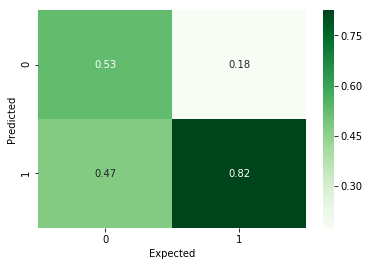


Accuracy  :	 0.7550355407529161

Recall    :	 0.8244422465382978

Precision :	 0.8517409524794992

F-Measure :	 0.8378693030002291

AUC       :	  0.7606072983196573


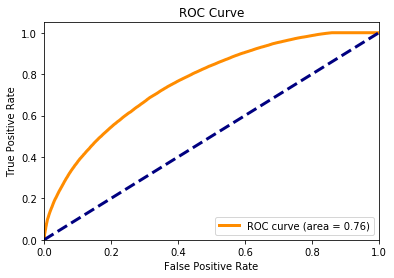

In [0]:
clf=RandomForestClassifier(n_estimators=800, min_samples_leaf = 6)
func = clf.fit(X_train_std,y_train)
y_pred=func.predict(X_test_std)
evaluate_model(y_test,y_pred)
y_pred = func.predict_proba(X_test_std)[:,1]
ROCcurve(y_test,y_pred)

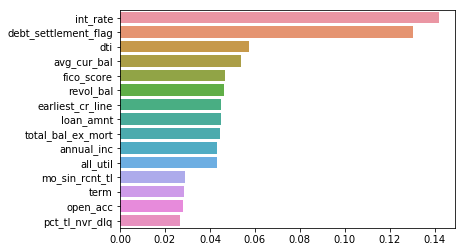

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp_top = feature_imp.head(15)
sns.barplot(x=feature_imp_top, y=feature_imp_top.index)